24/02-2025

Running 50 shadow models (DLinear, 10 epochs) on 100 indviduals from the ECG.

Testing utility of per-time-step TS2Vec for MIAs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = "ECG"
model = "DLinear"
steps_per_individual = 4881

feature_names = ["Trend", "Seasonality", "MSE", "MASE", "TS2Vec"]
num_features = len(feature_names)

path = "data/" + dataset + "/" + model

In [3]:
features = np.load(path + "/features.npy")
mask = np.load(path + "/mask.npy")
num_individuals = features.shape[0] // steps_per_individual

In [4]:
best_per_individual = []
feature_to_sort = 4
for ind in range(num_individuals):
    best_diff = 0
    best_i = -1
    for i in range(ind*steps_per_individual, (ind+1)*steps_per_individual):
        current_mask = np.array(mask[i, :], dtype=bool)
        current_features = features[i, ...]
        ins = current_features[current_mask]
        outs = current_features[np.logical_not(current_mask)]
        
        diff = abs(ins[:, feature_to_sort].mean() - outs[:, feature_to_sort].mean()) / ins[:, feature_to_sort].std()
        if diff > best_diff:
            best_i = i
            best_diff = diff
    best_per_individual.append(best_i)


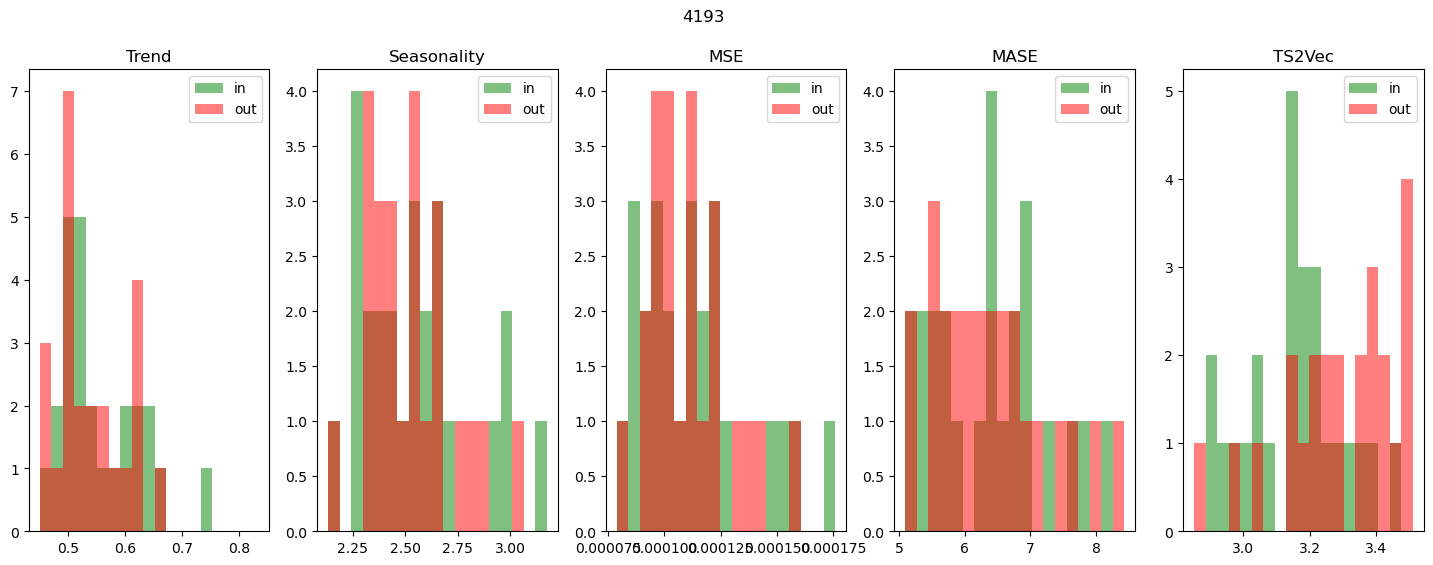

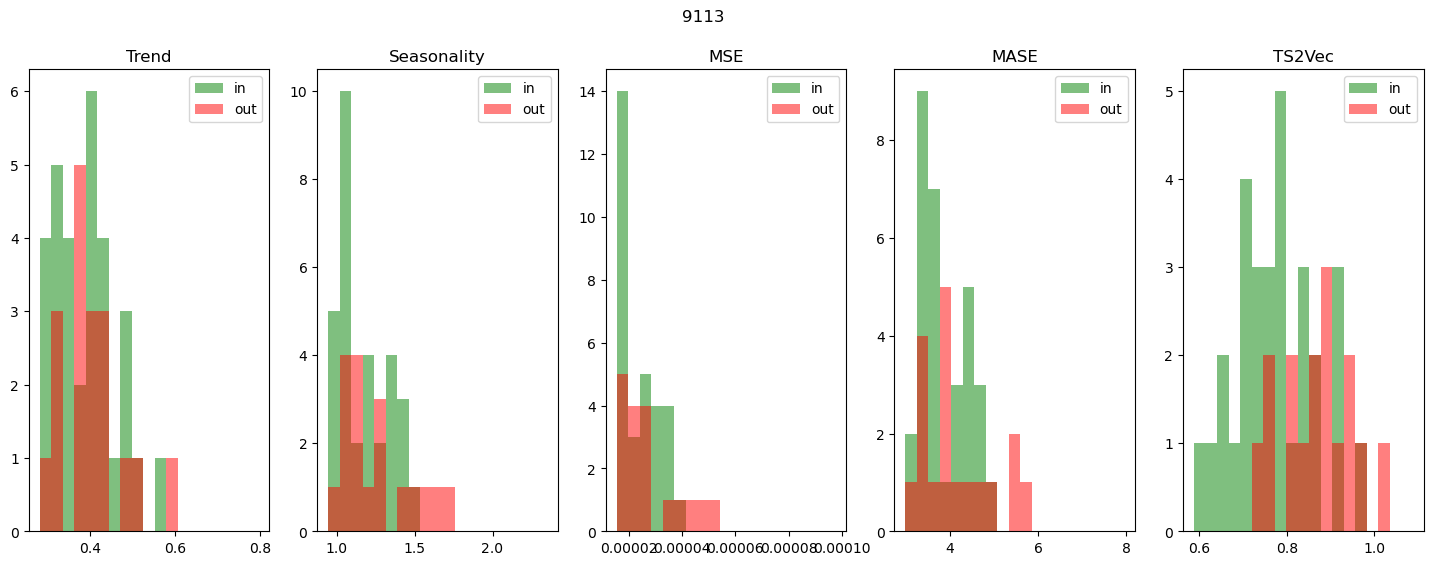

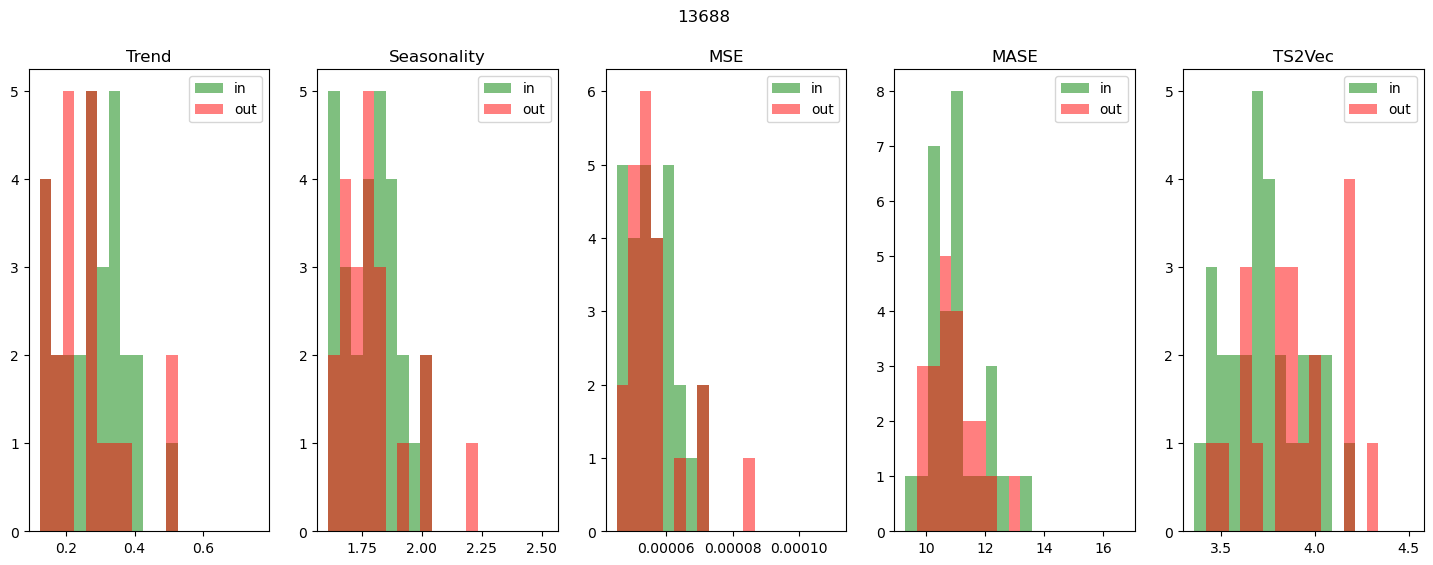

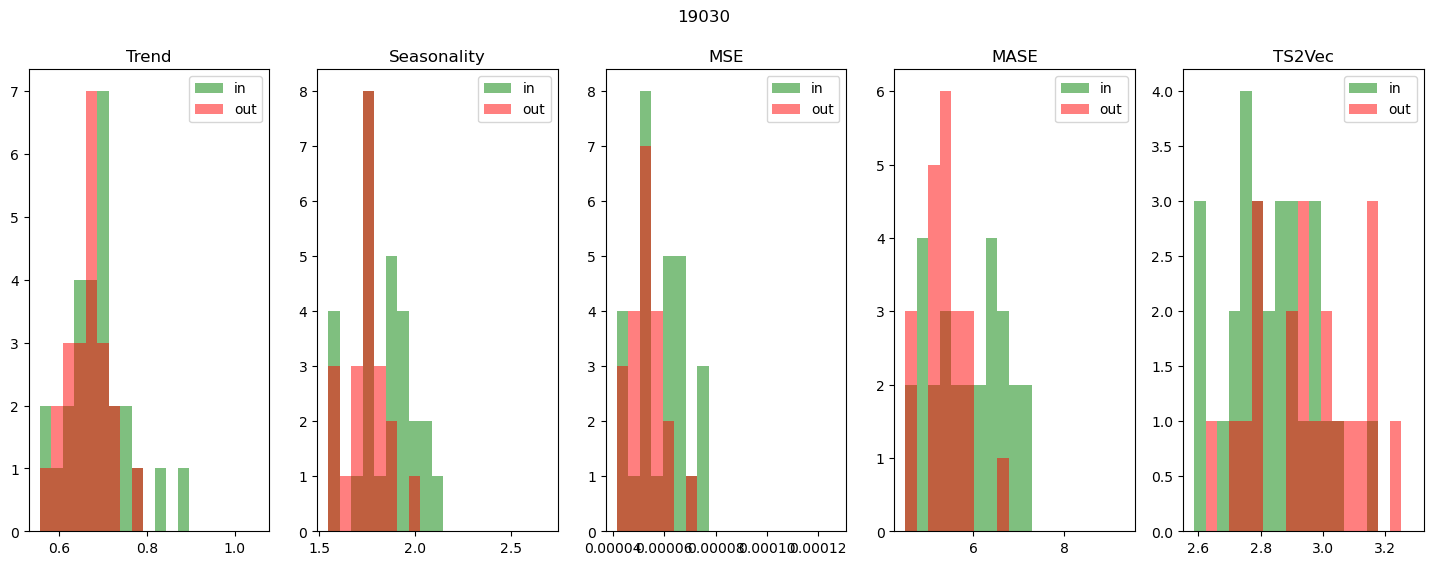

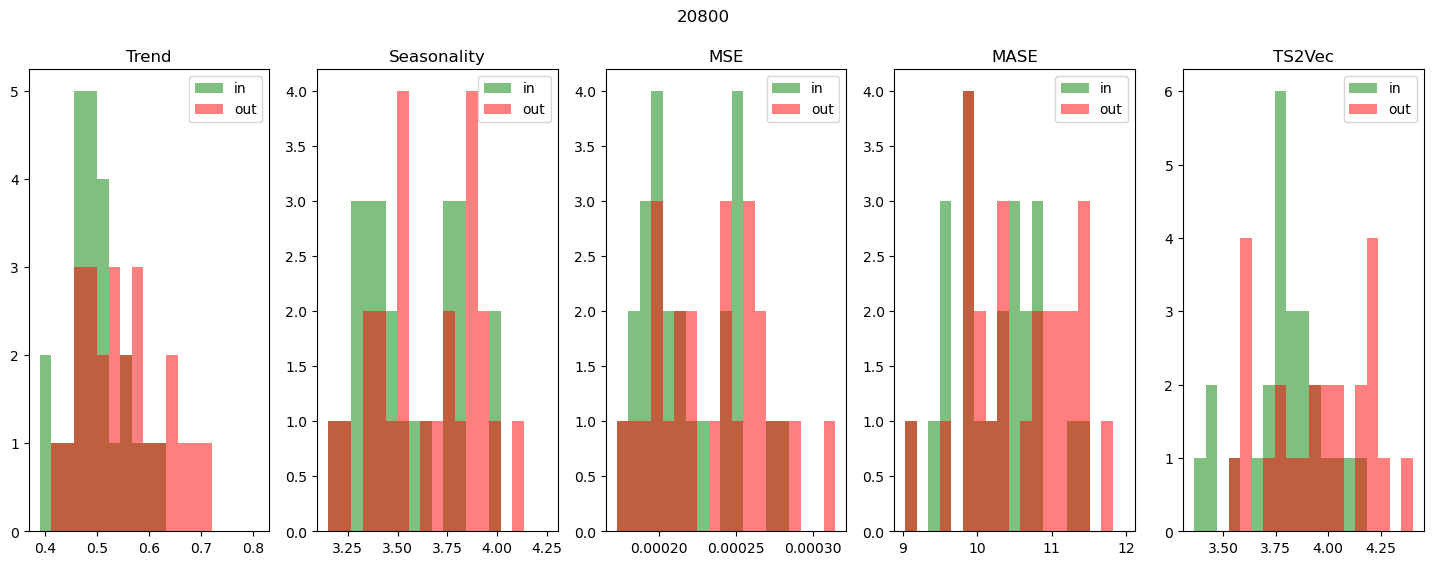

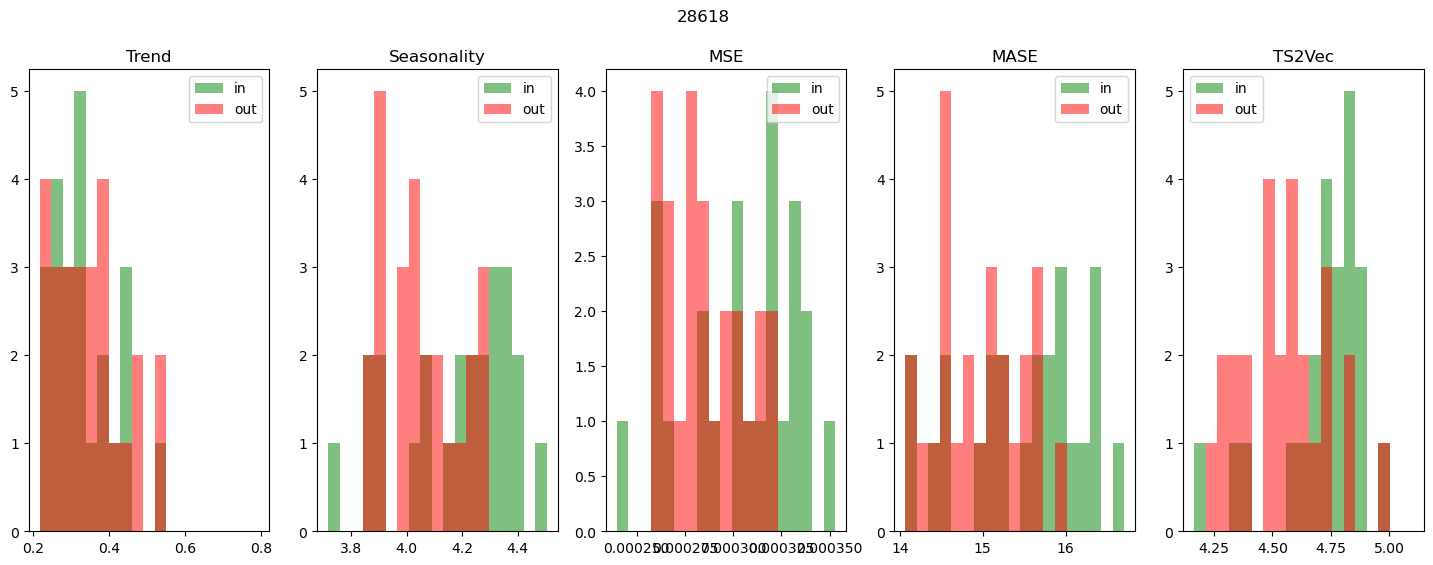

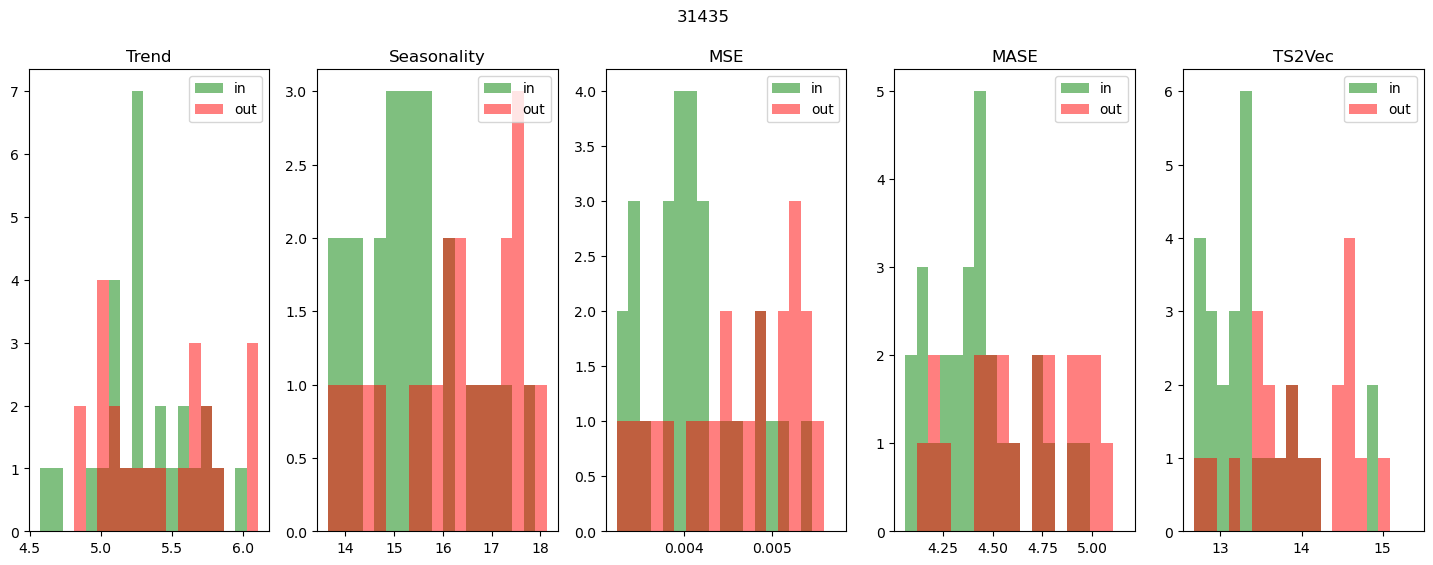

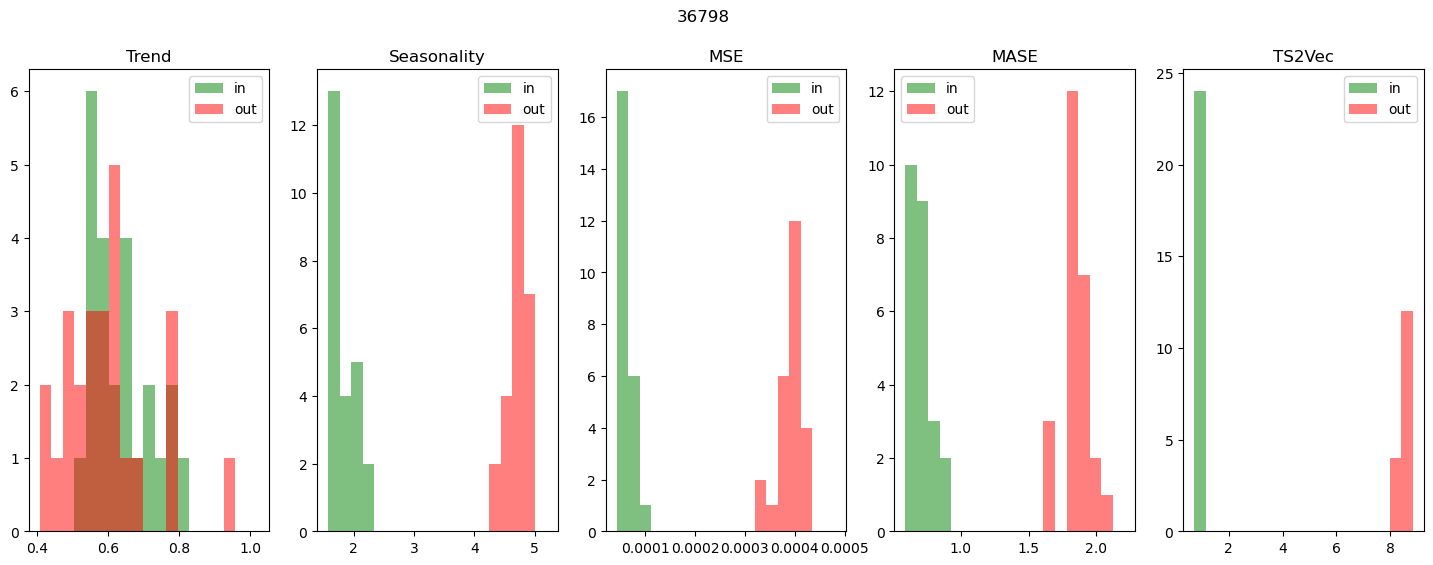

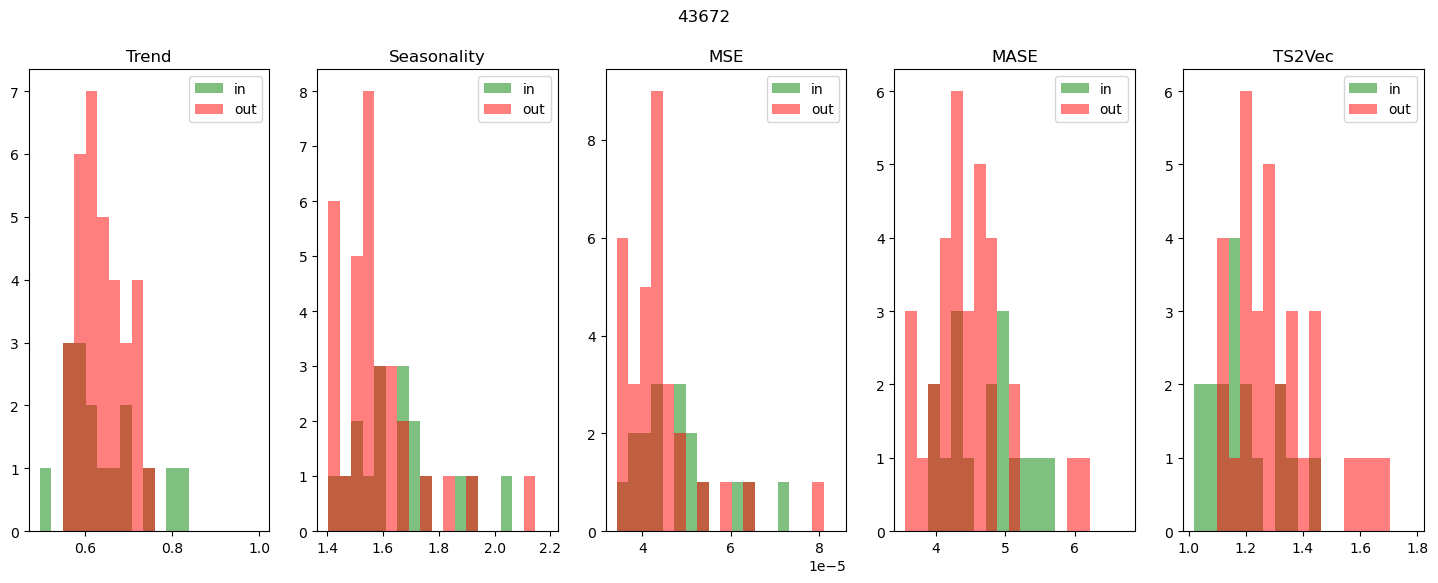

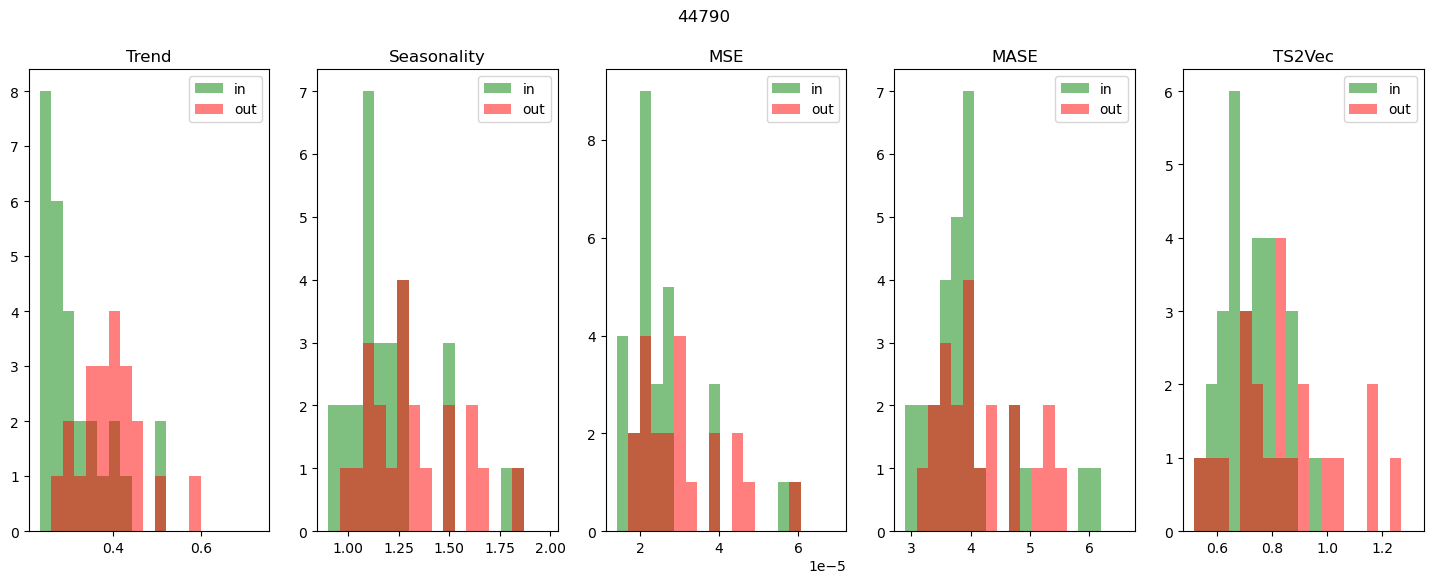

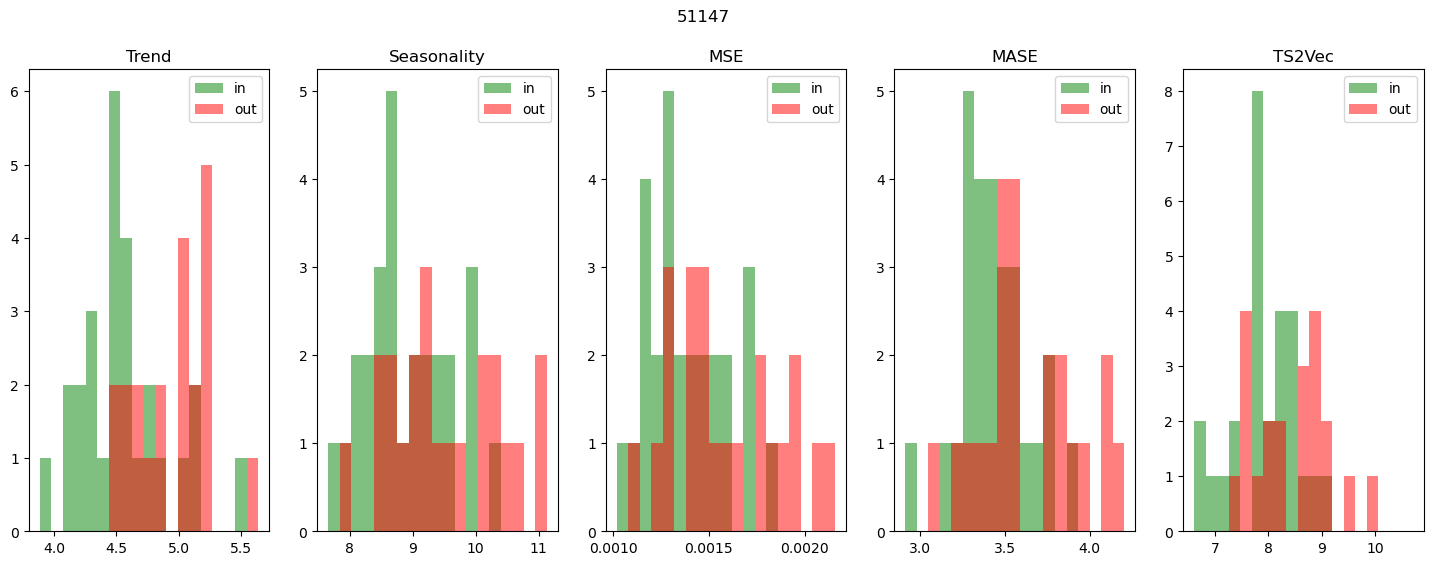

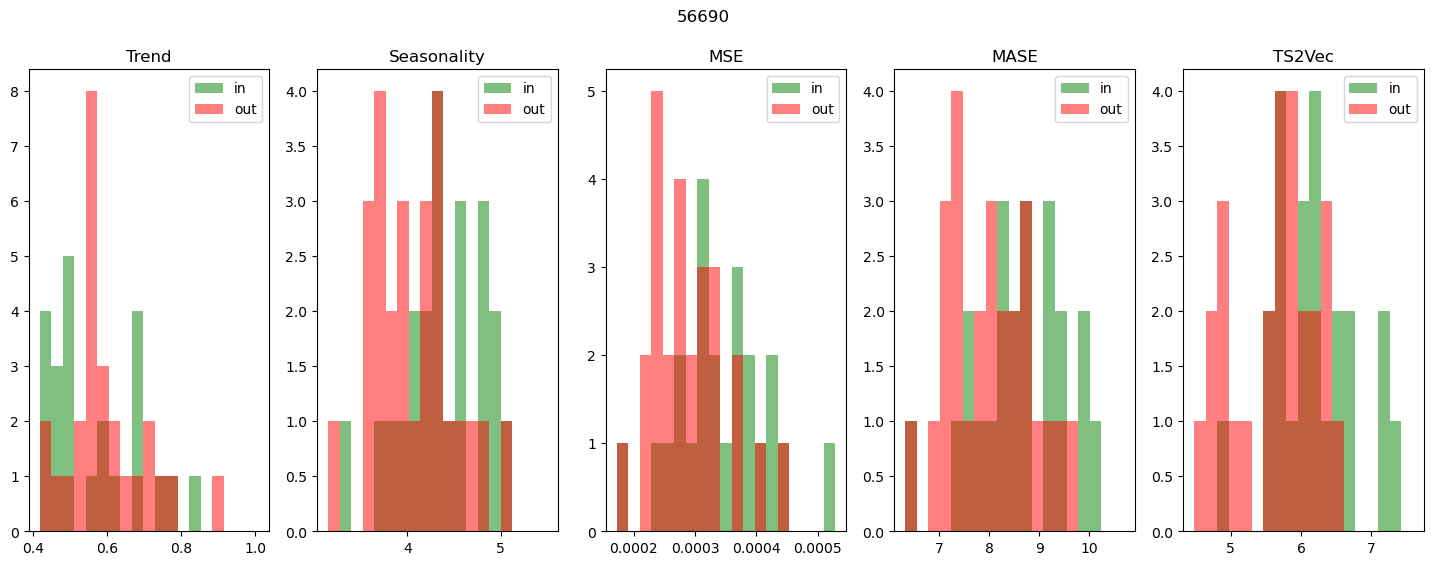

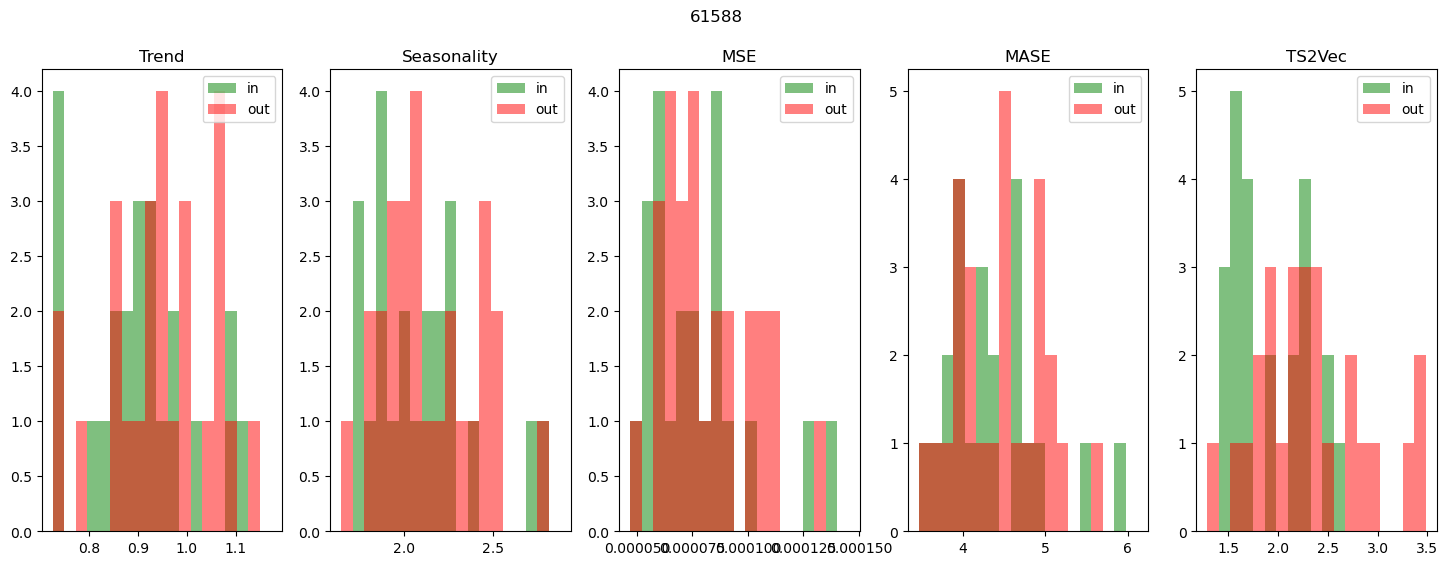

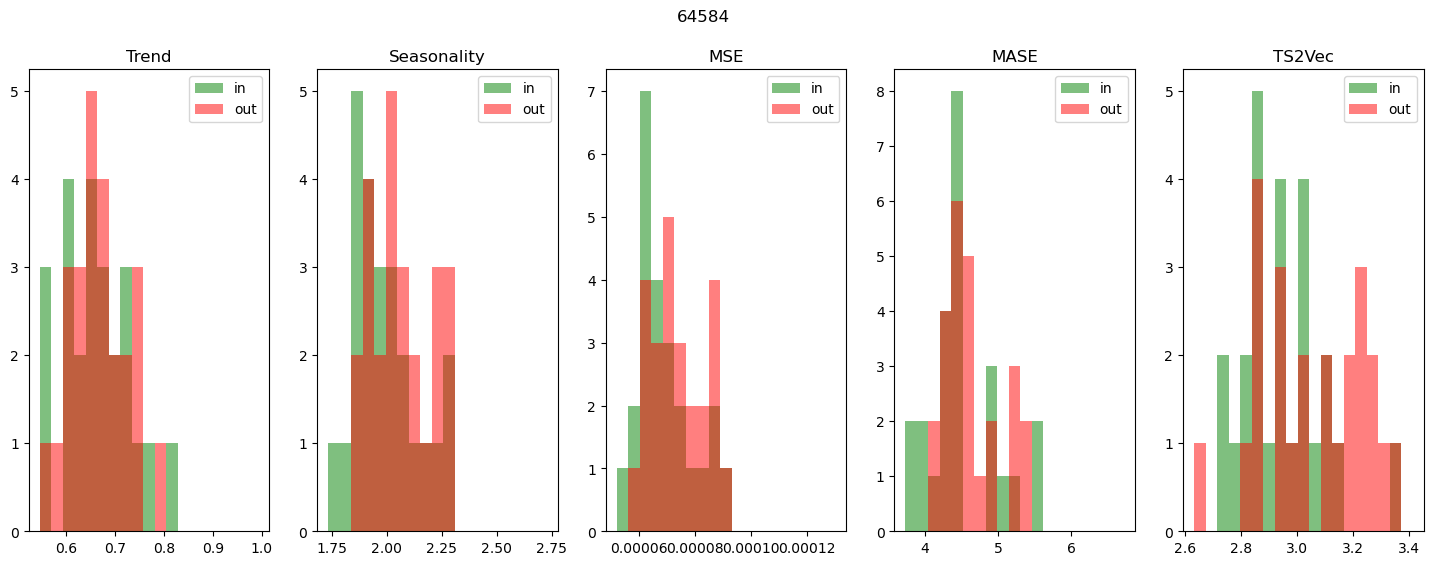

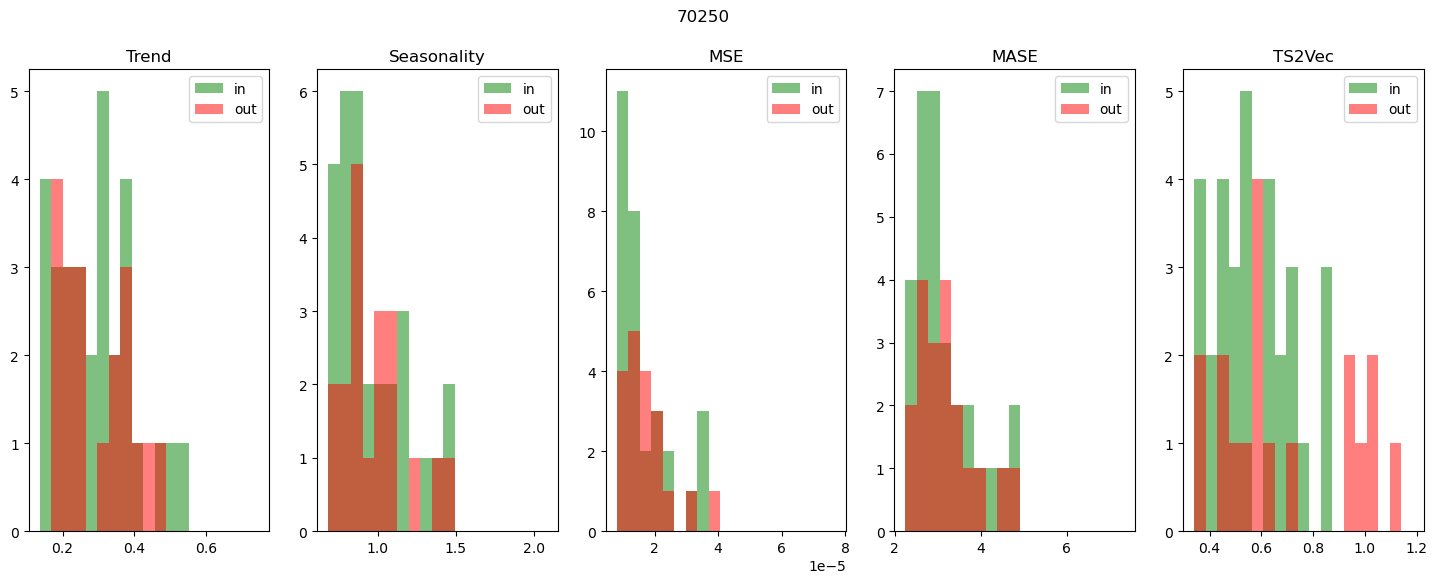

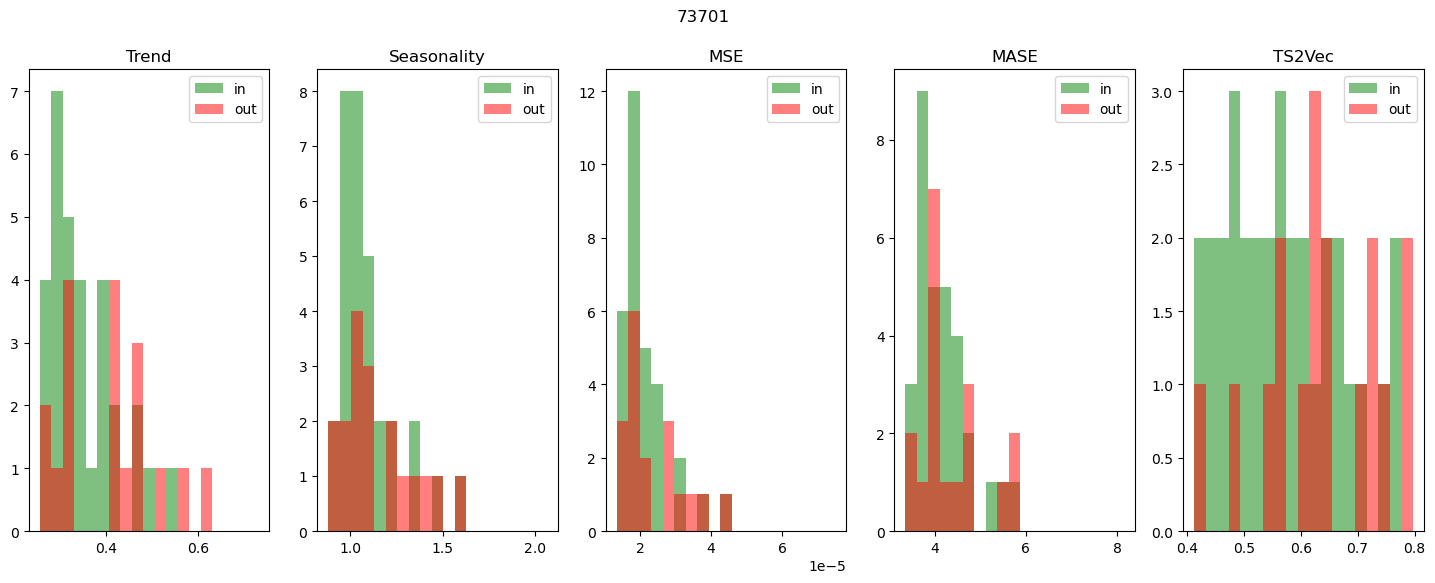

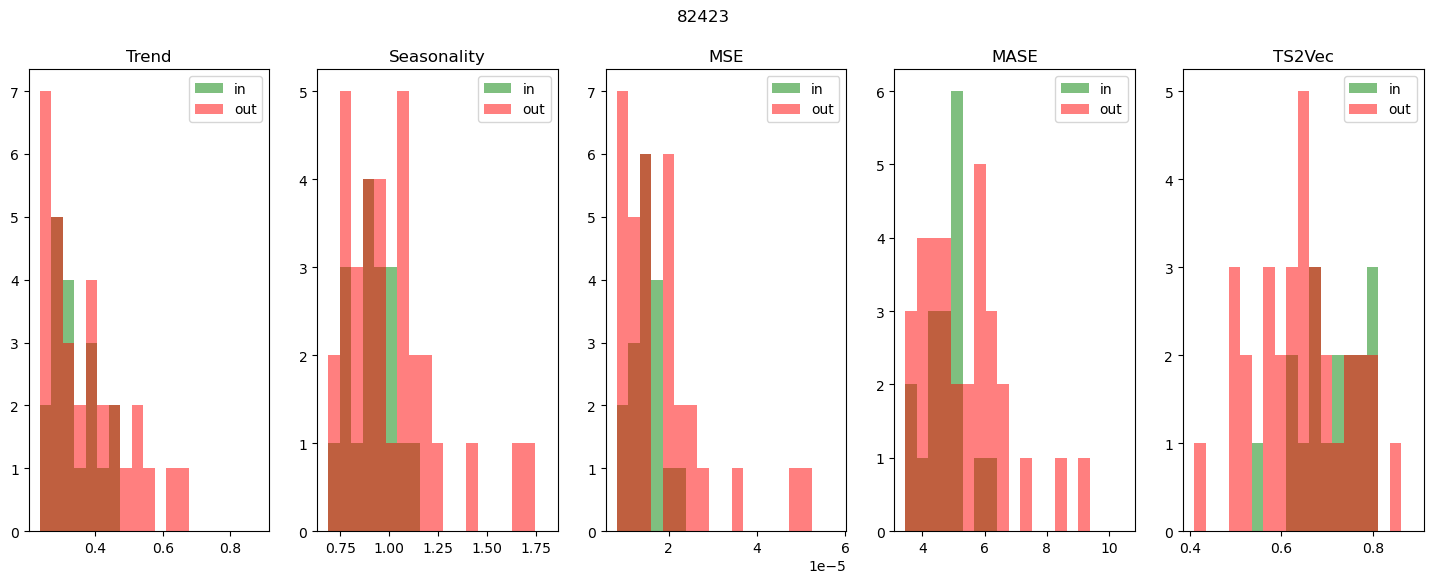

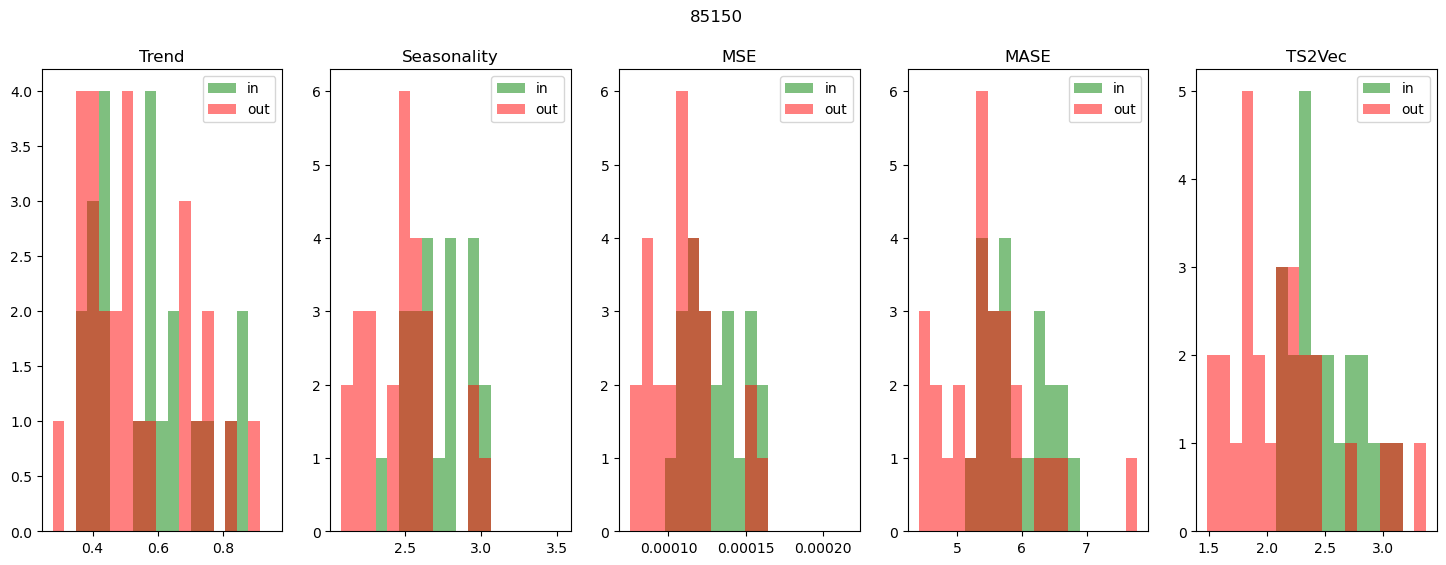

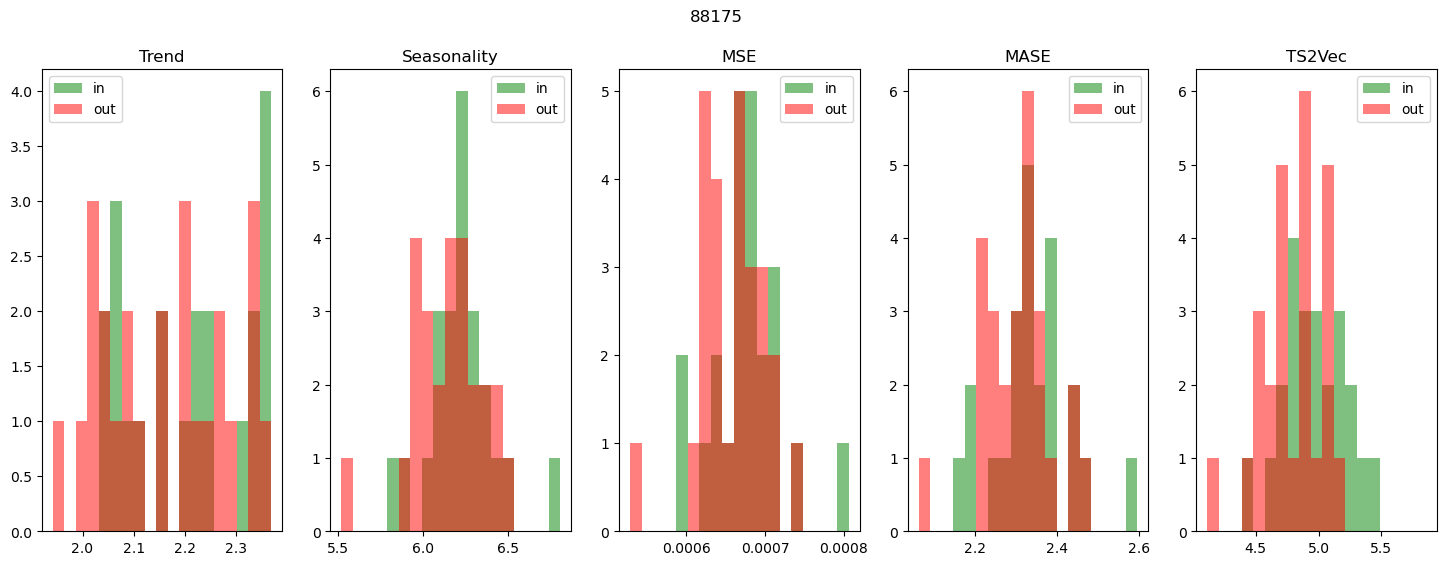

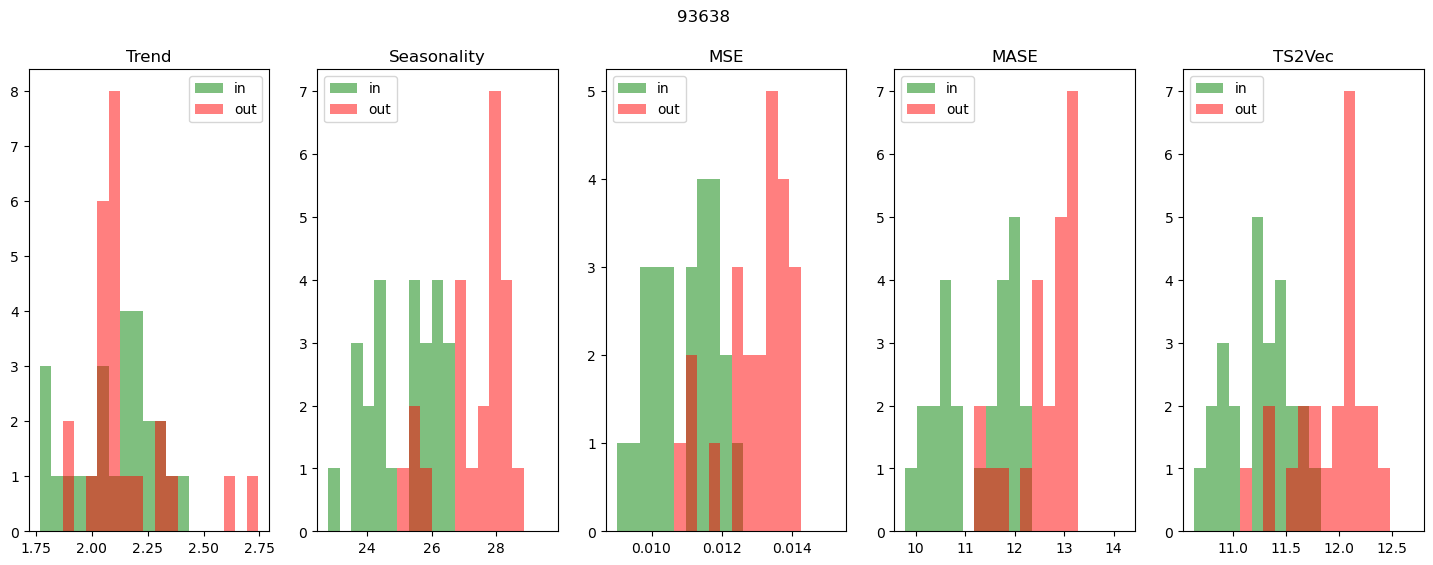

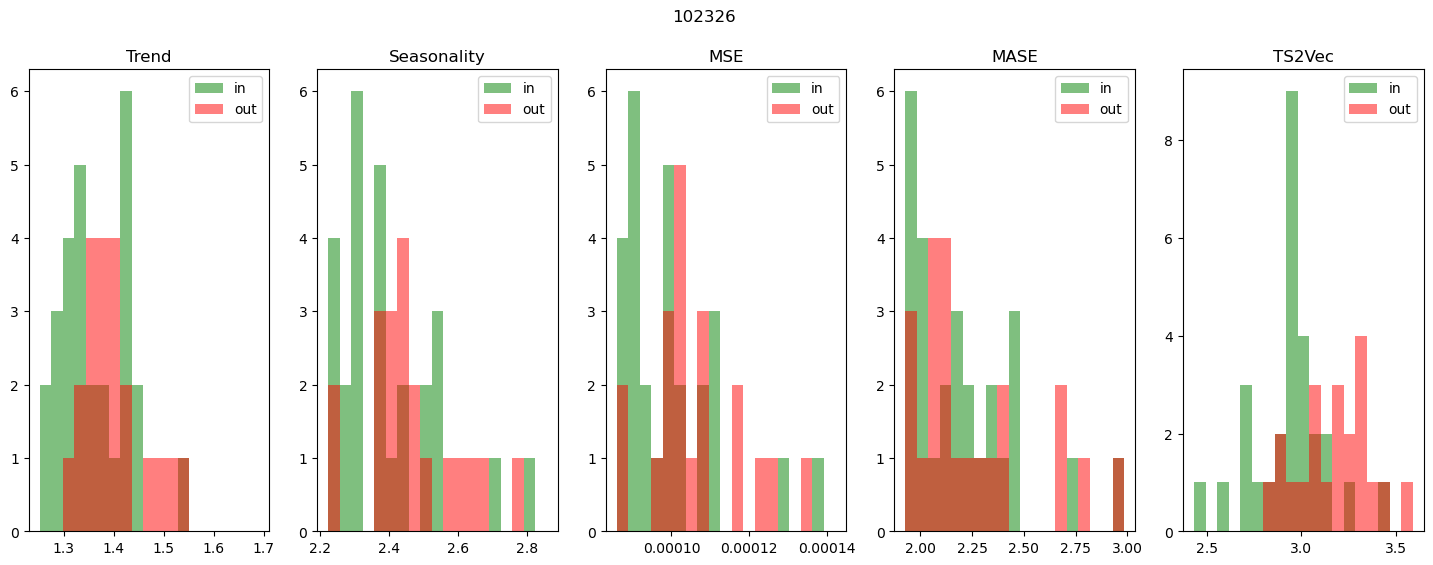

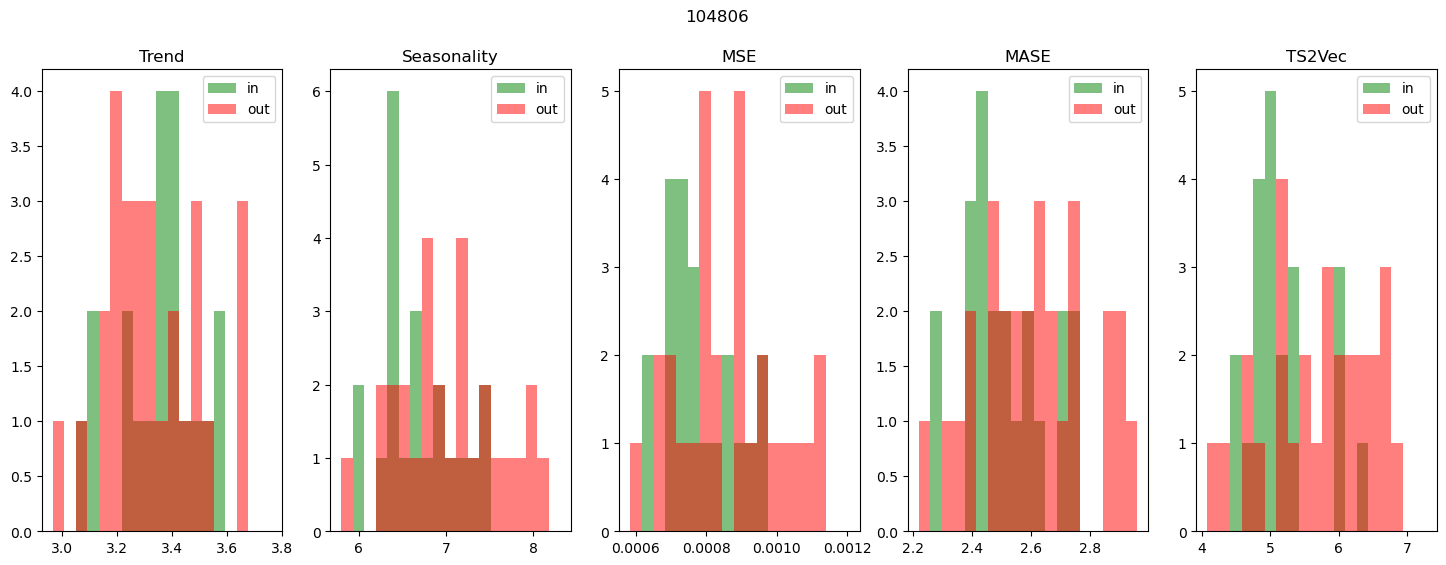

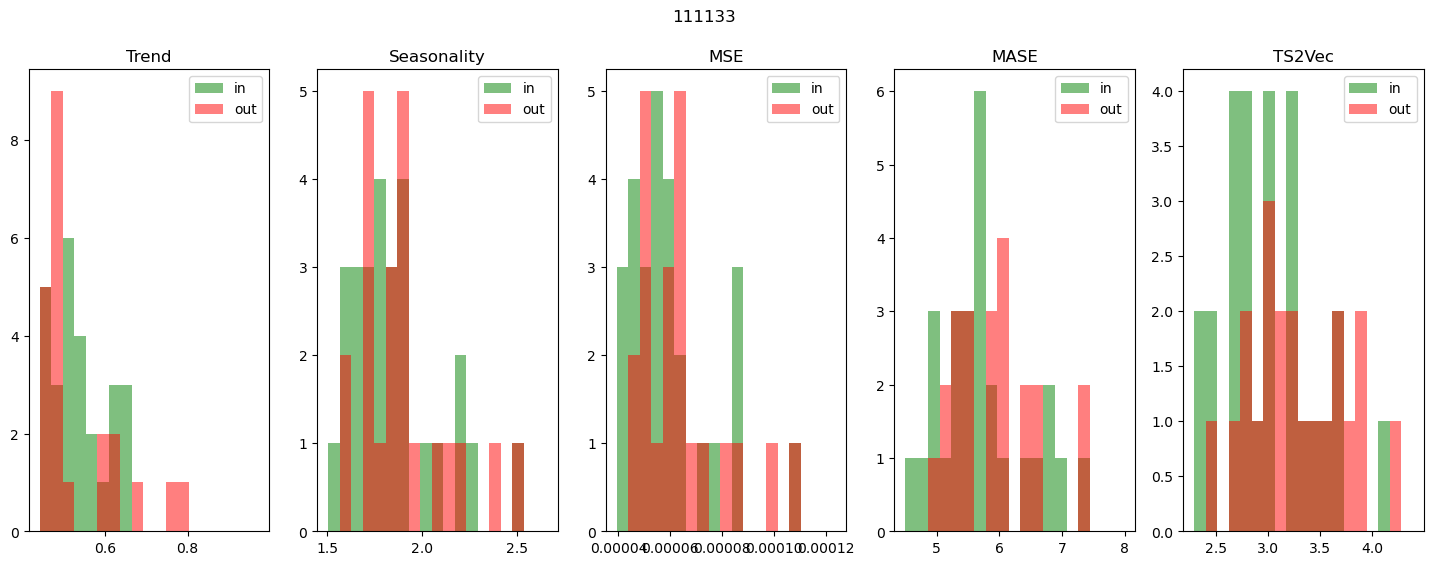

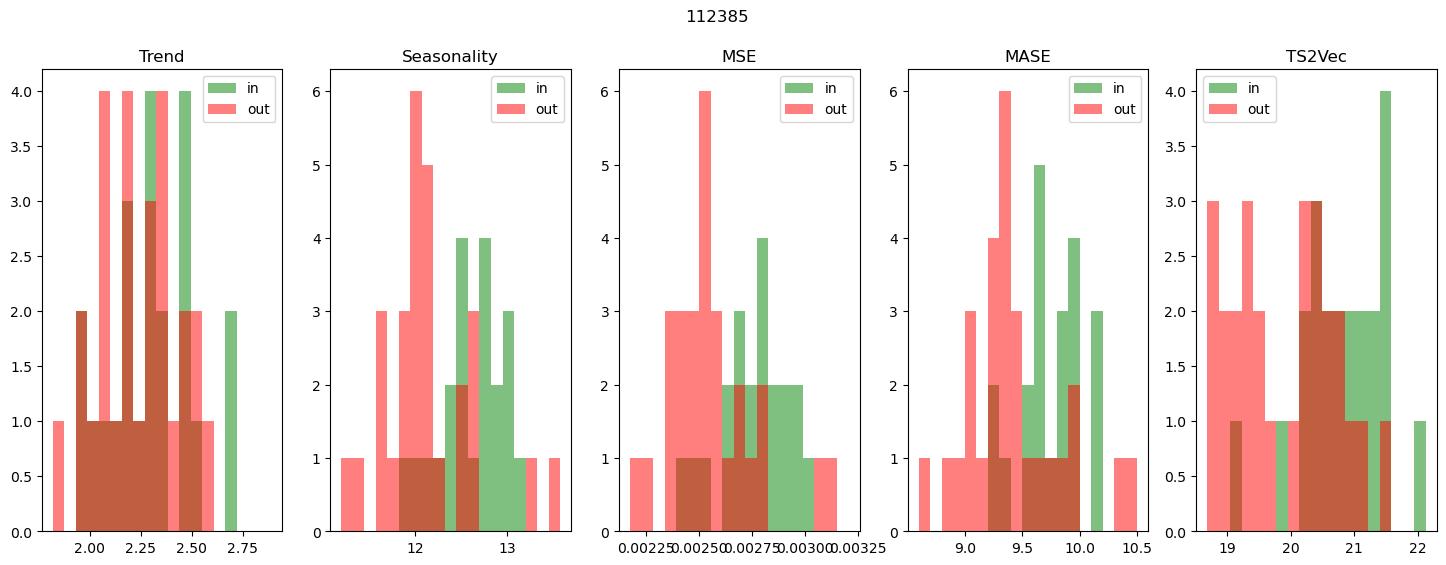

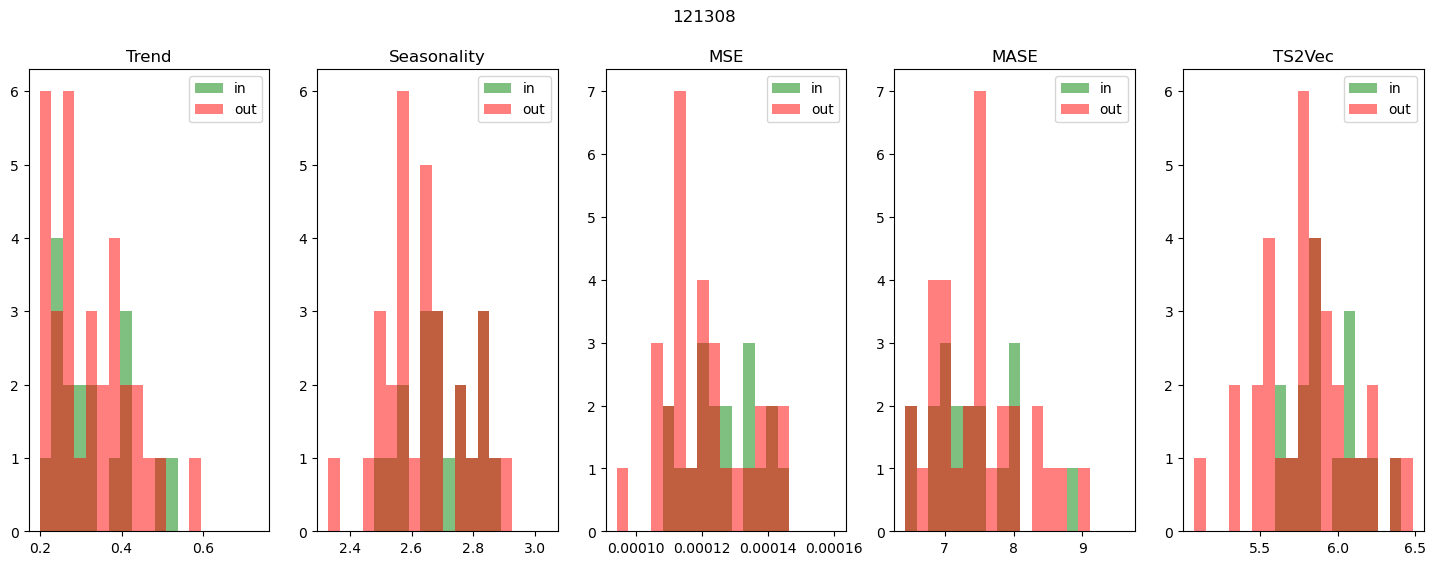

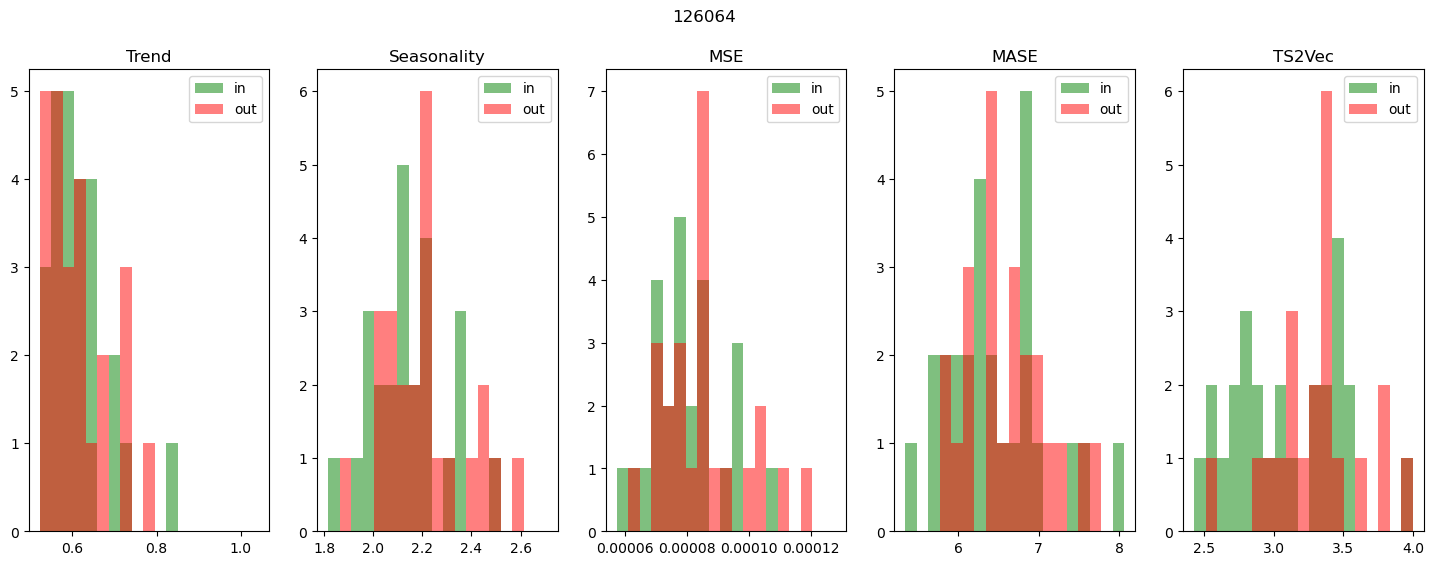

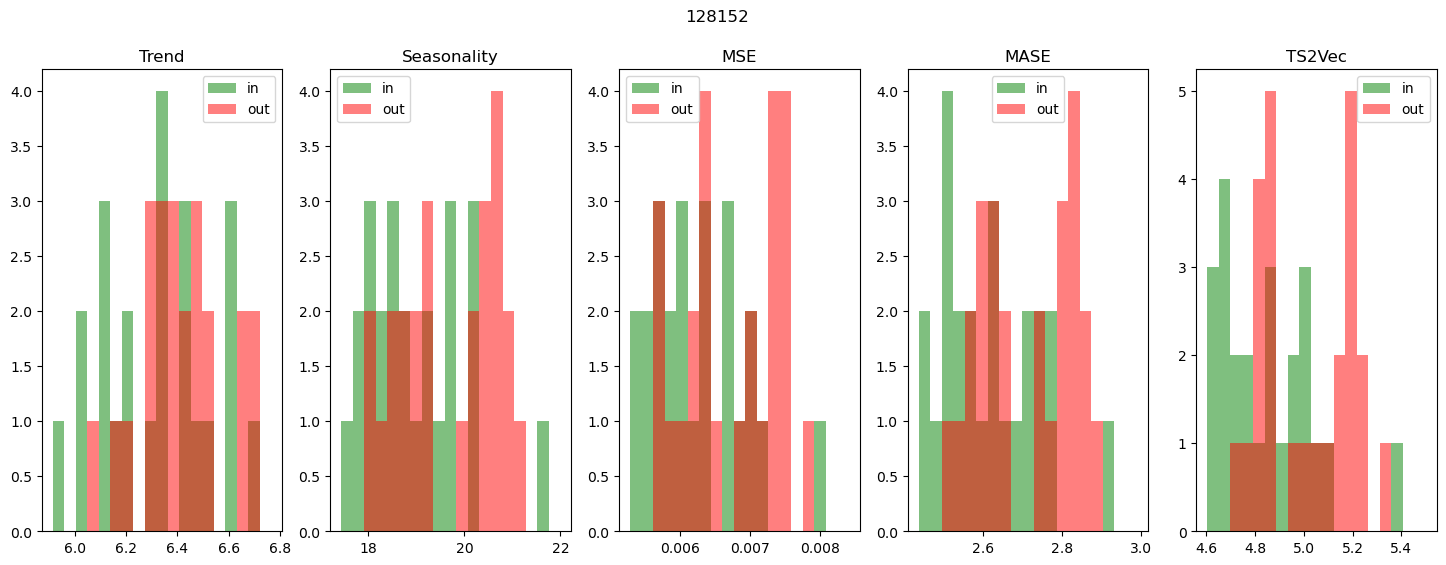

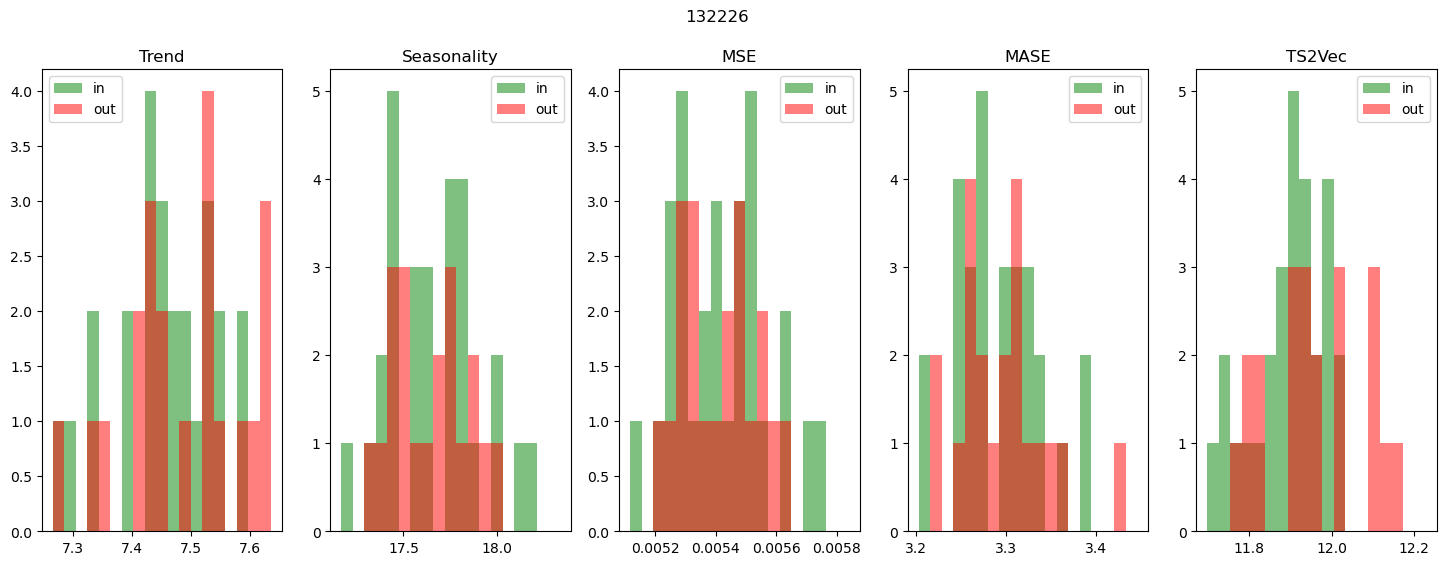

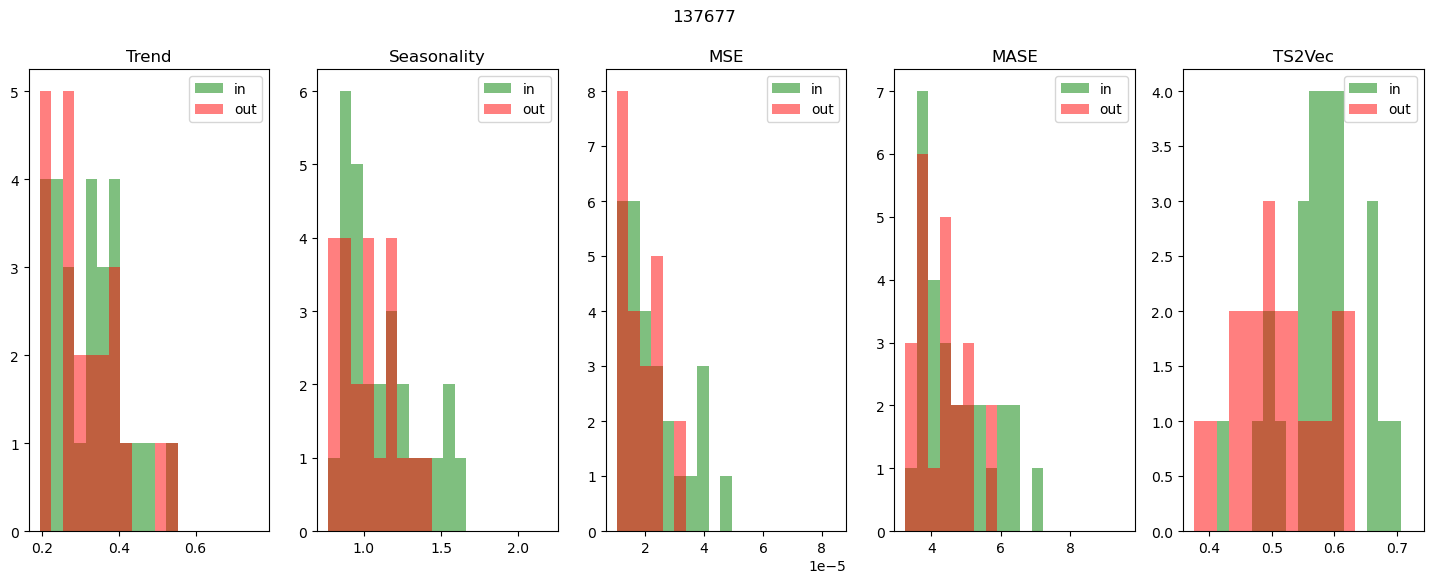

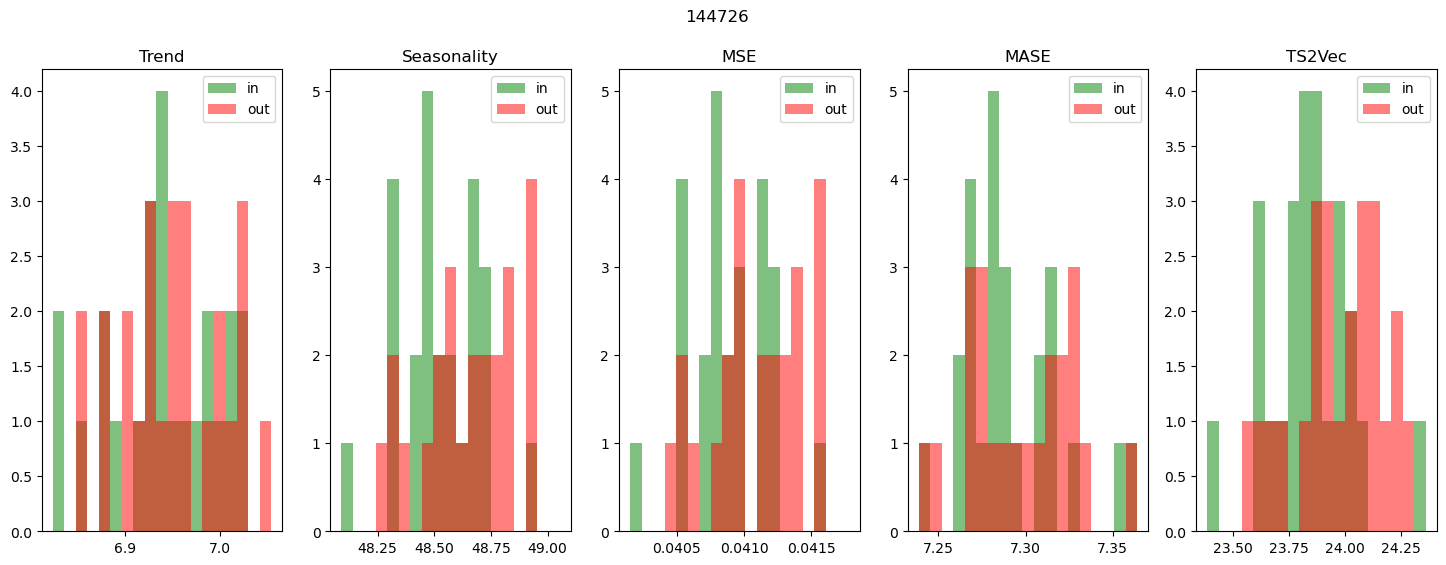

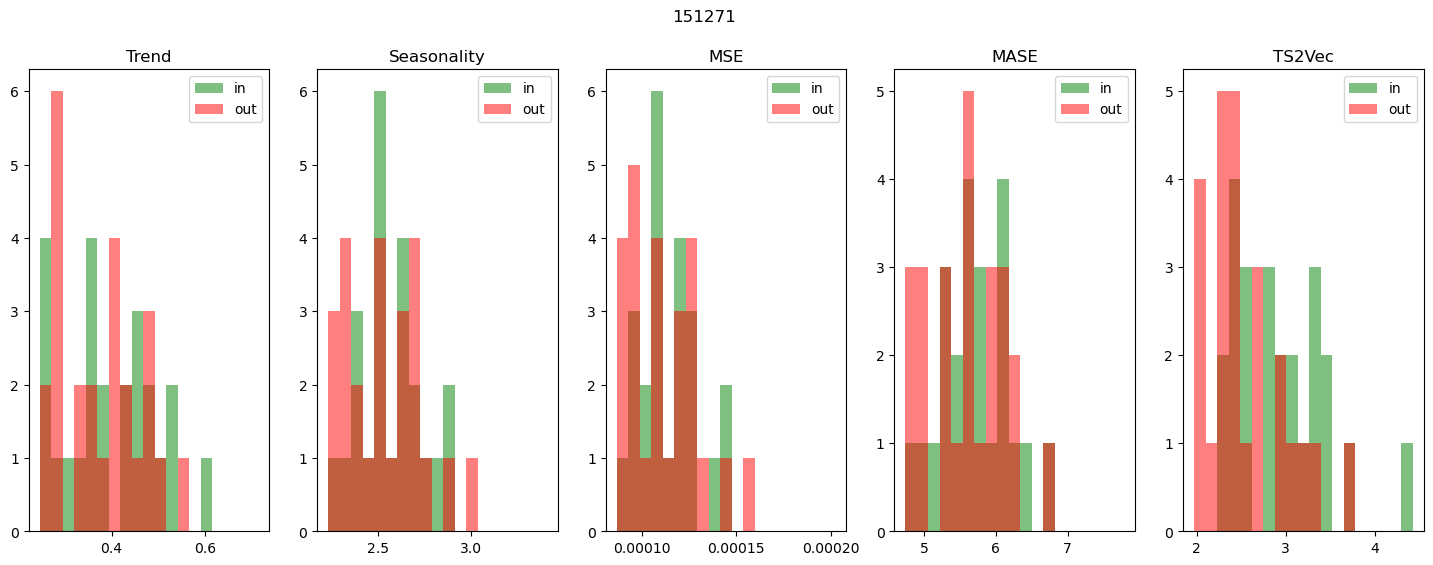

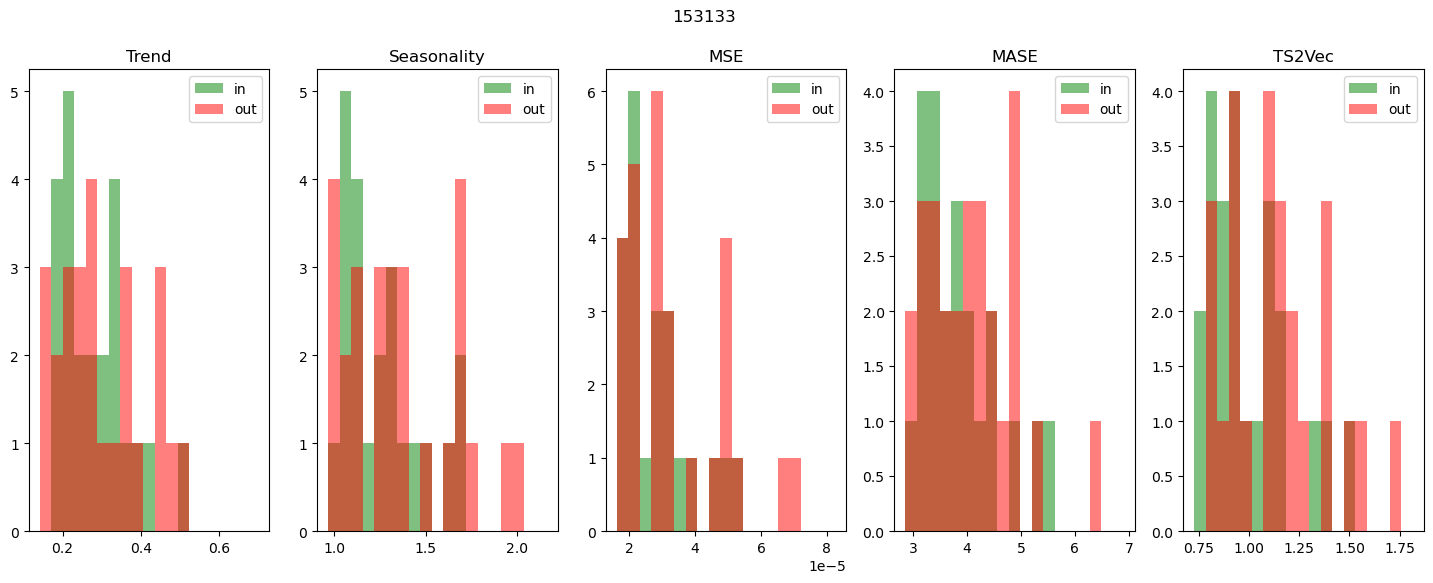

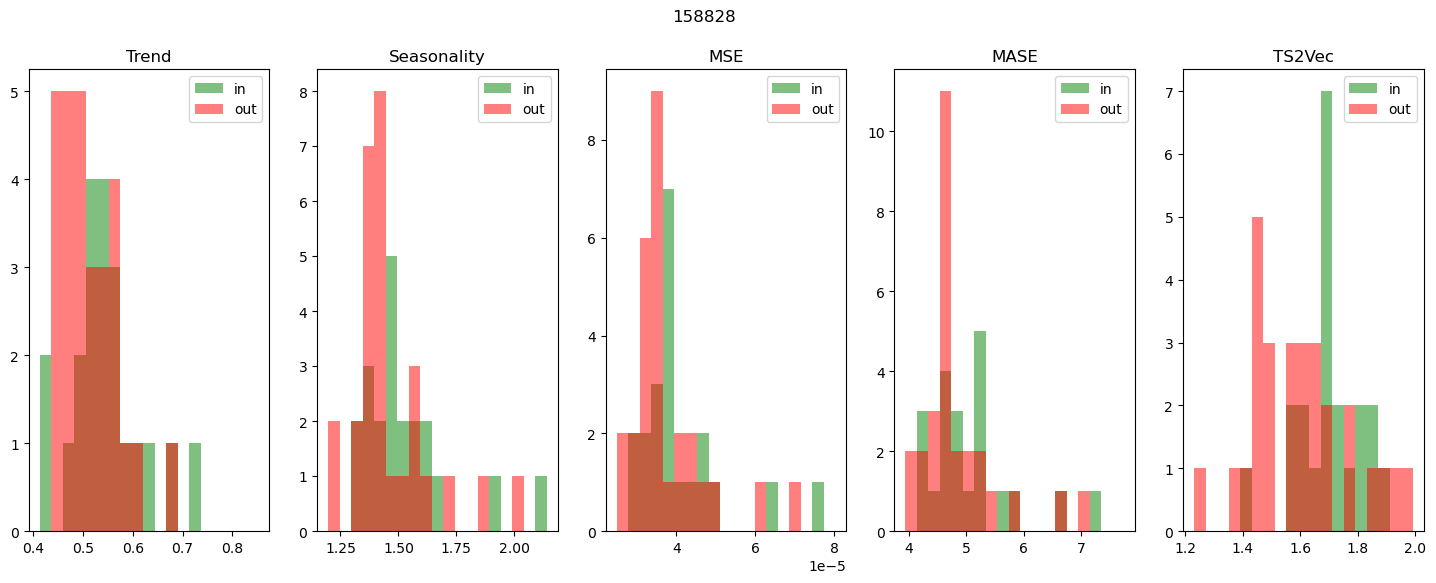

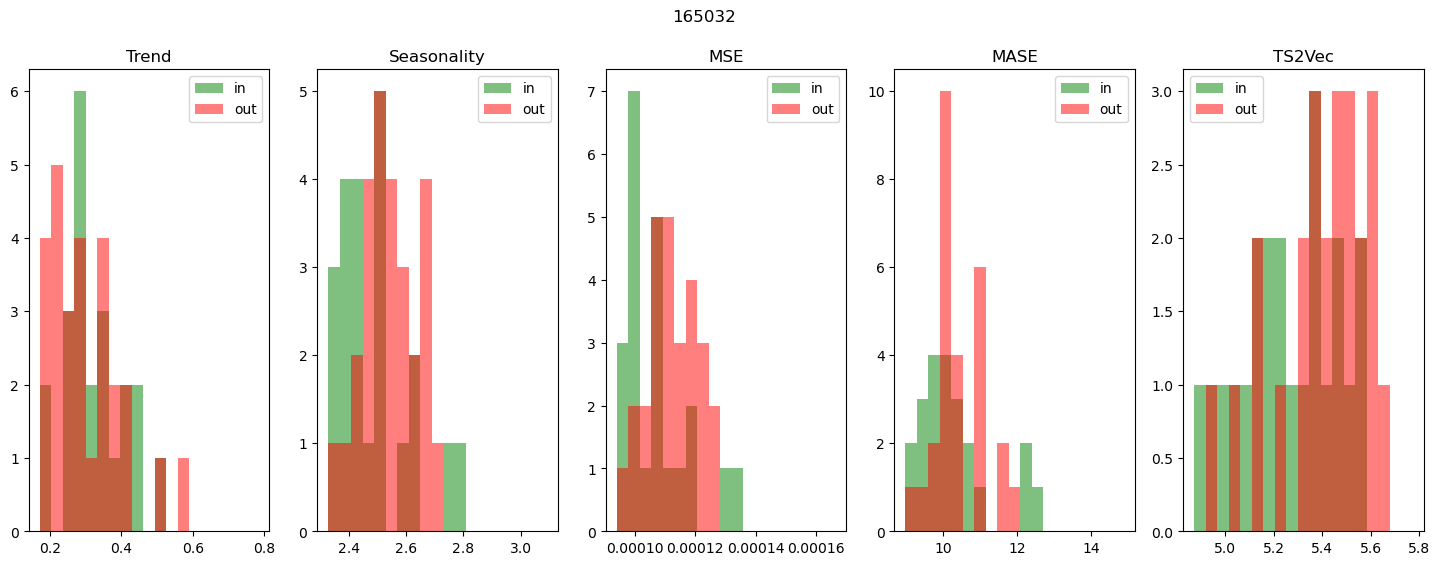

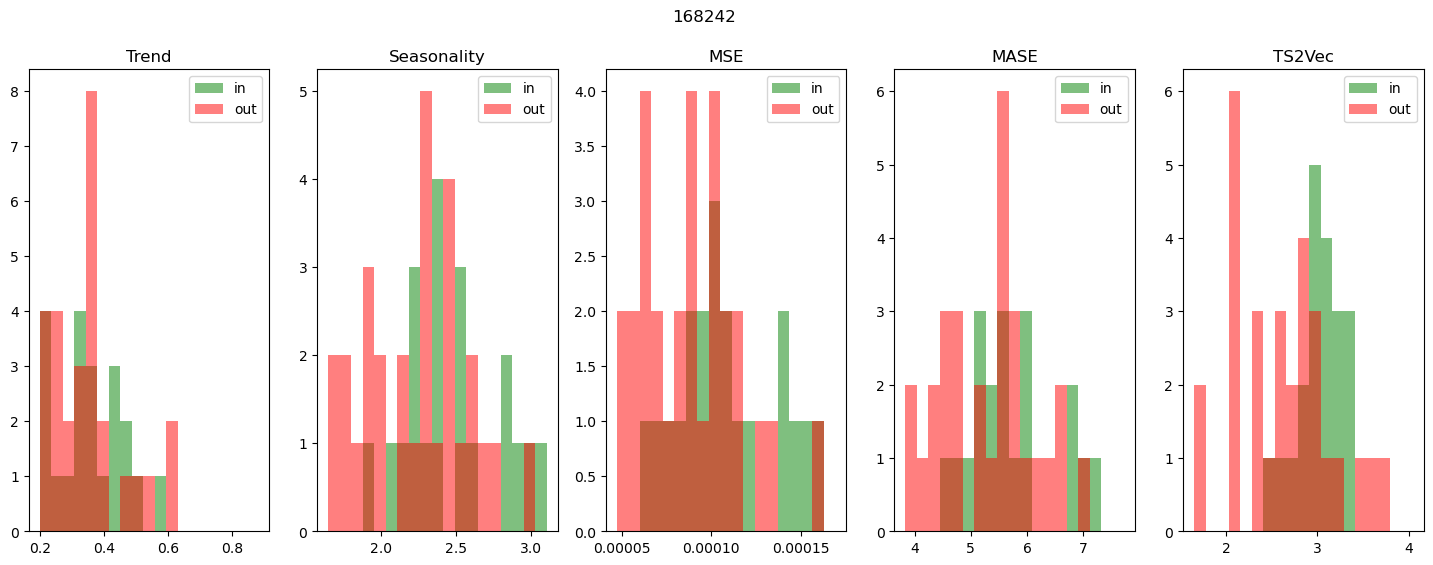

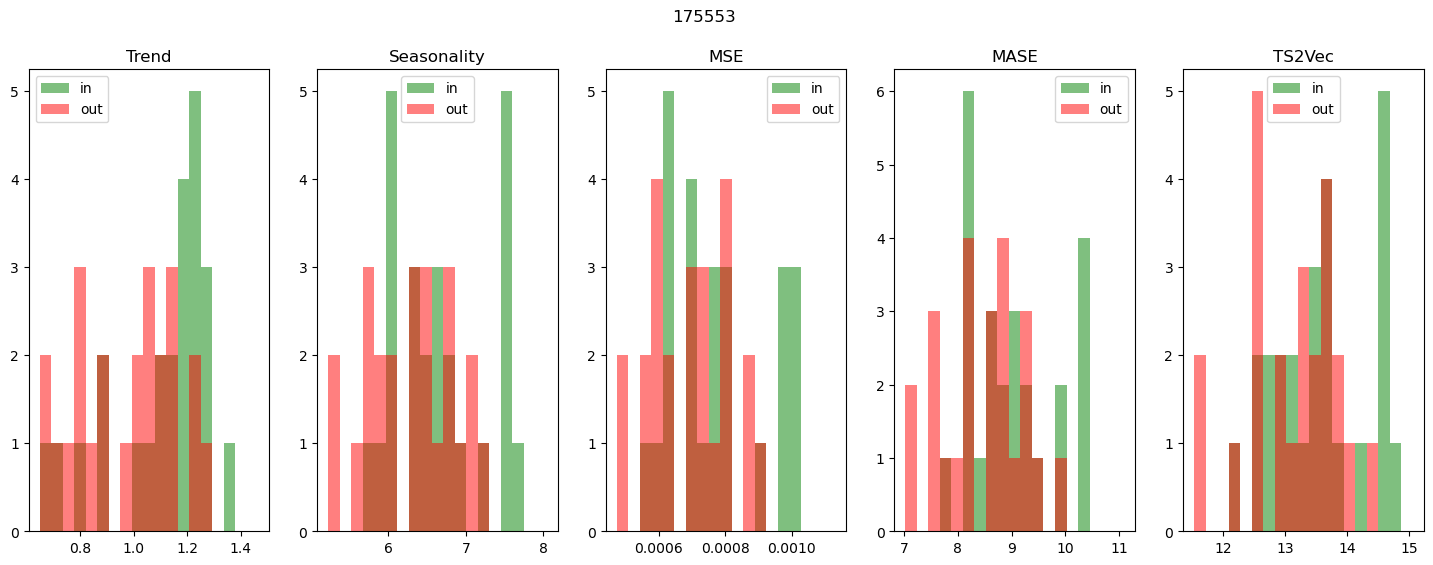

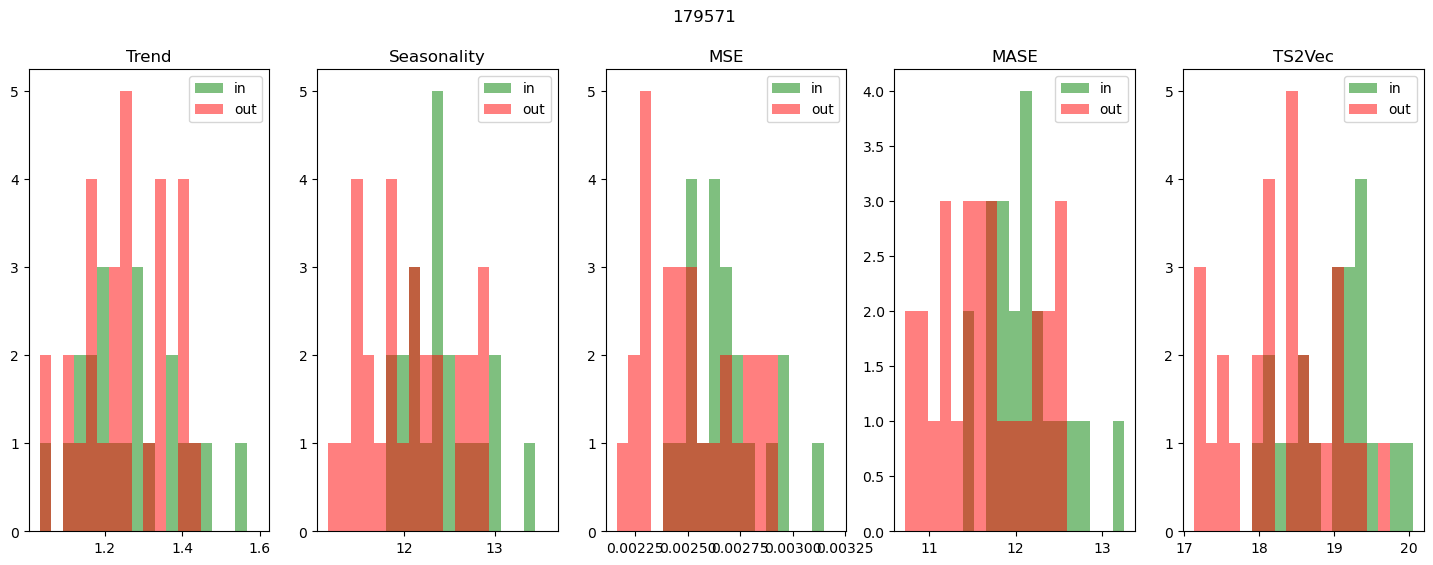

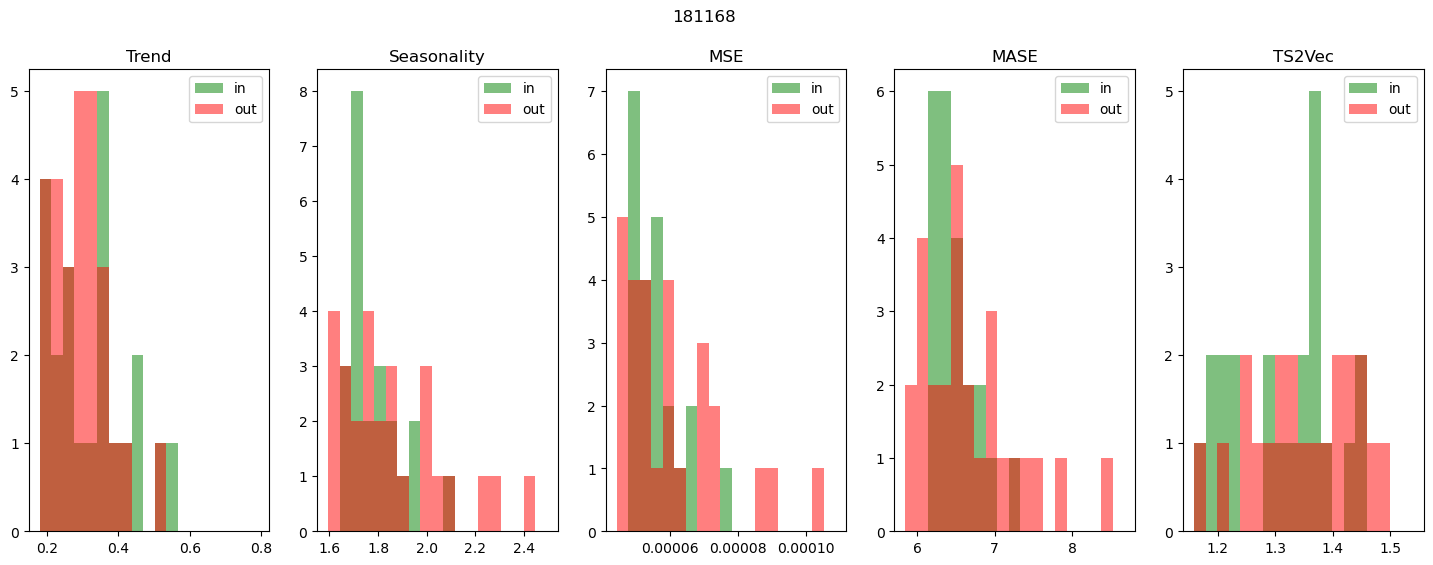

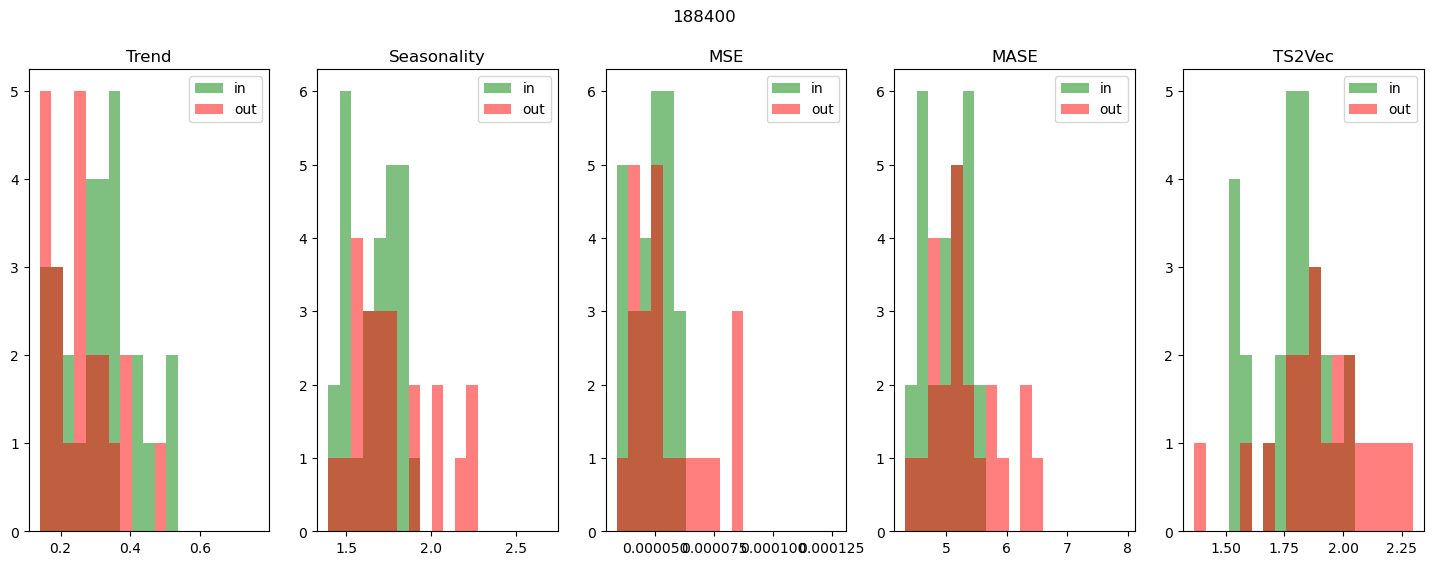

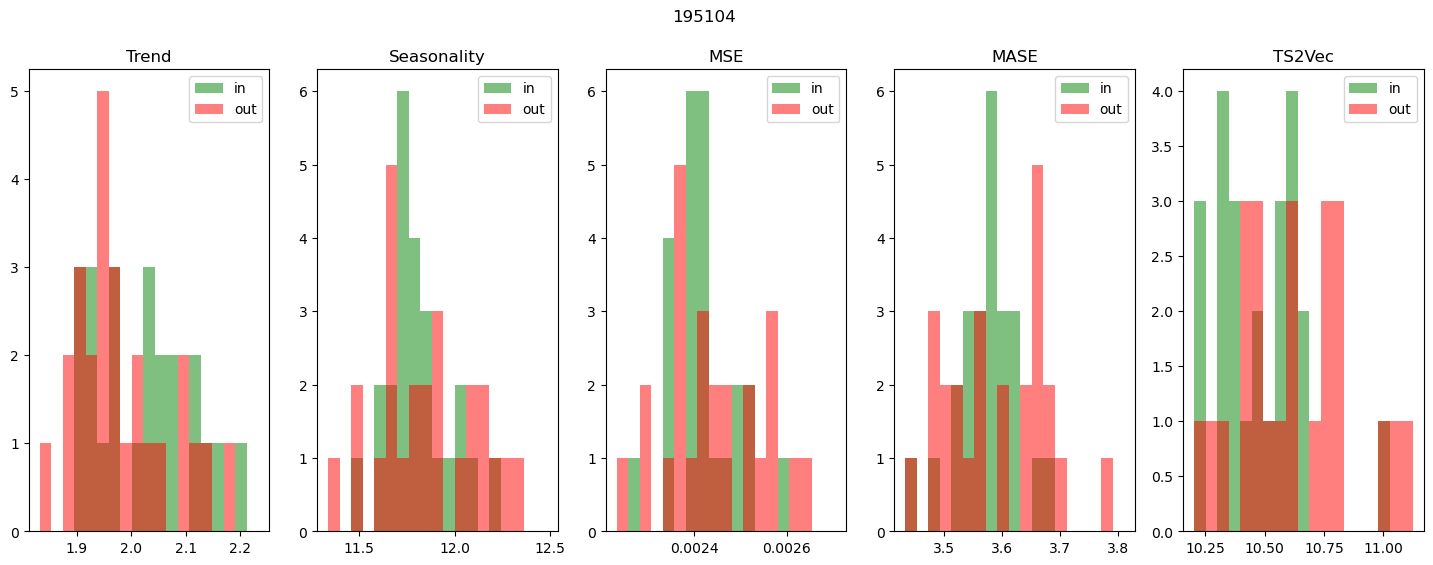

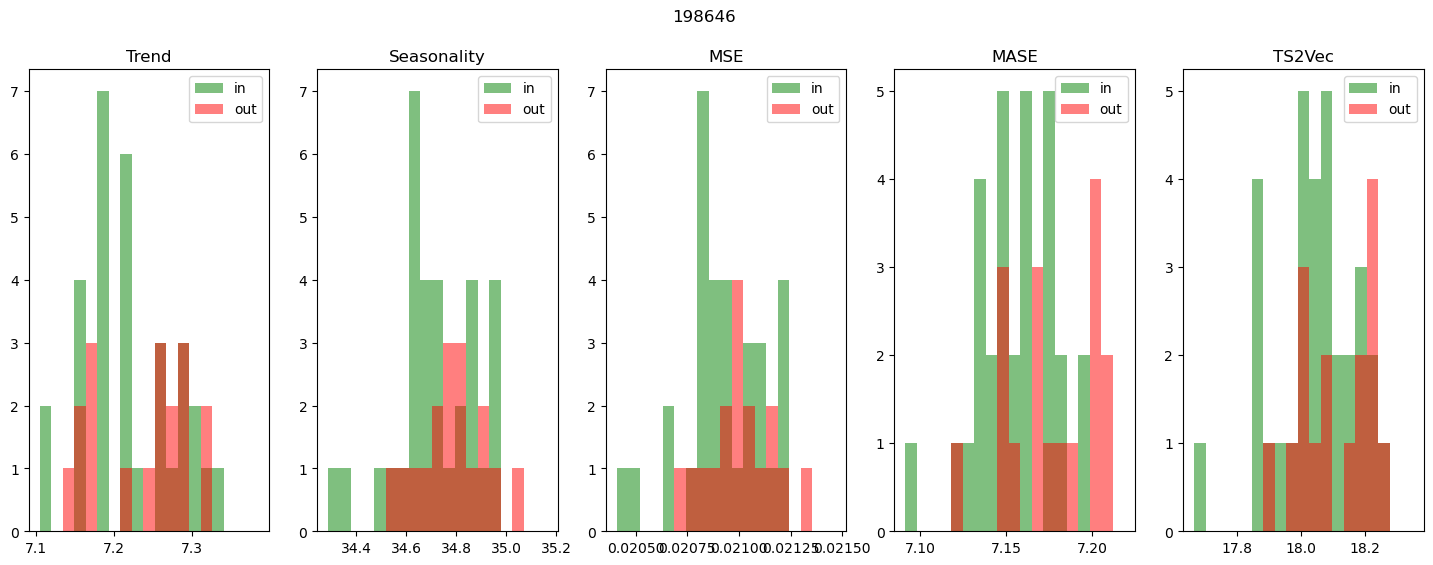

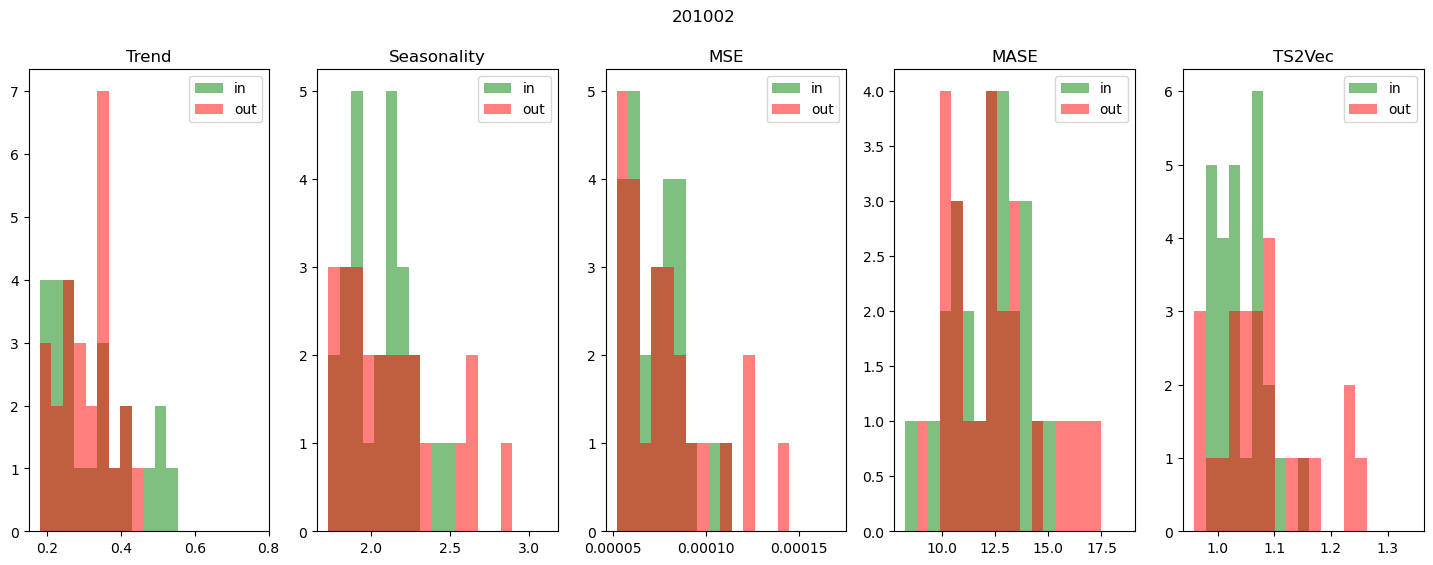

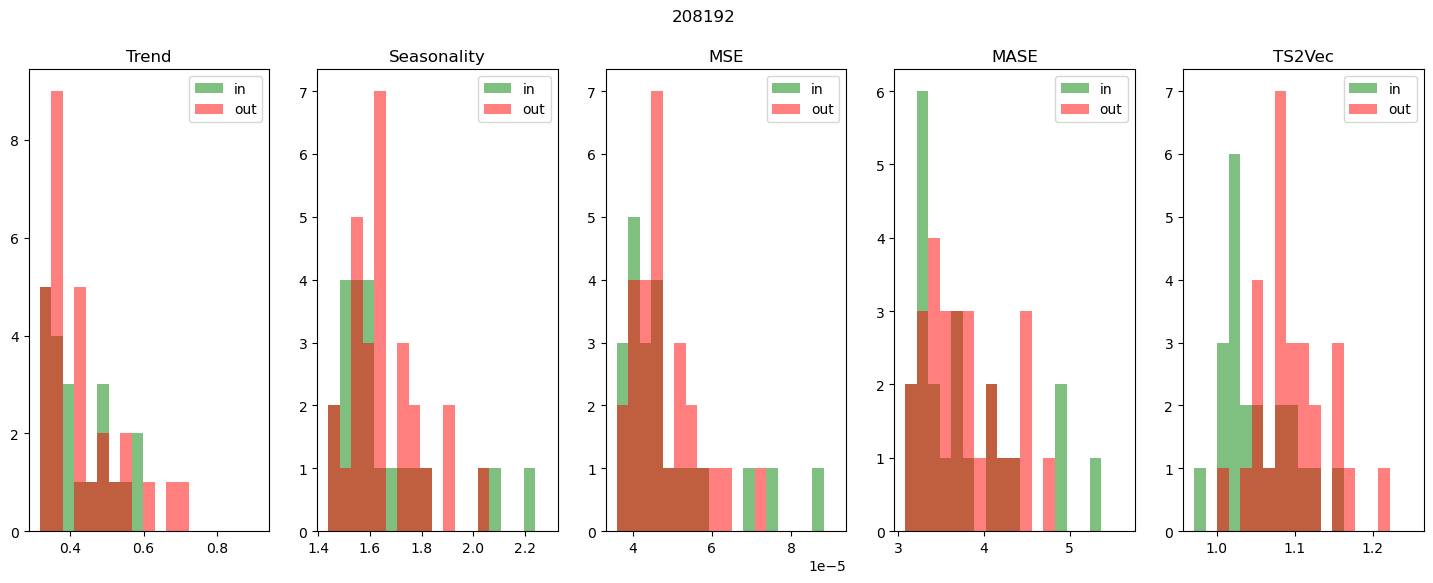

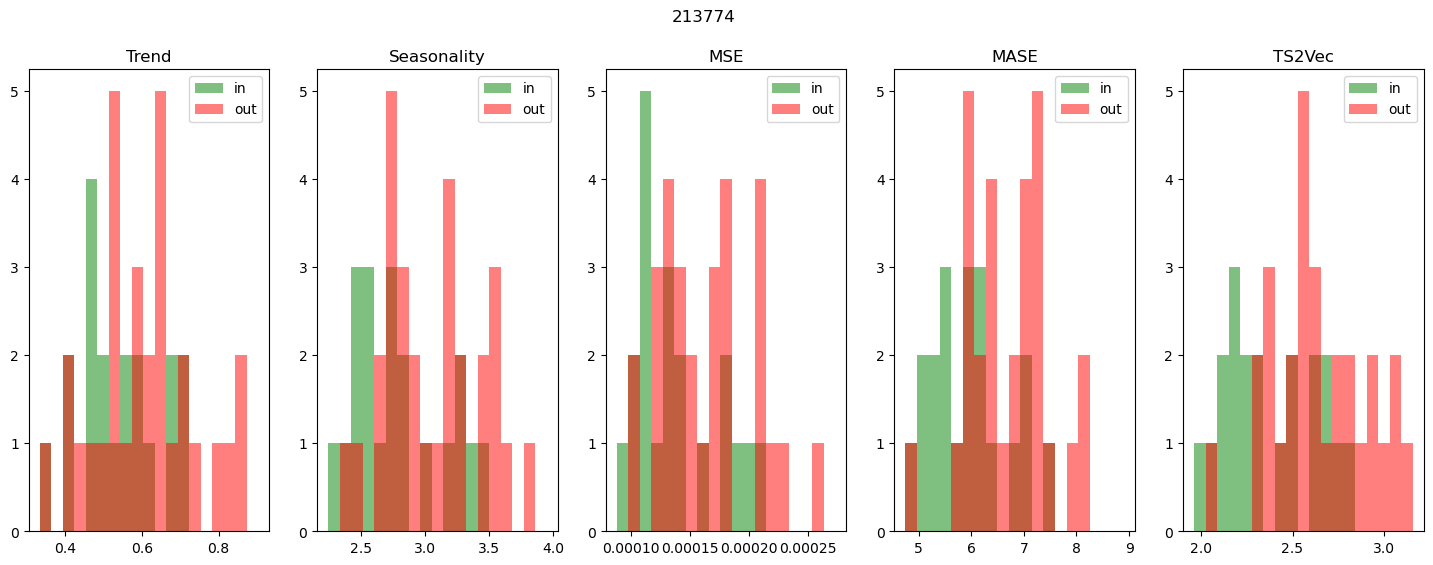

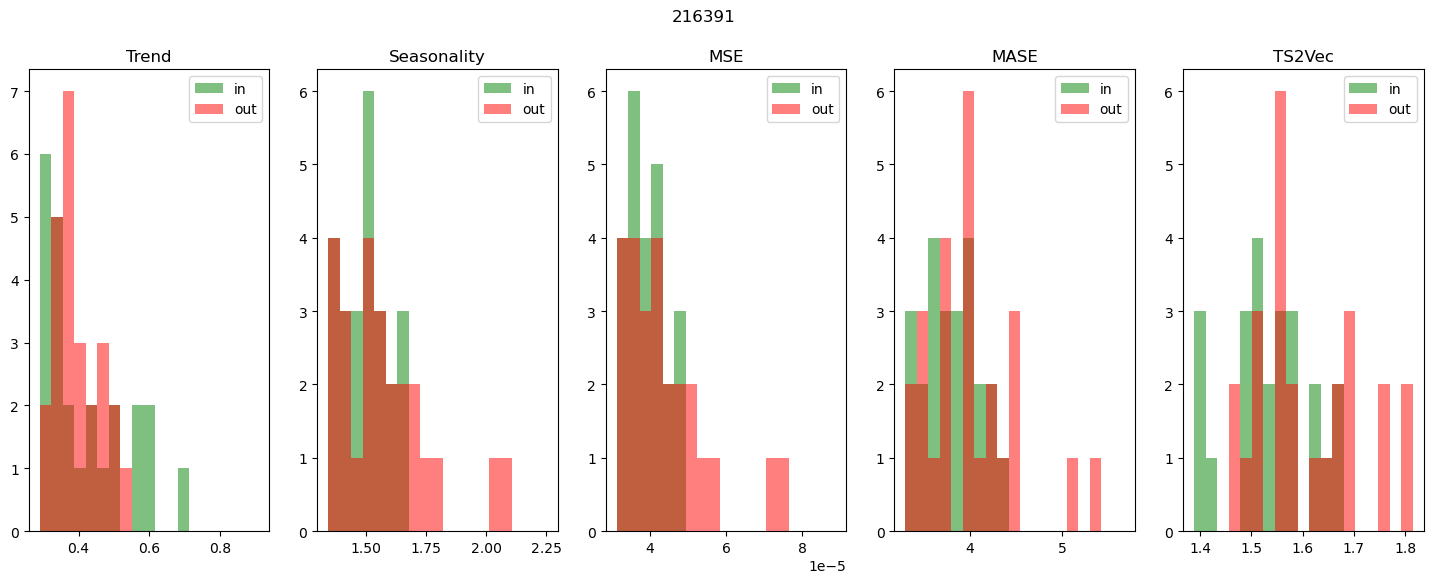

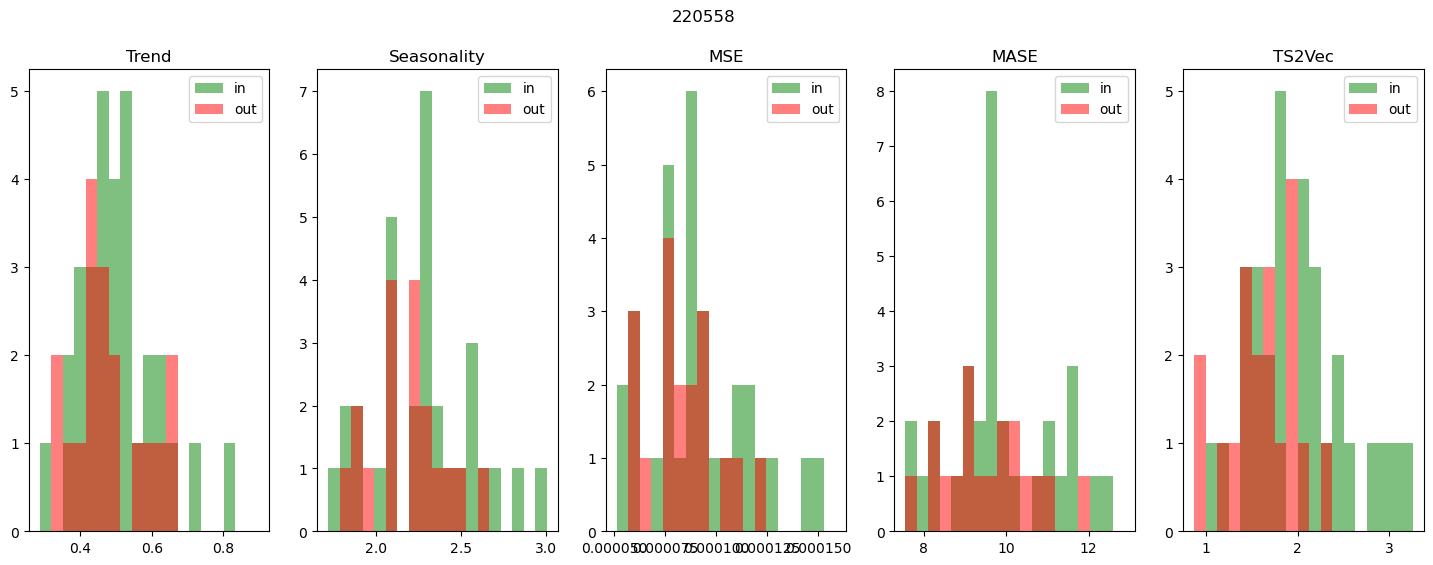

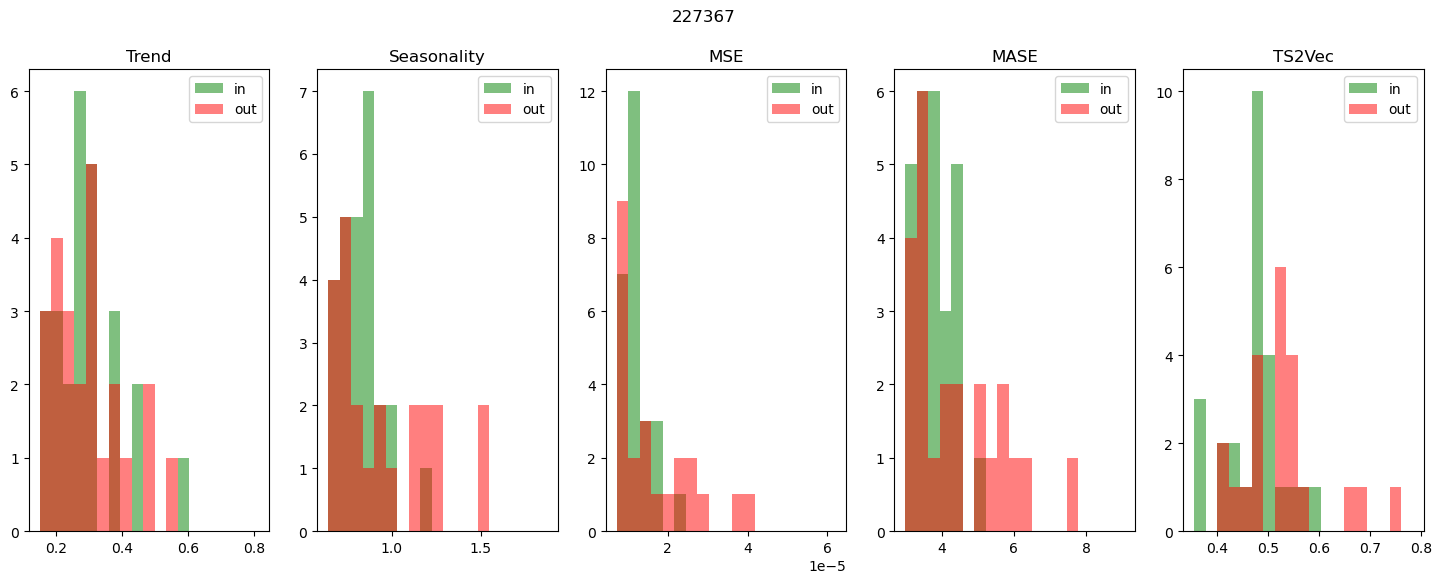

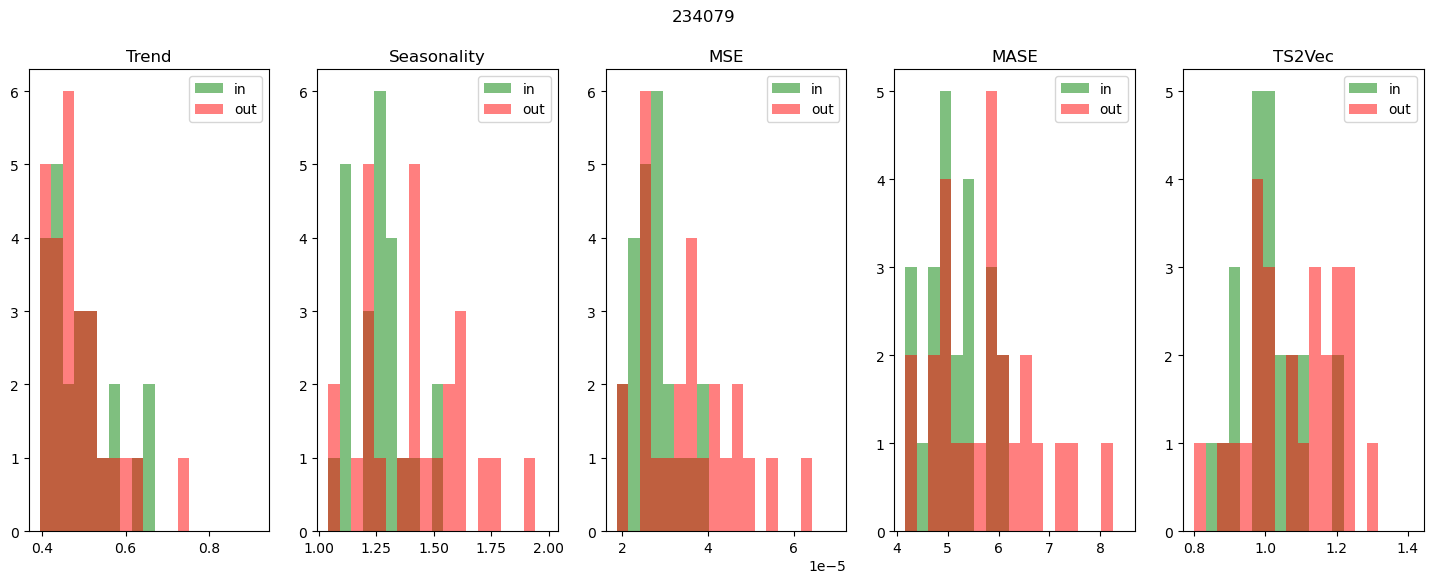

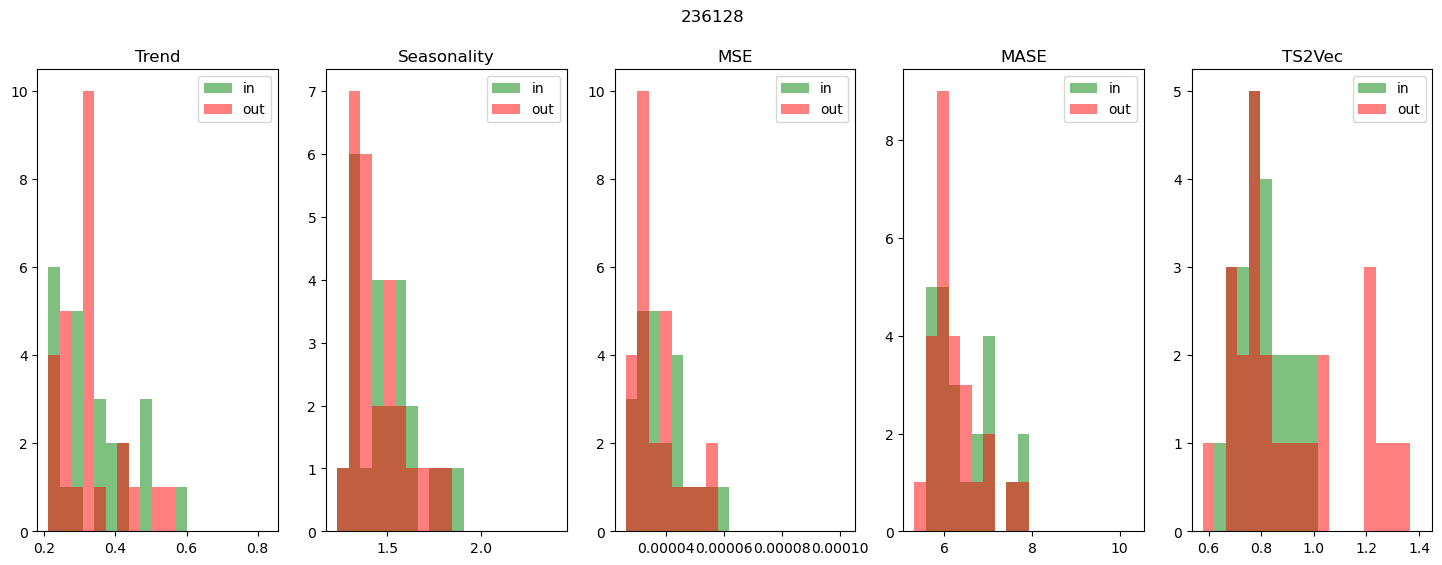

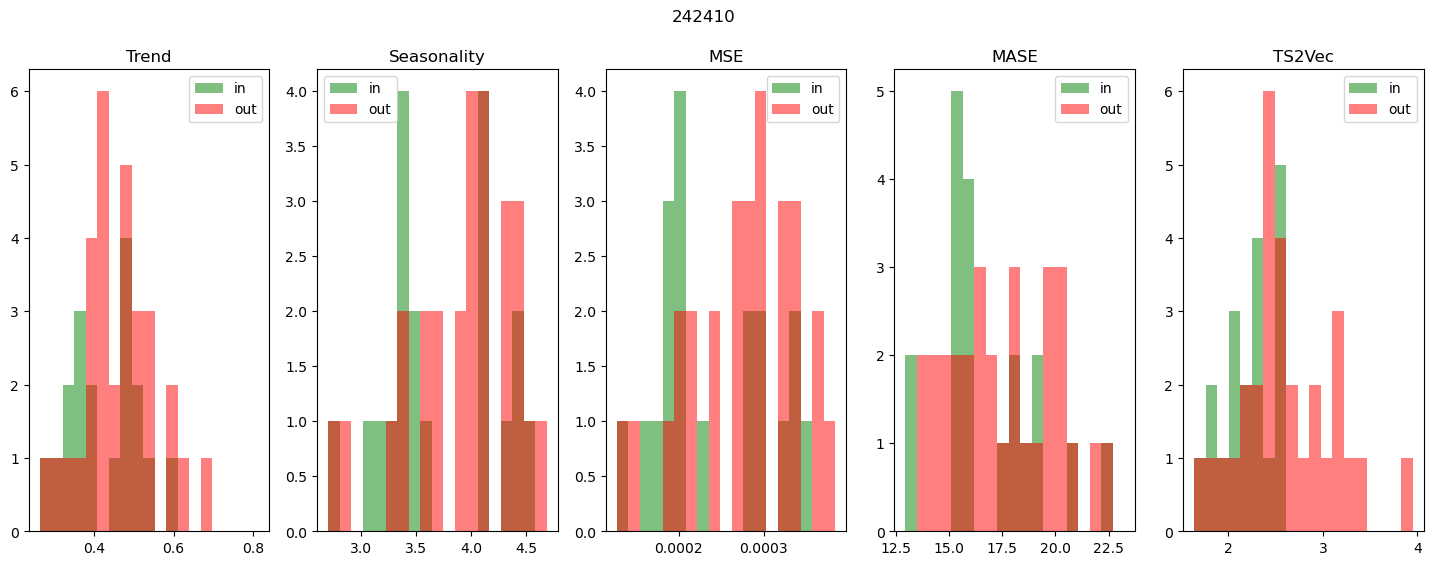

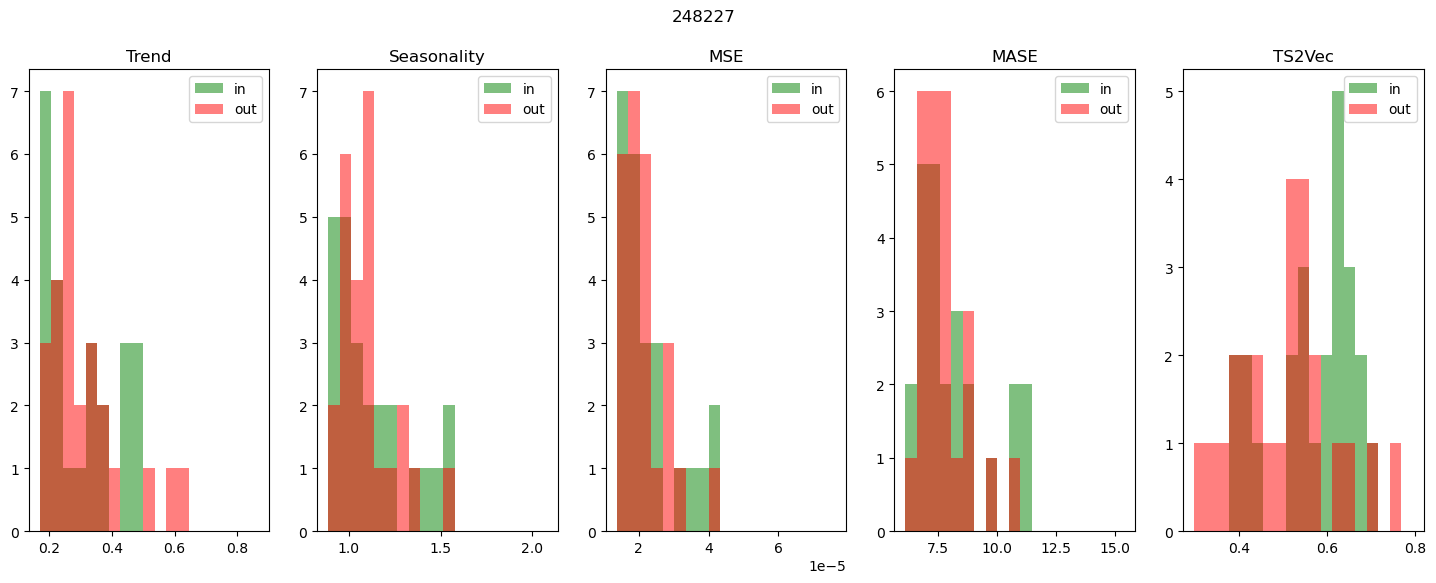

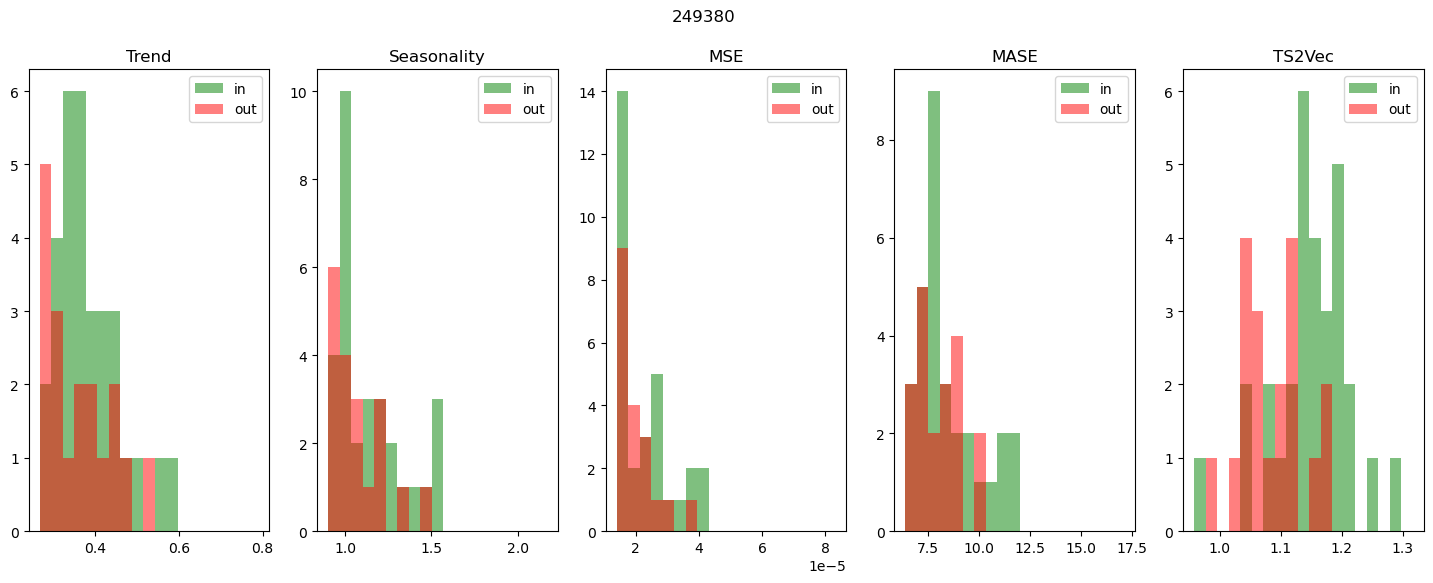

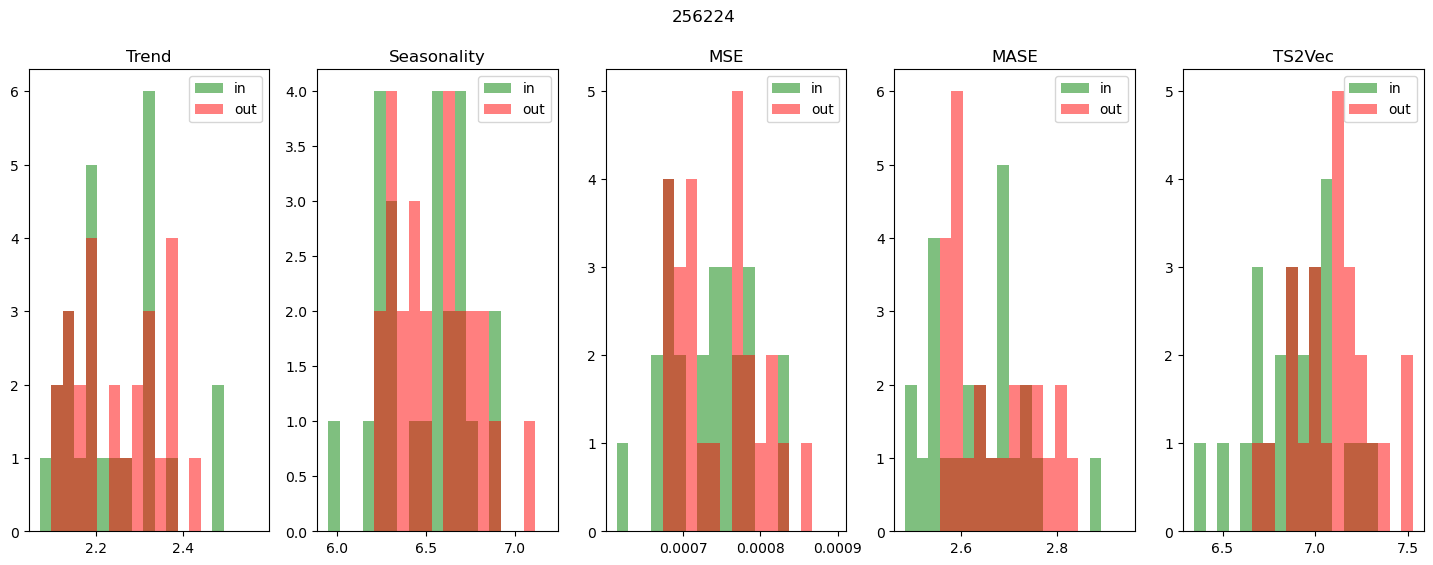

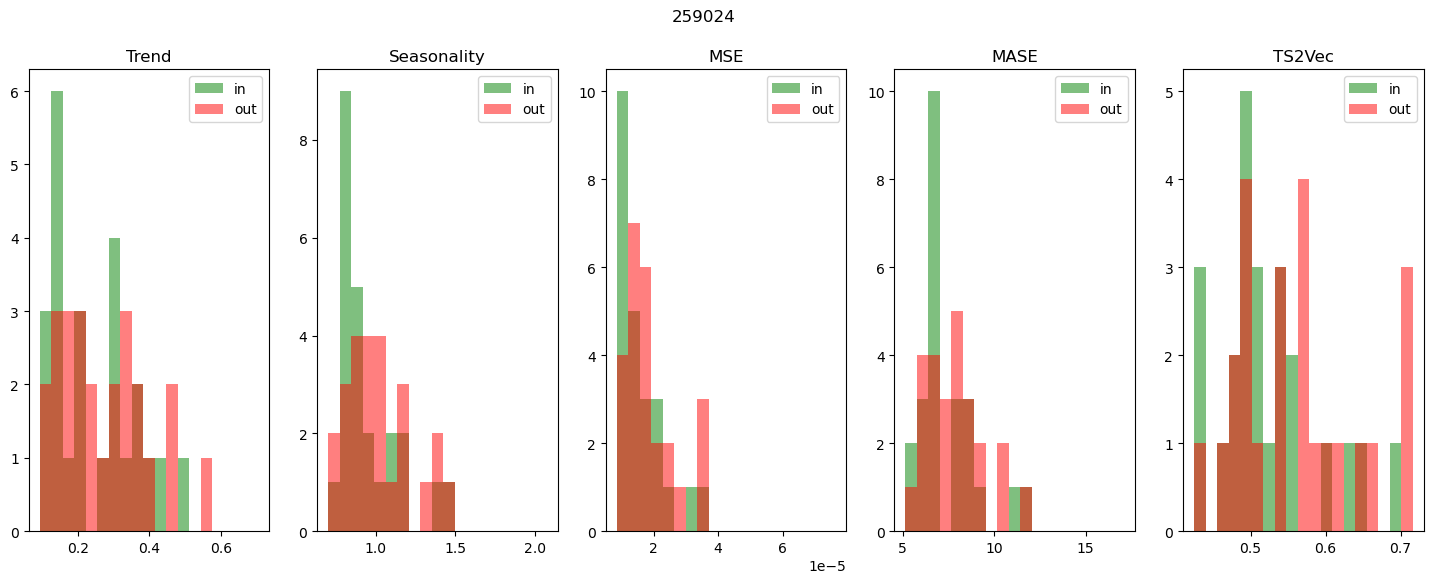

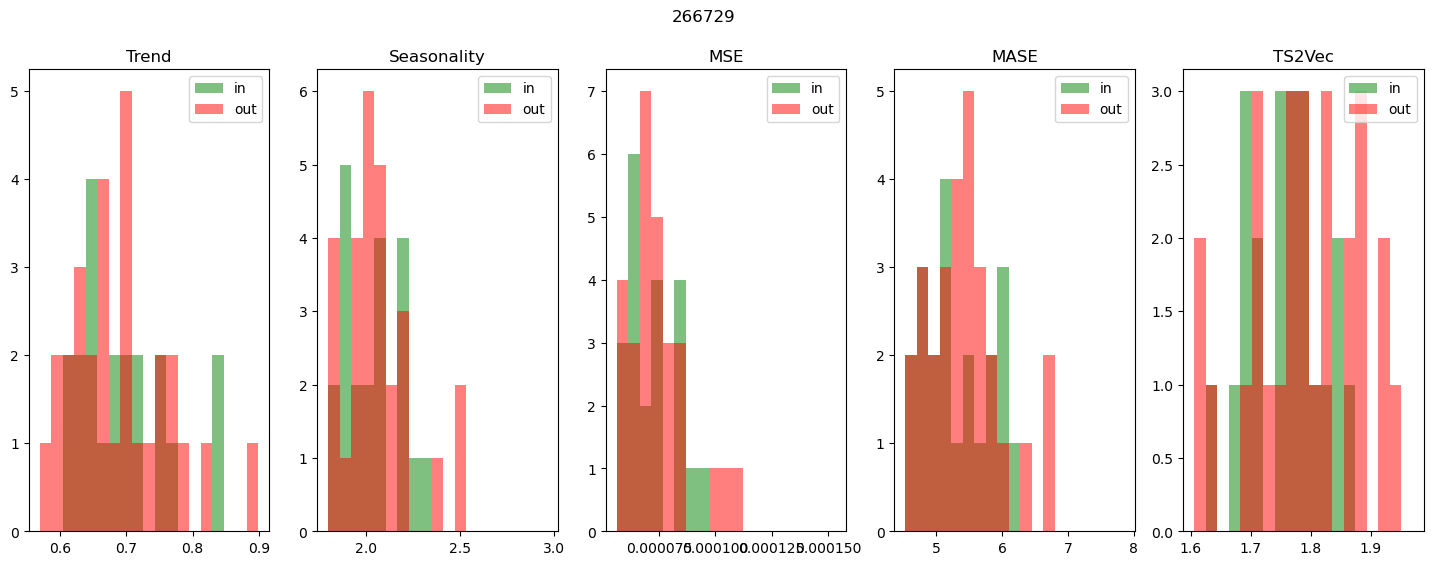

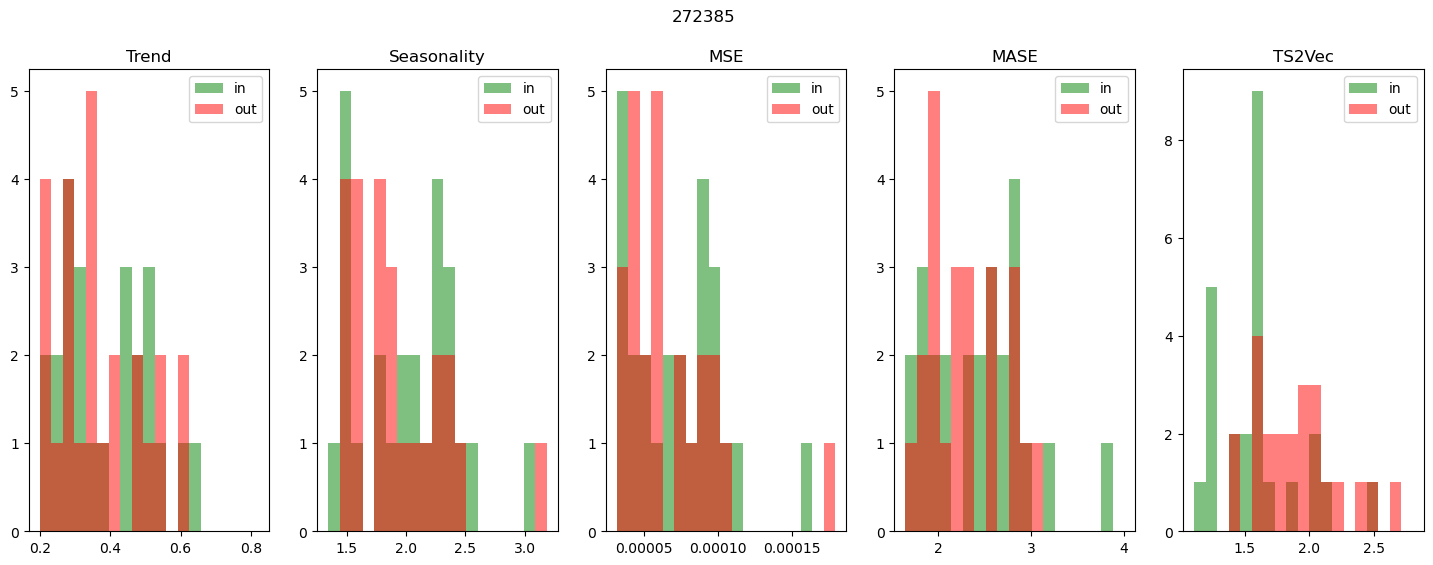

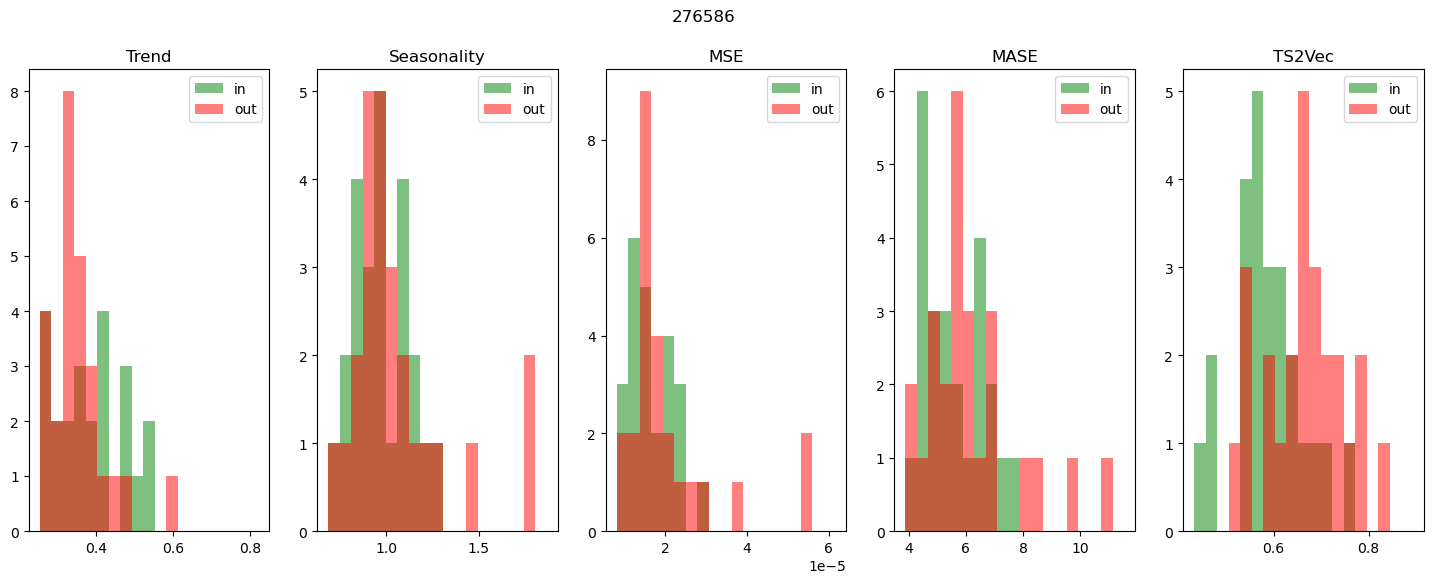

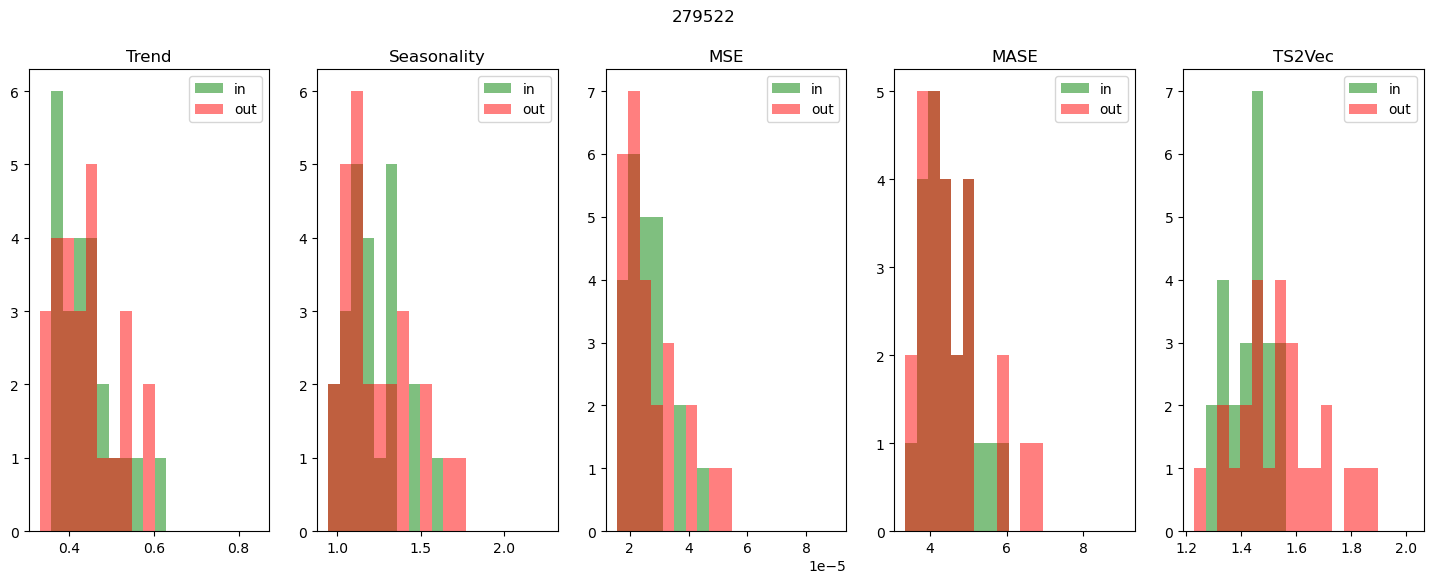

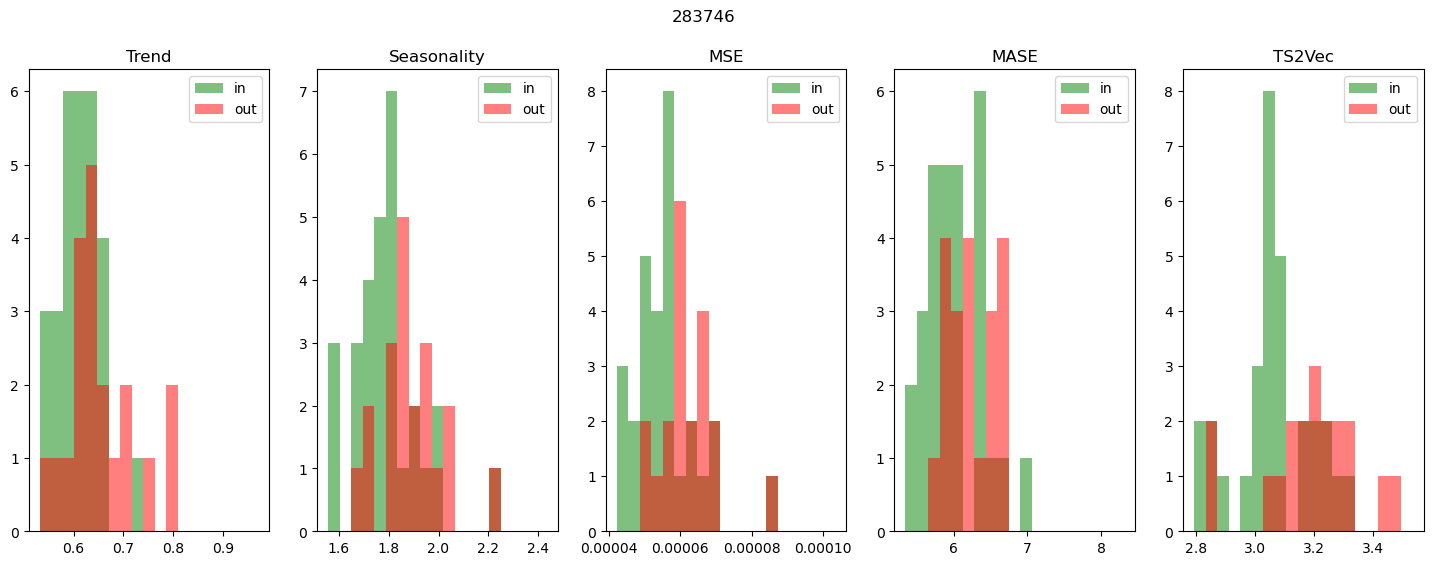

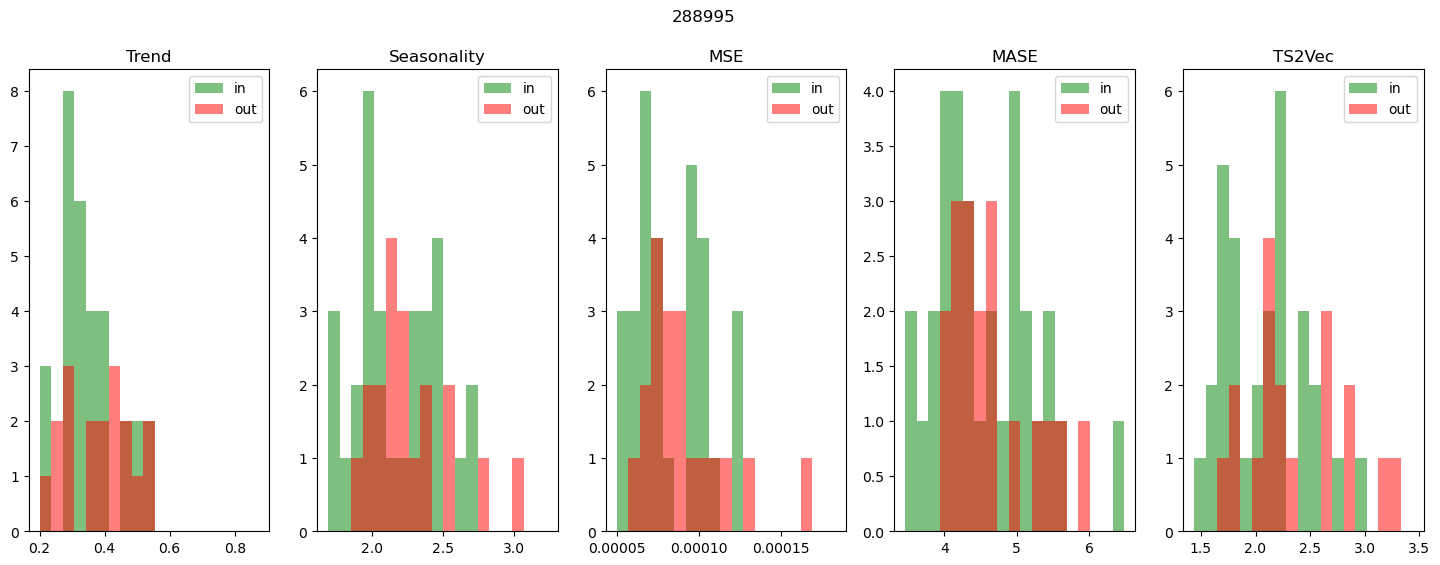

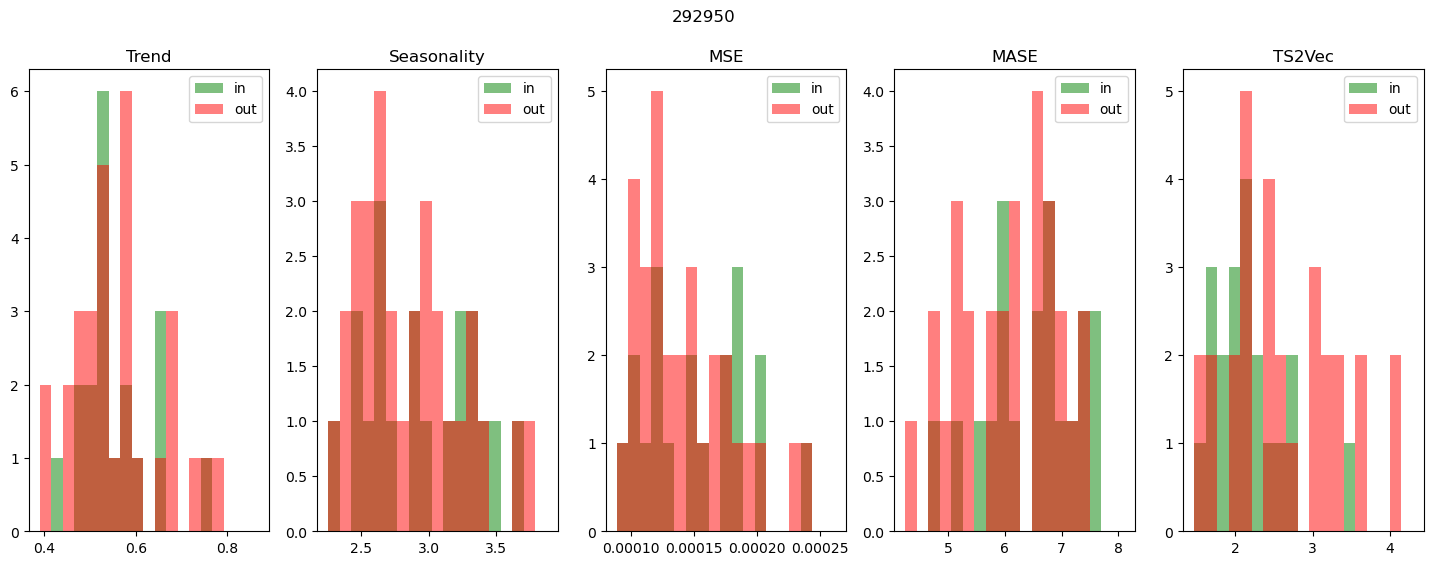

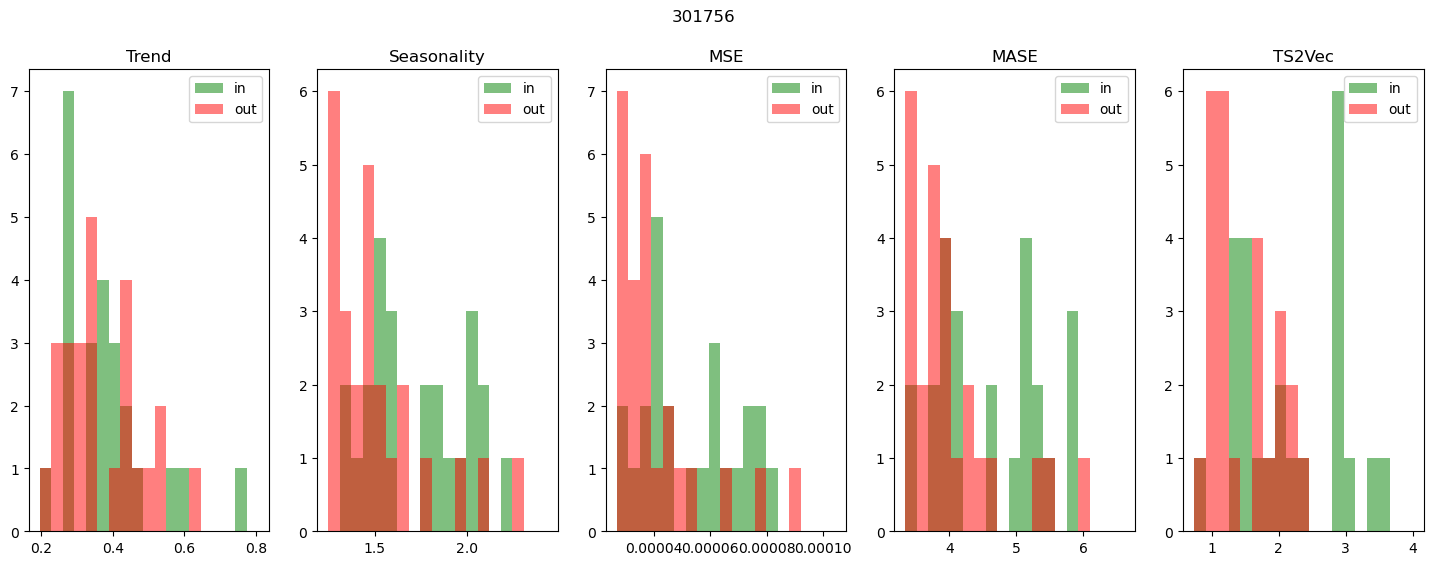

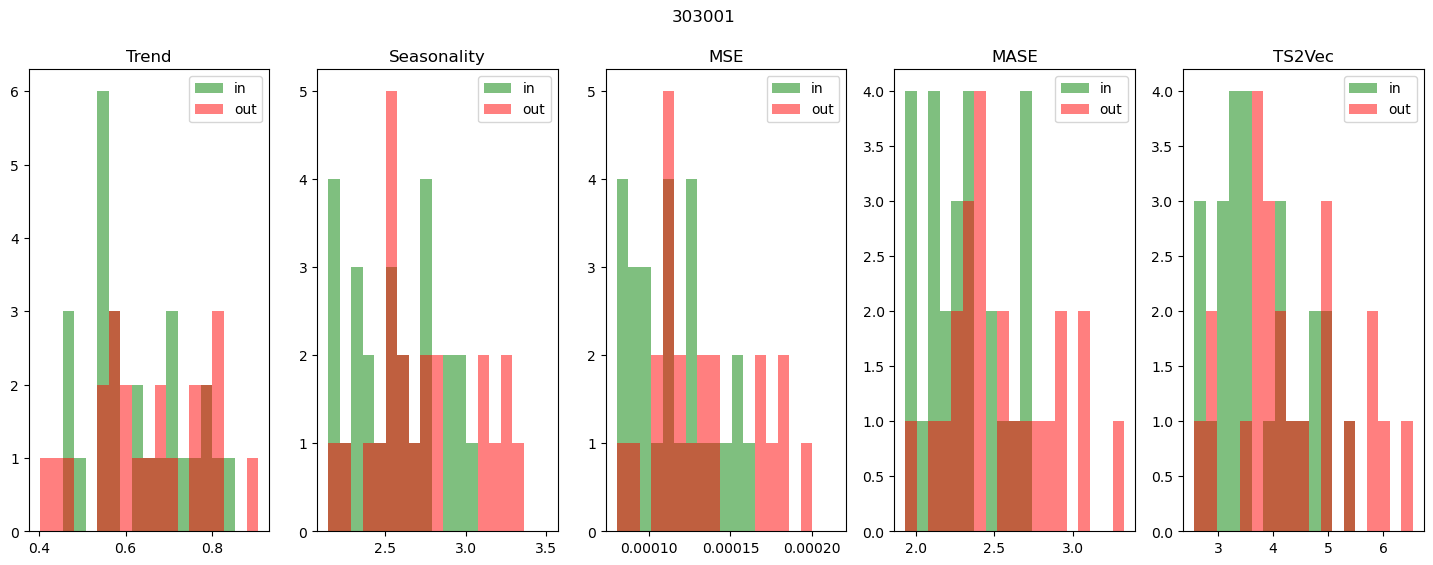

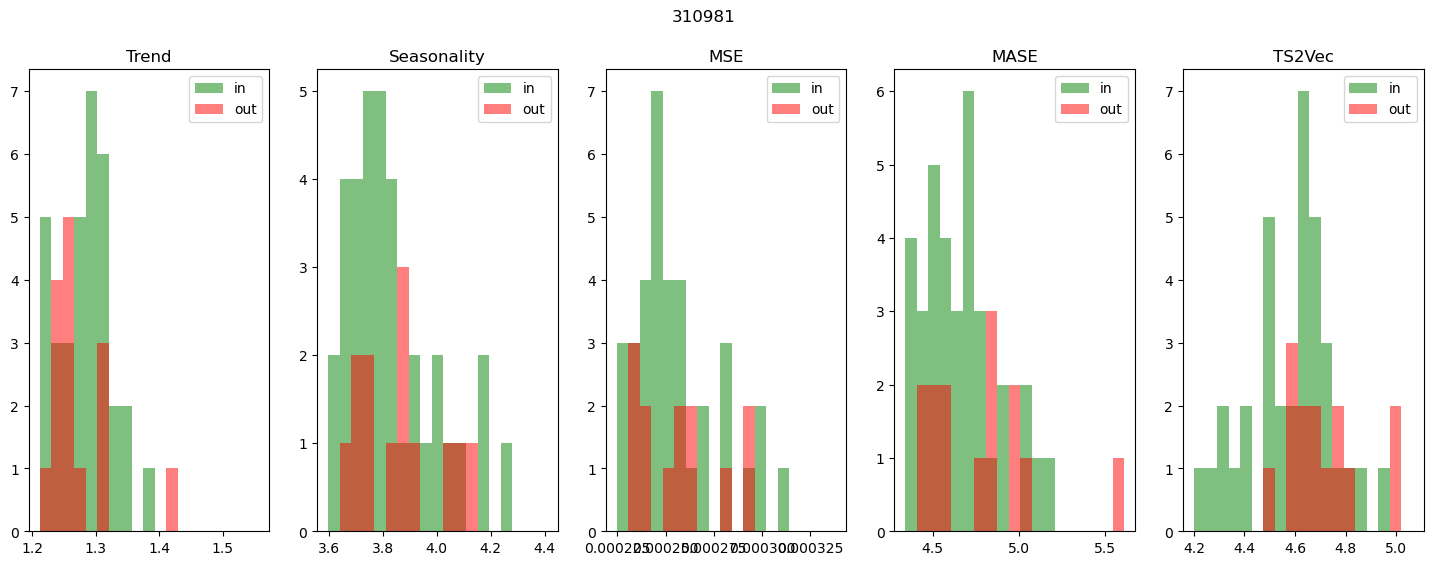

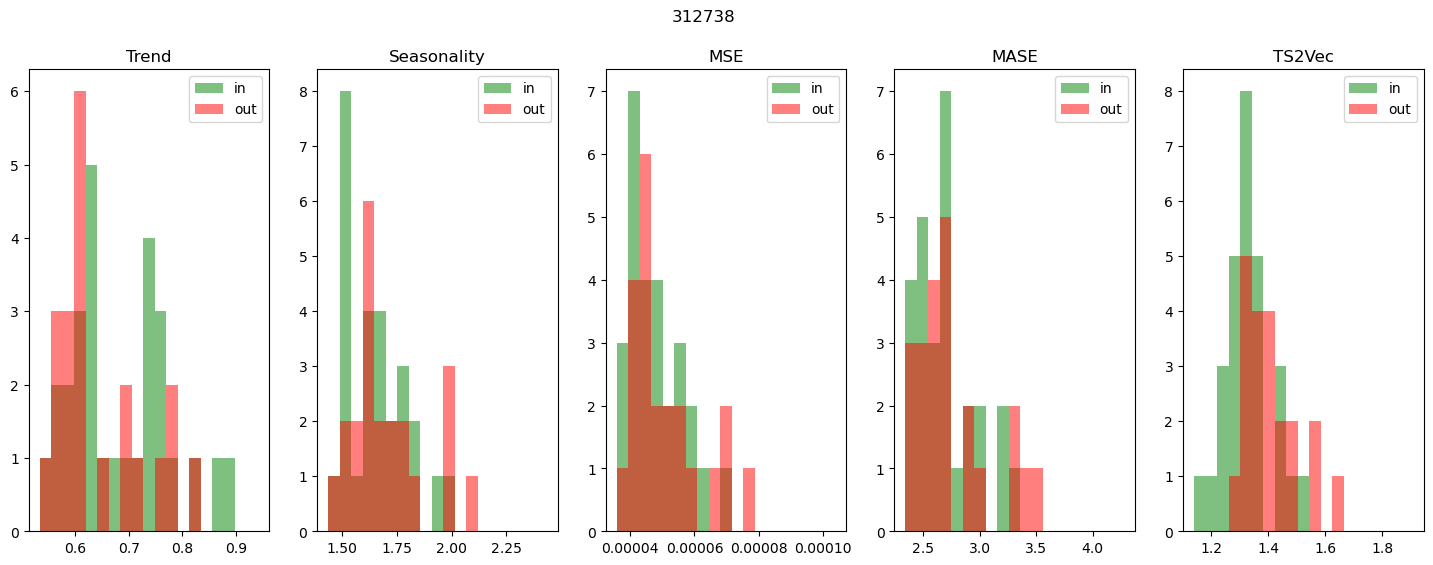

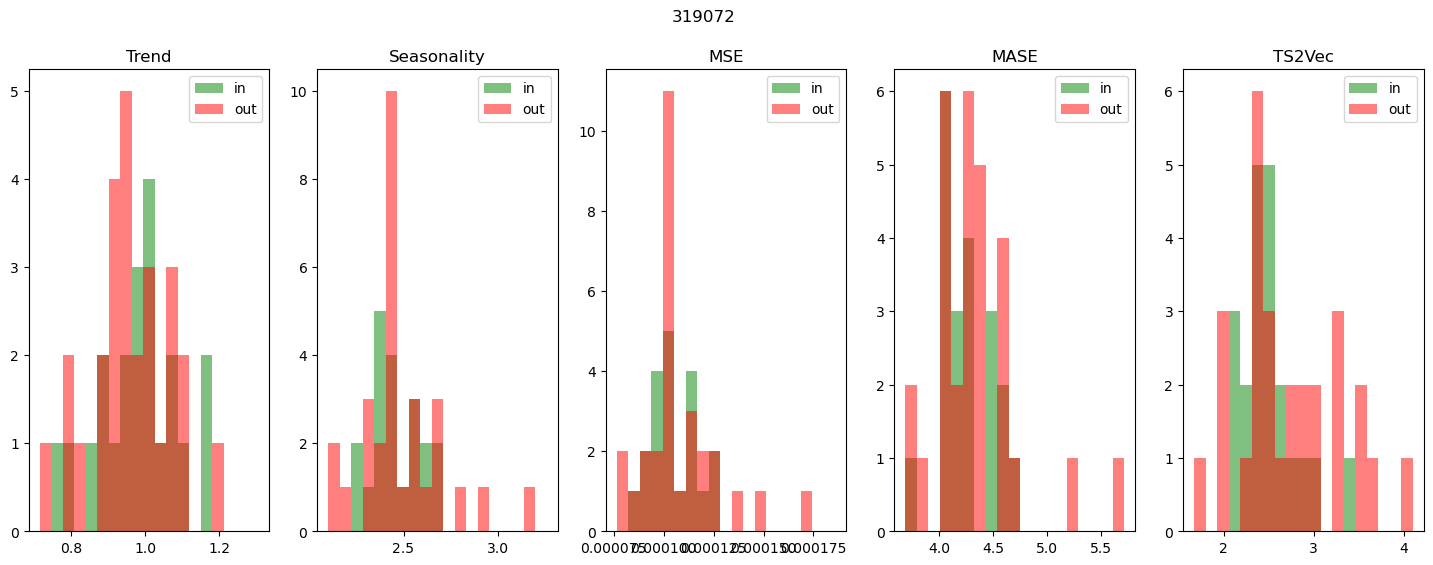

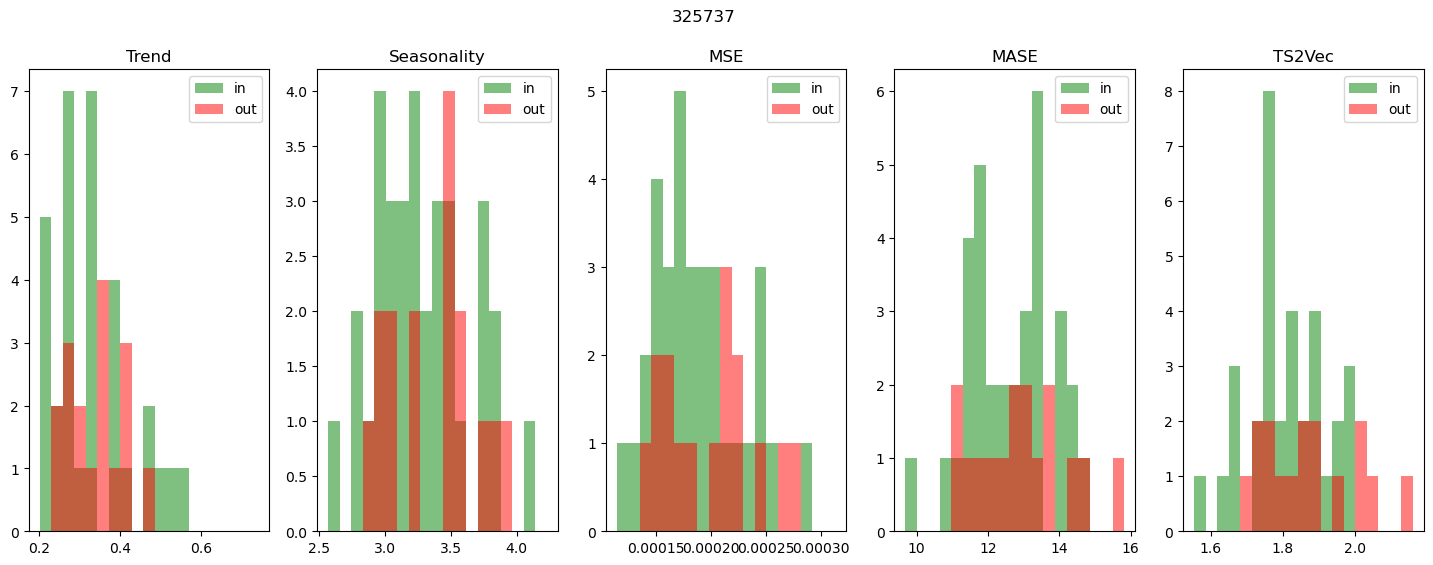

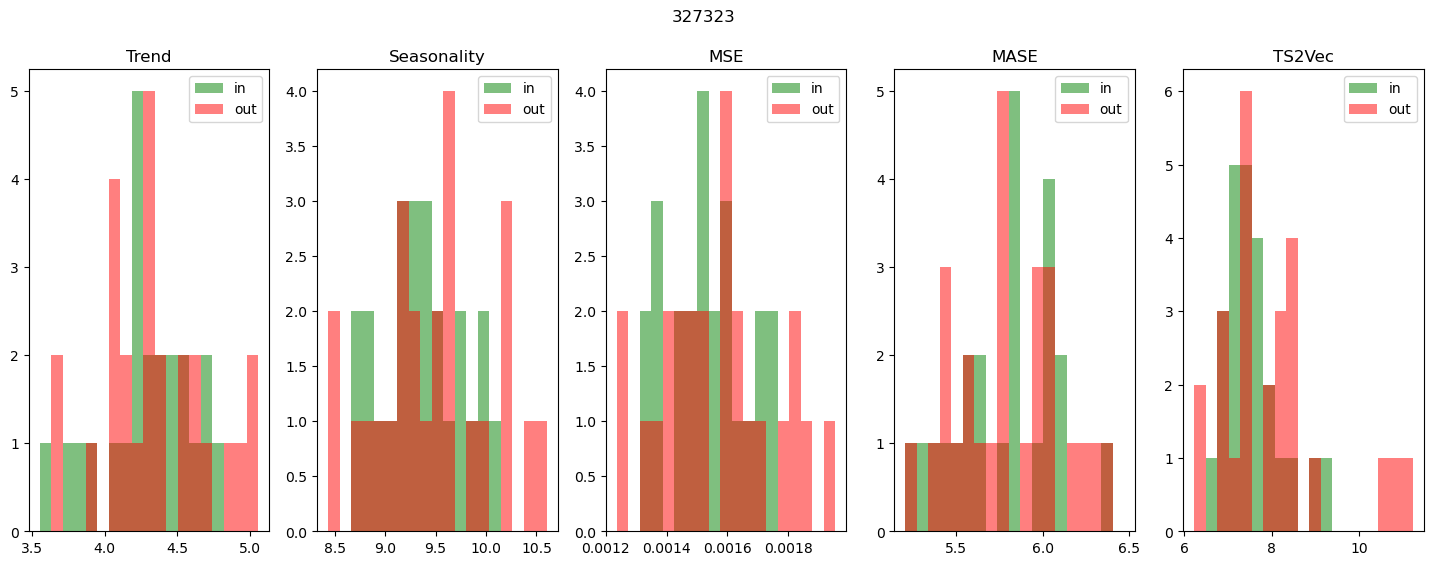

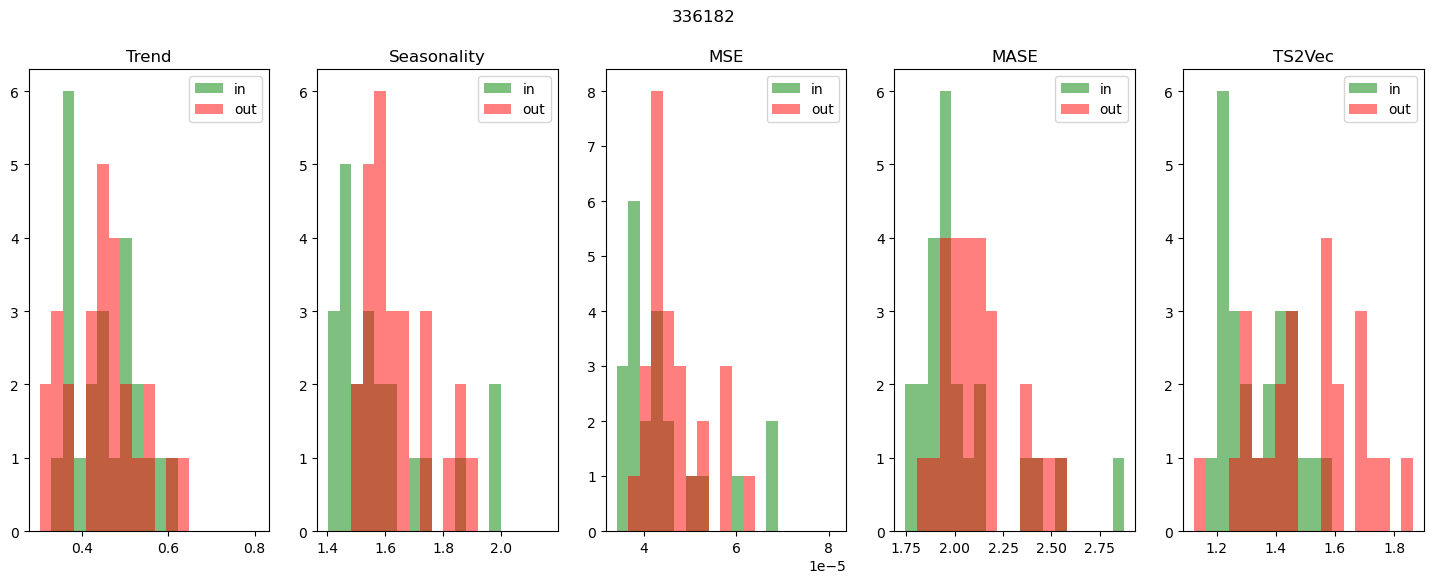

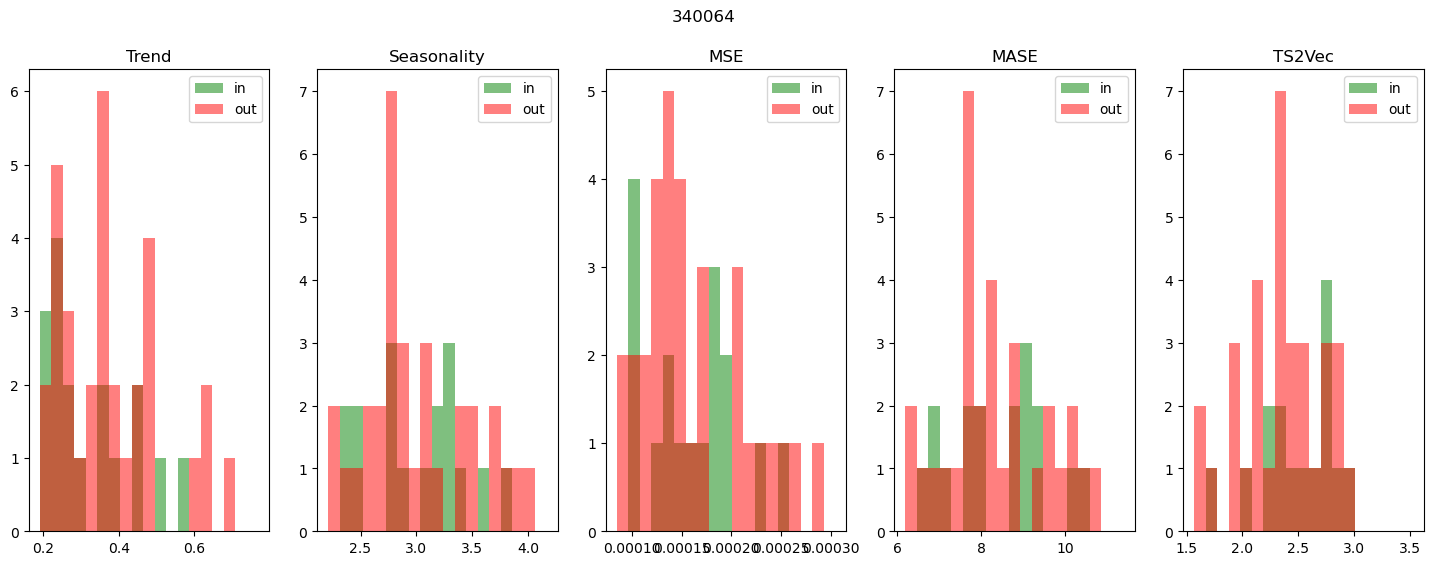

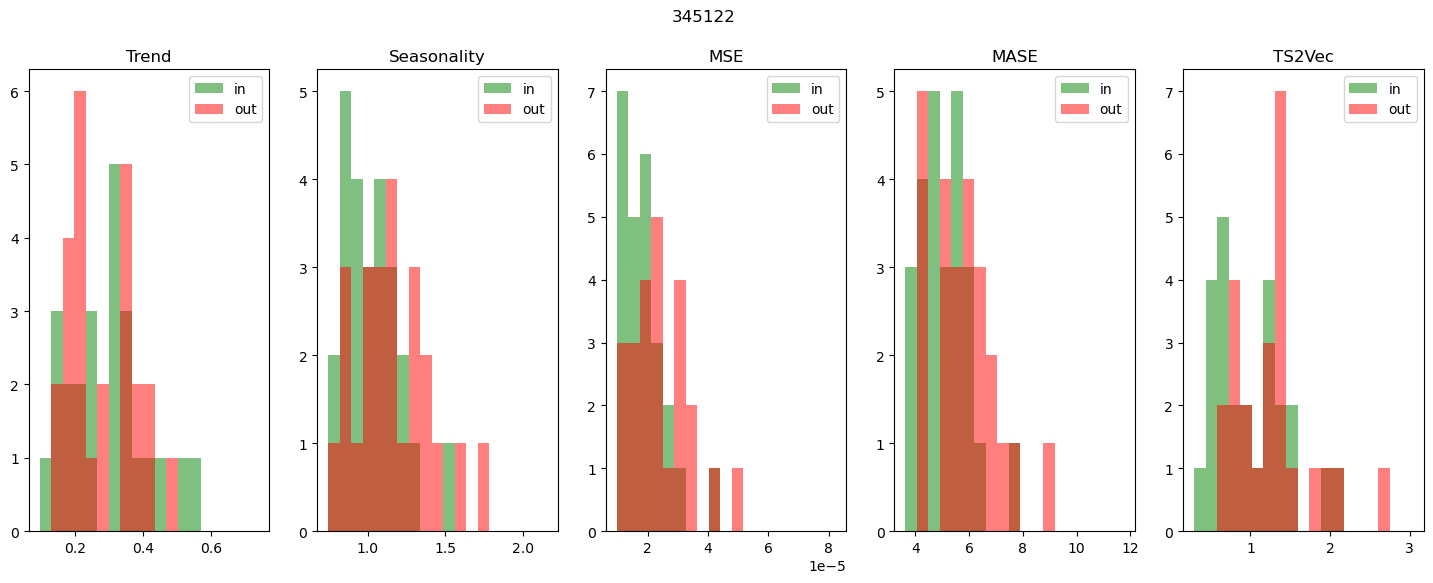

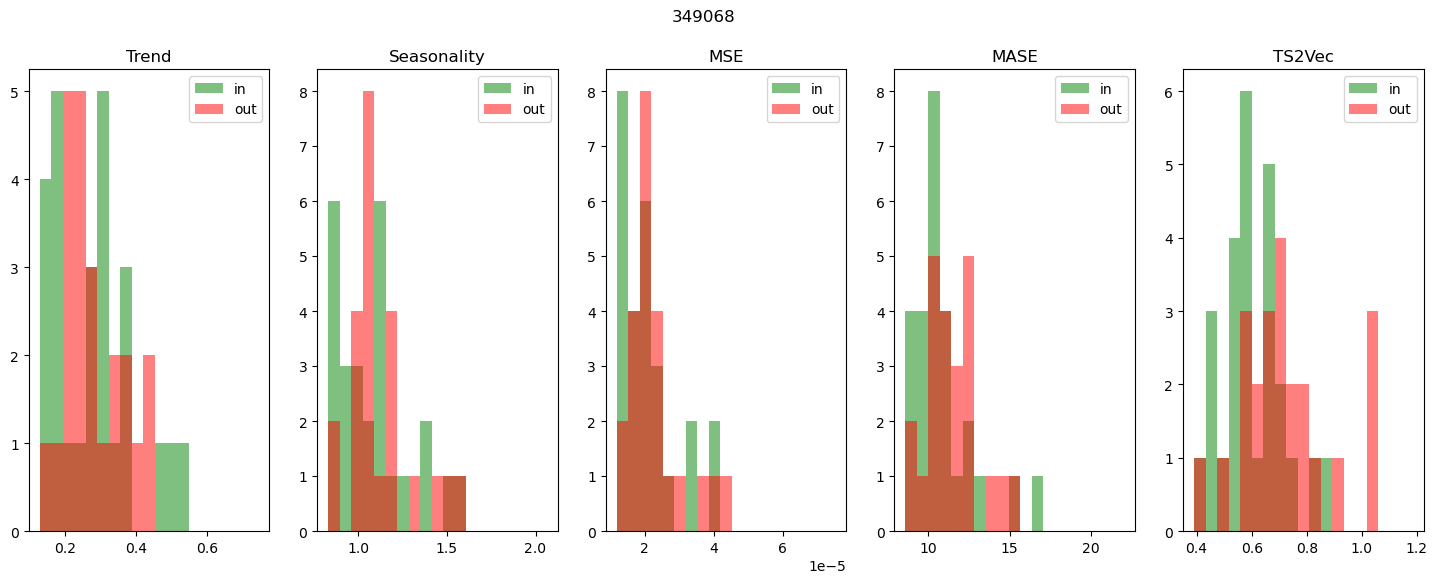

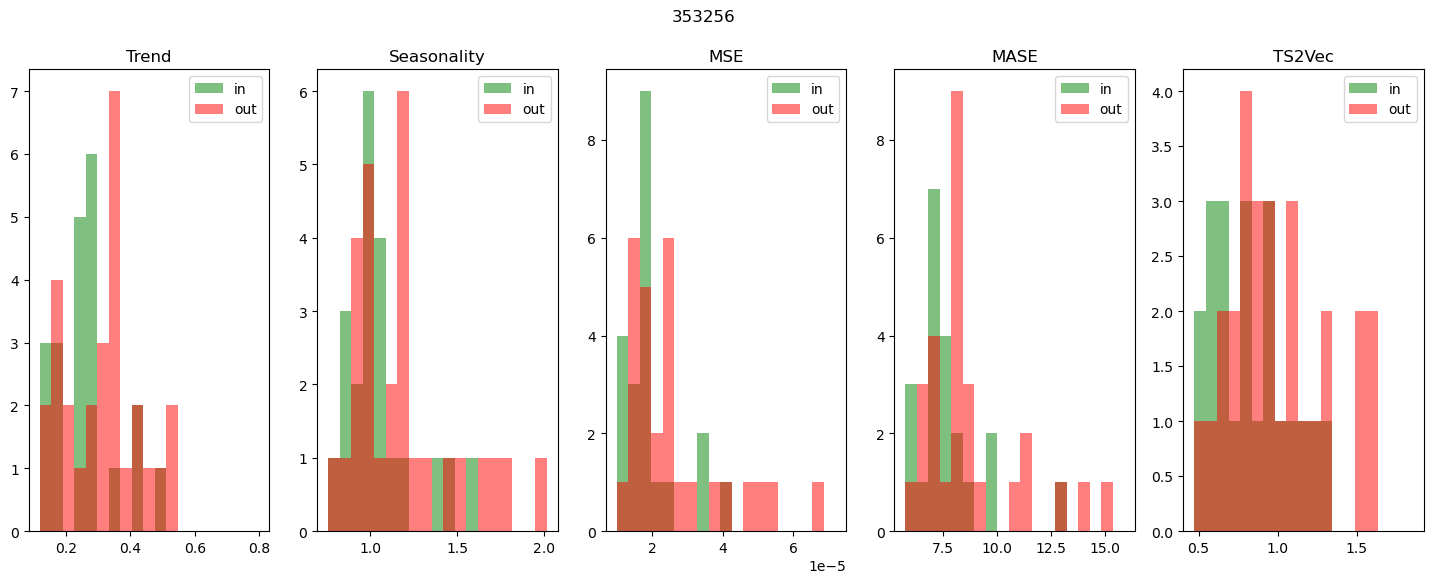

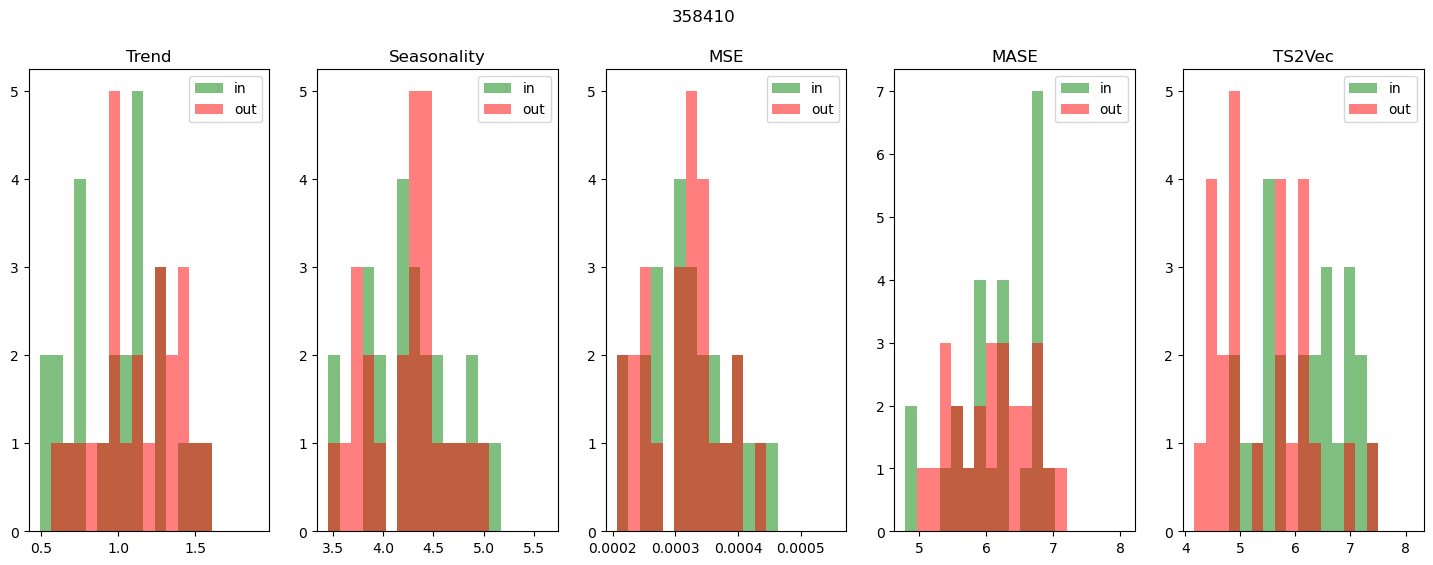

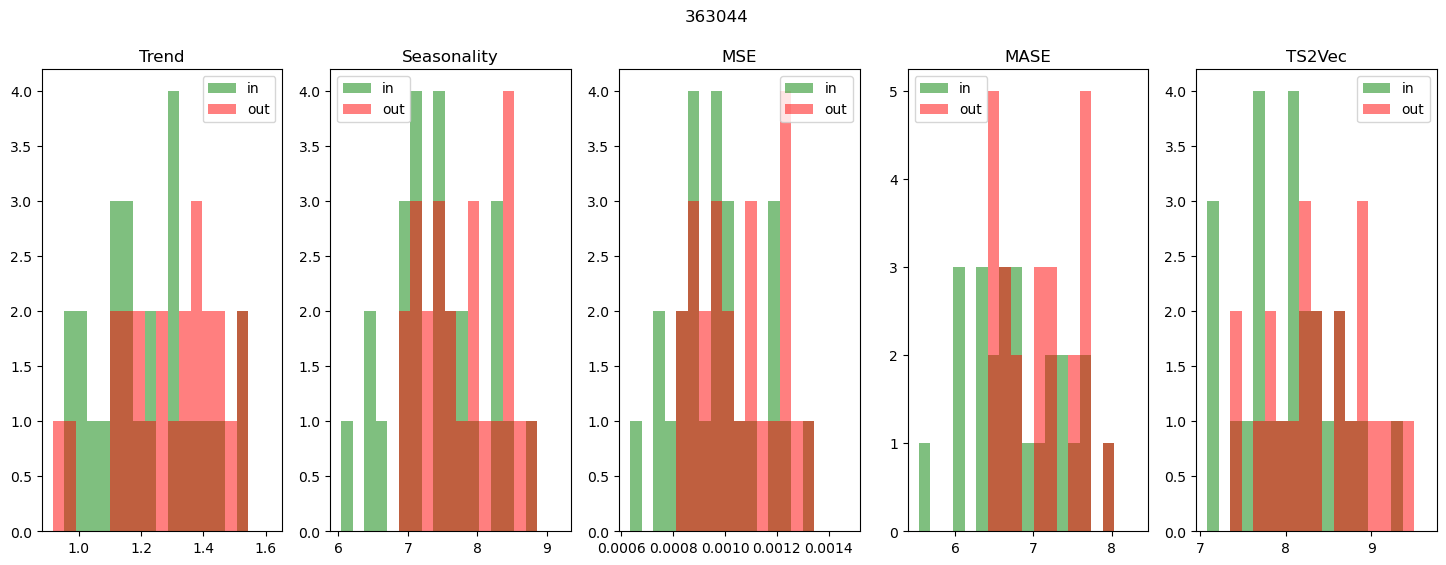

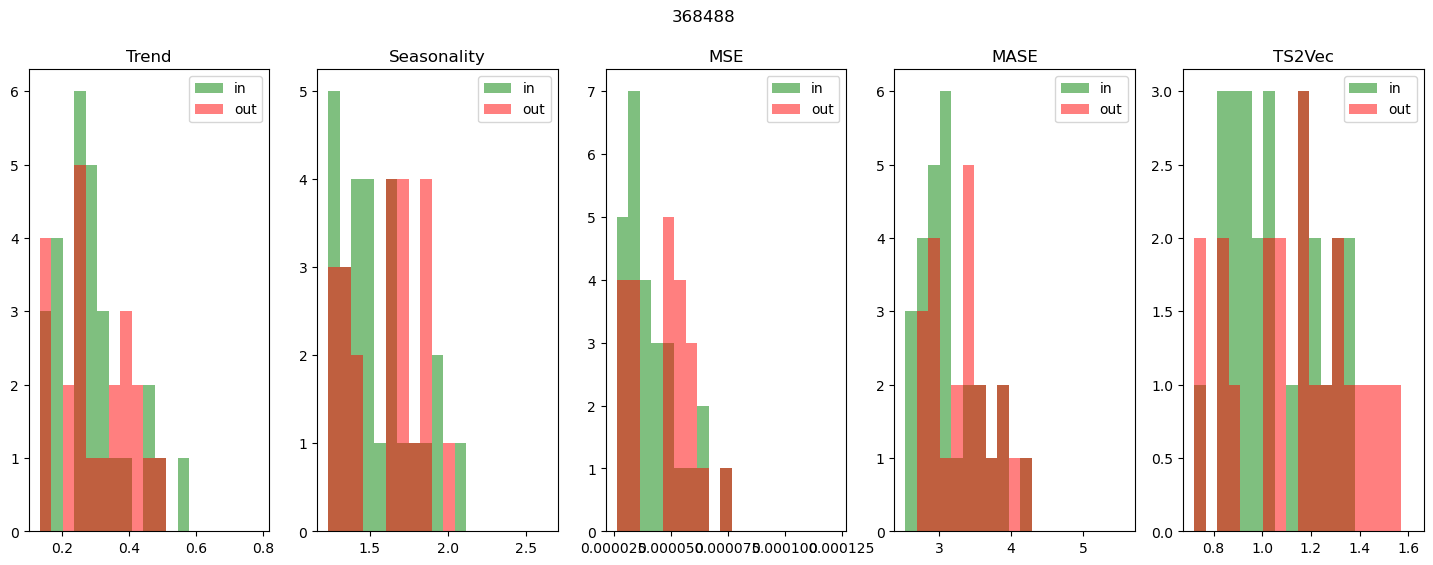

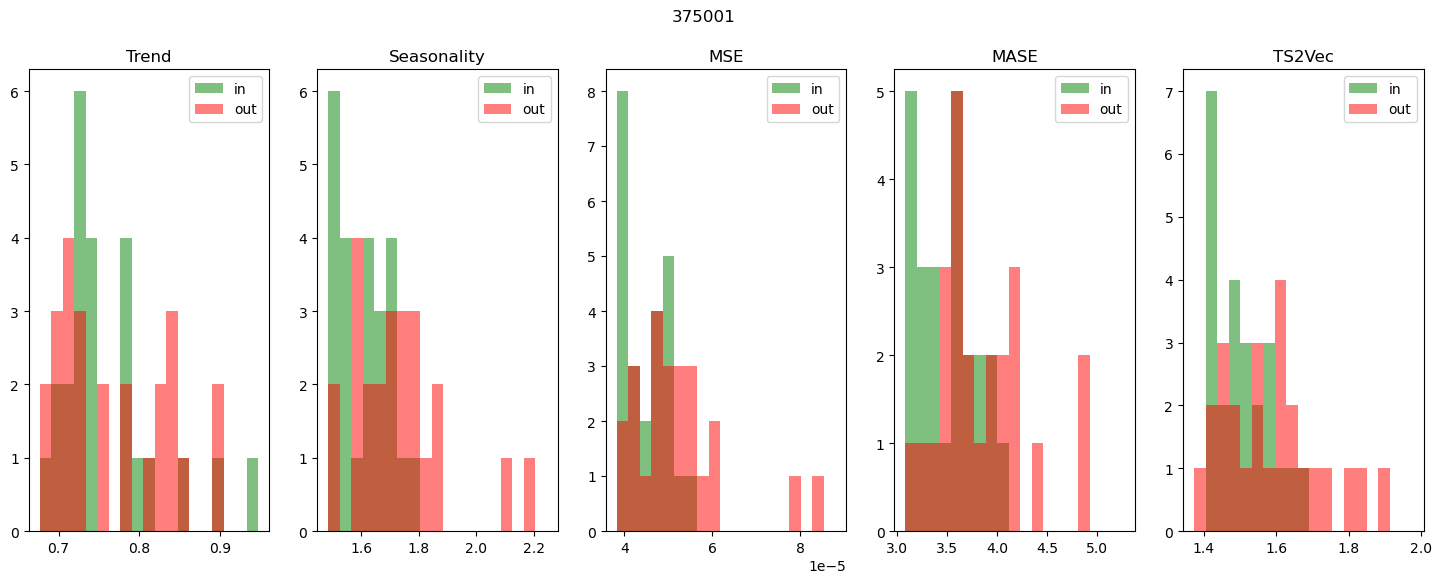

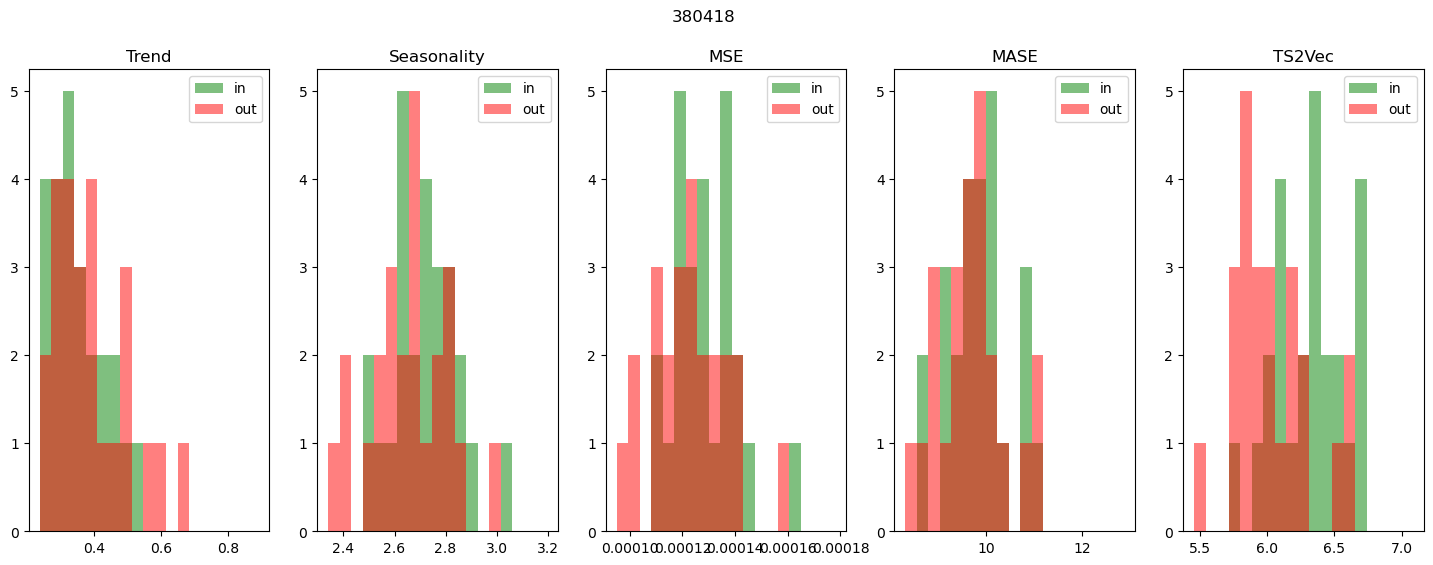

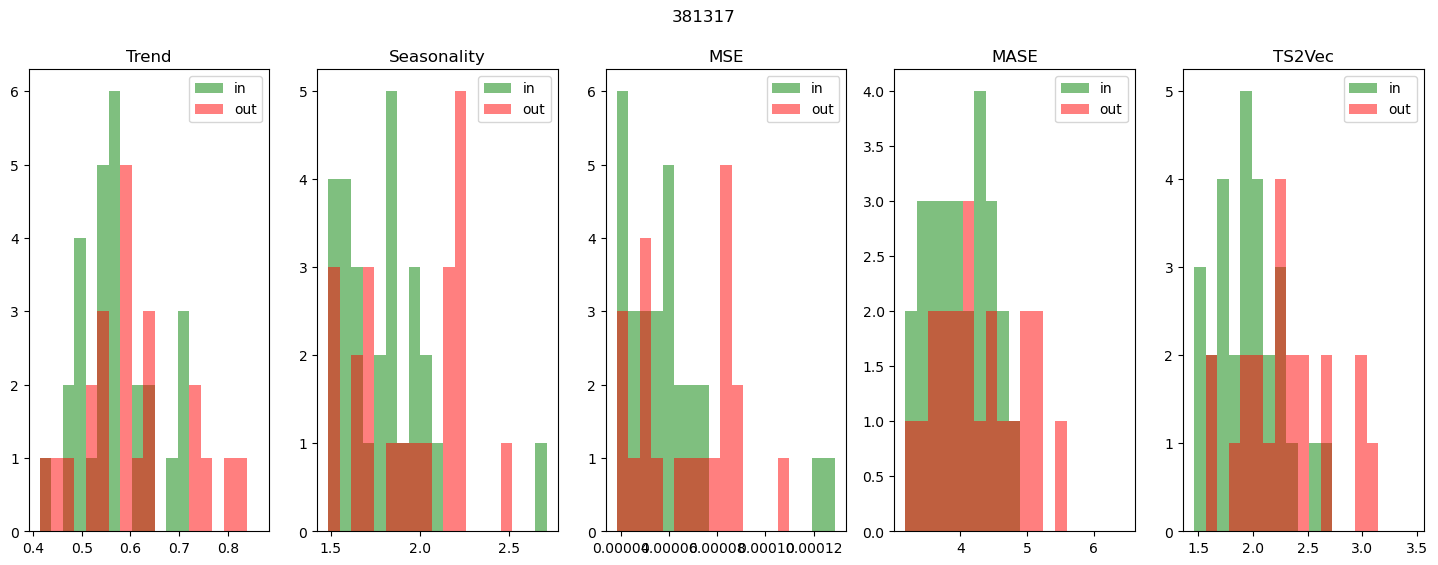

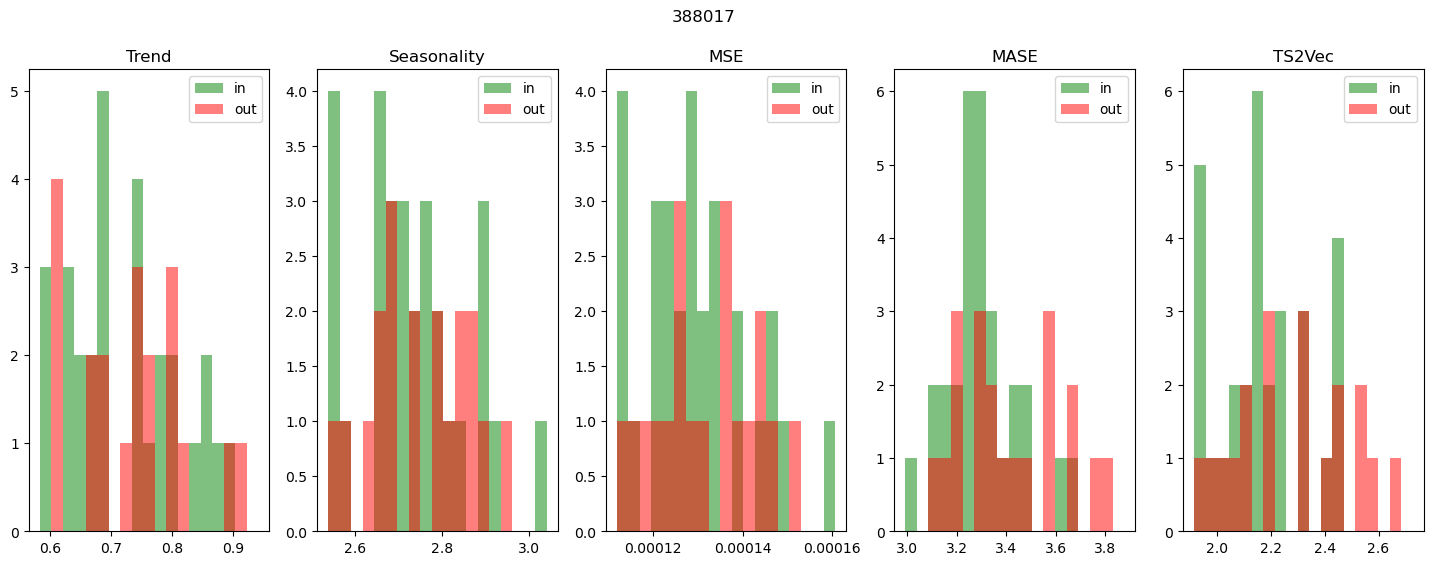

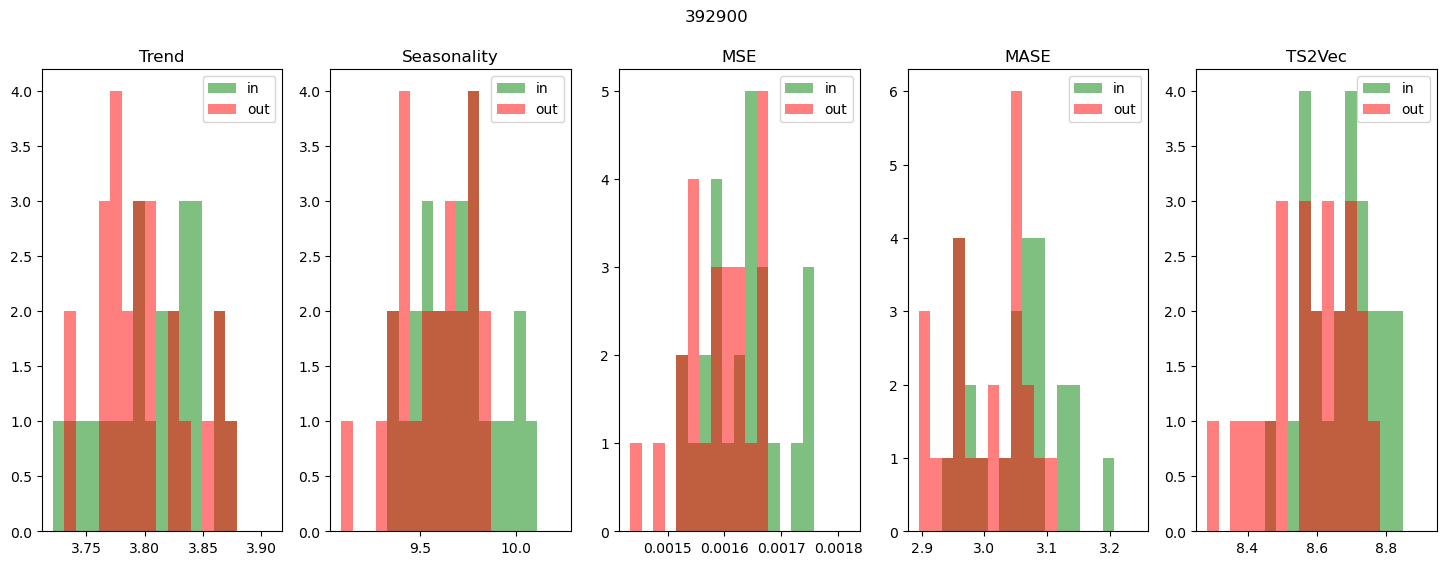

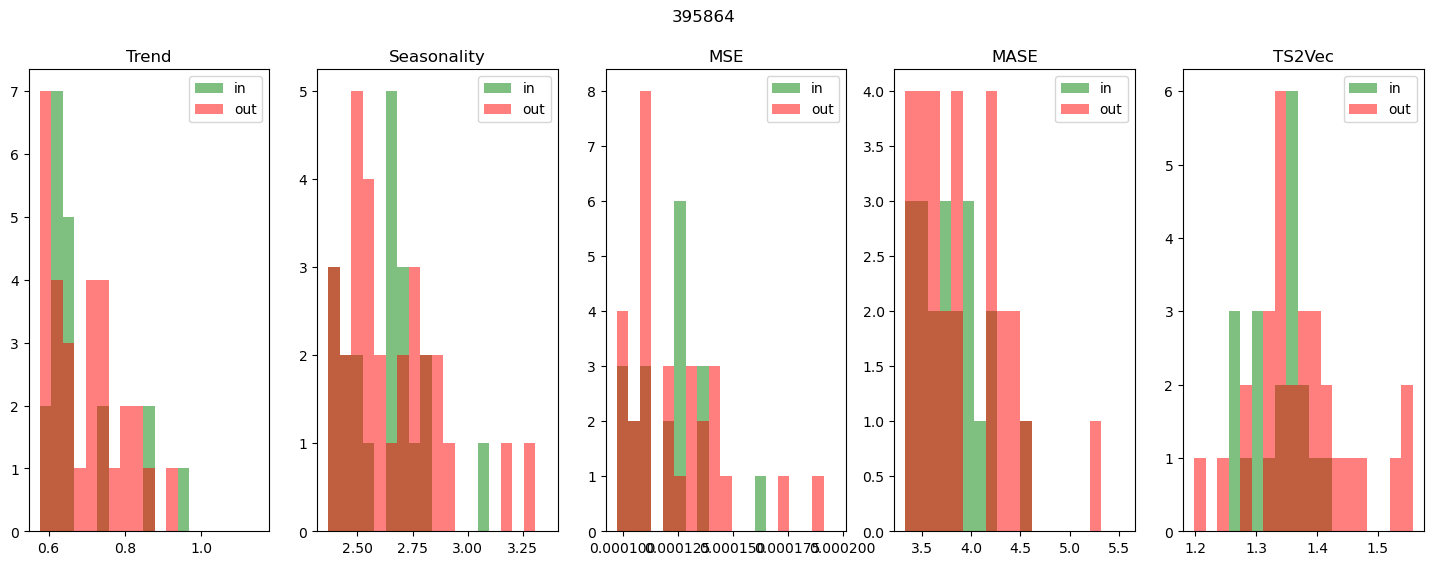

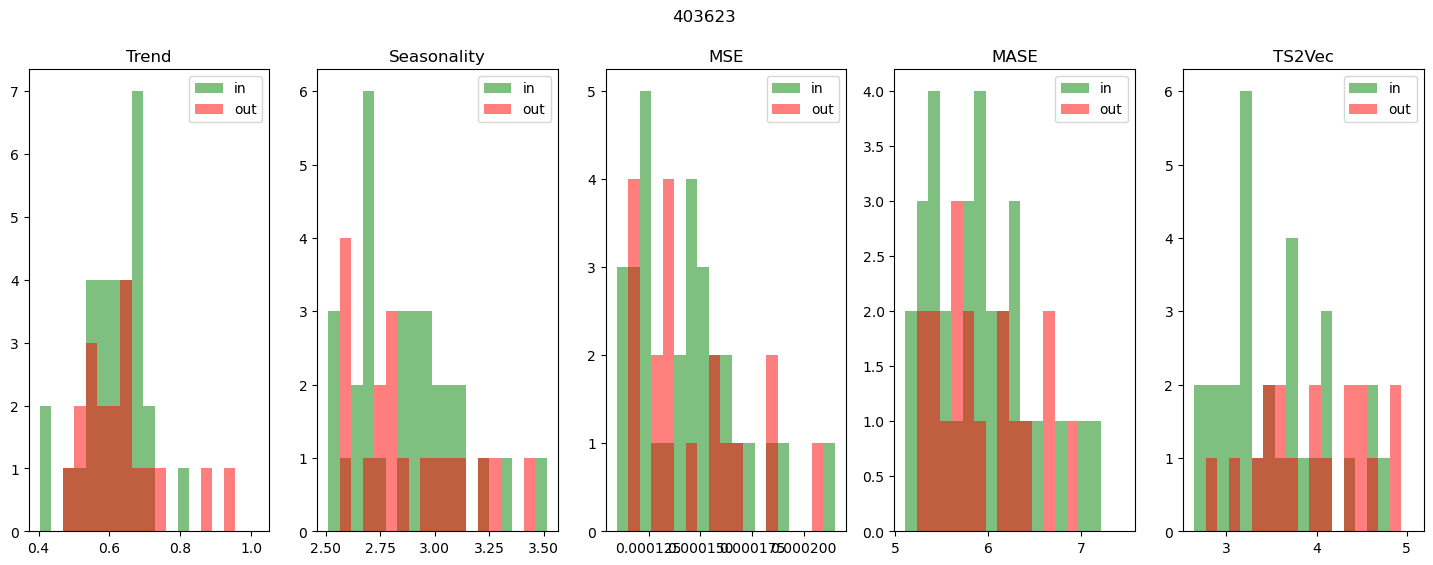

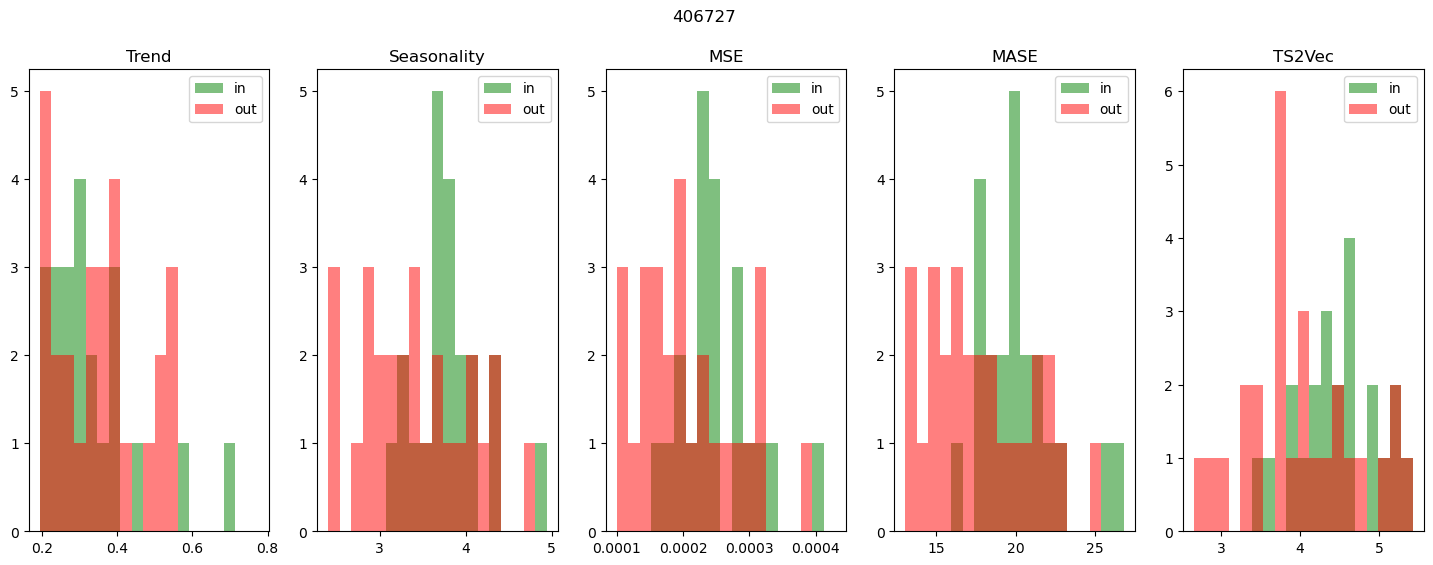

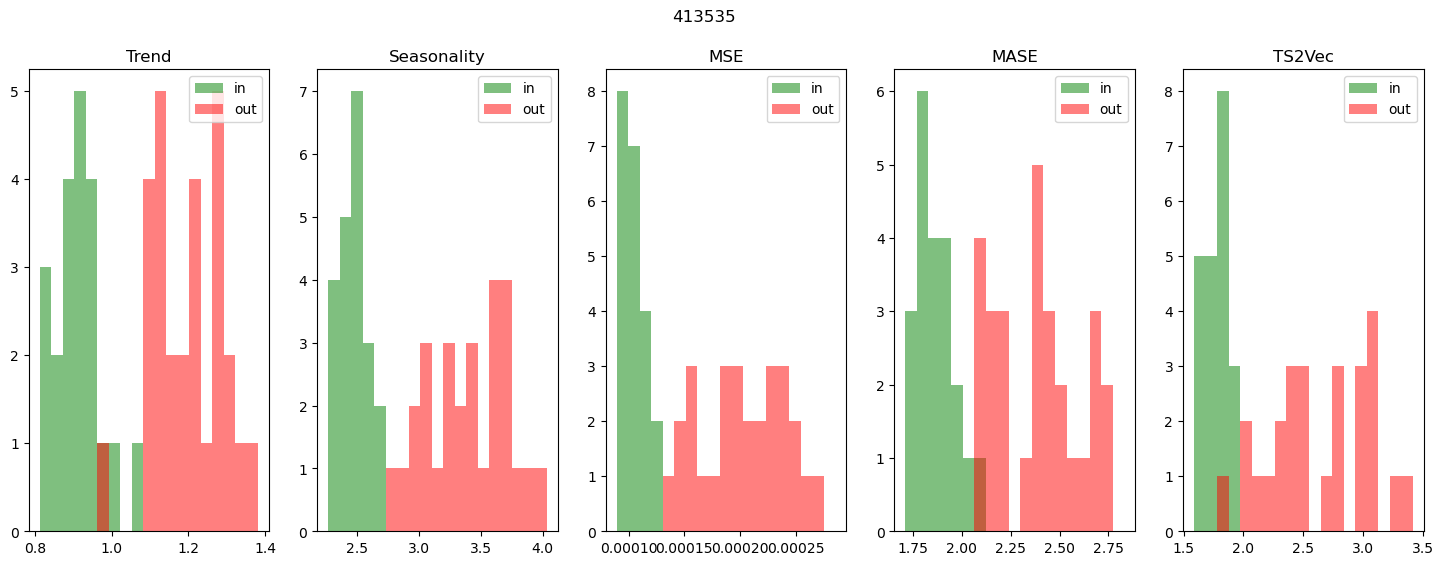

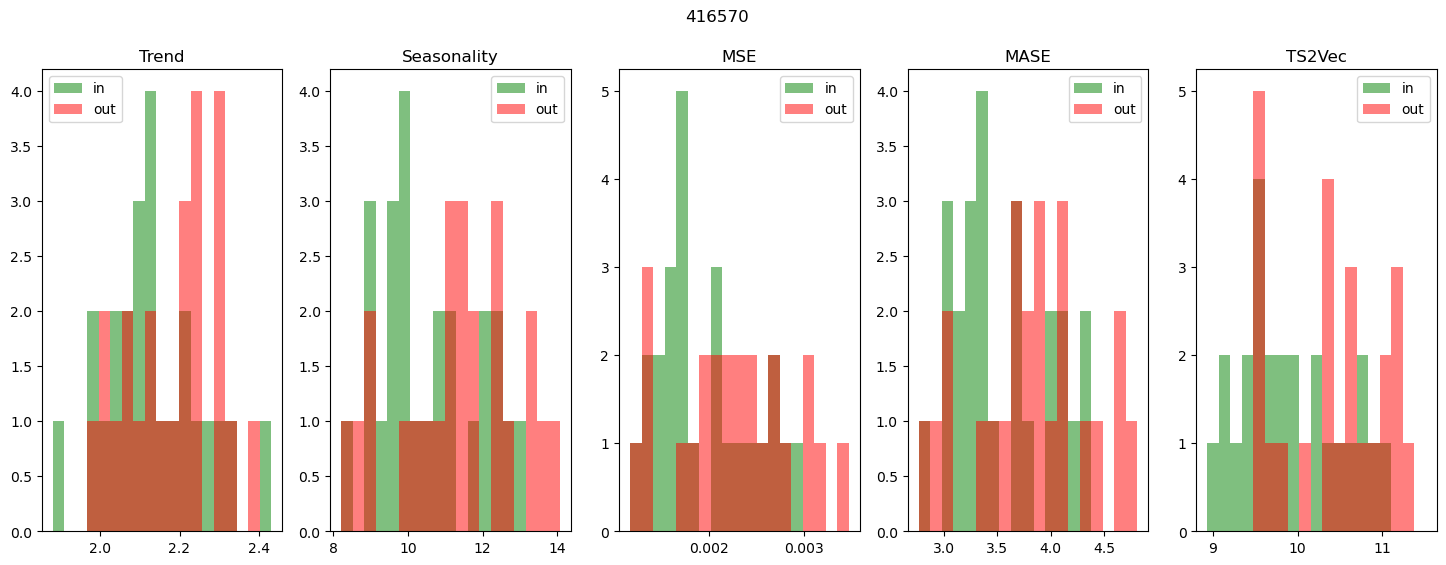

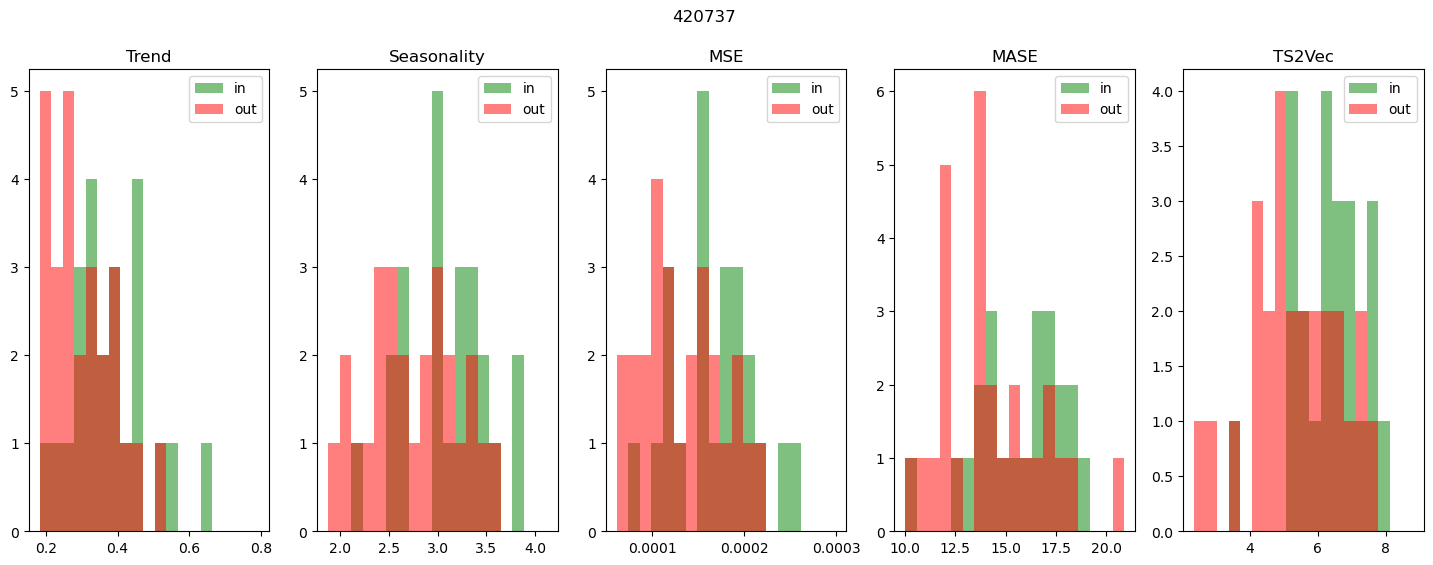

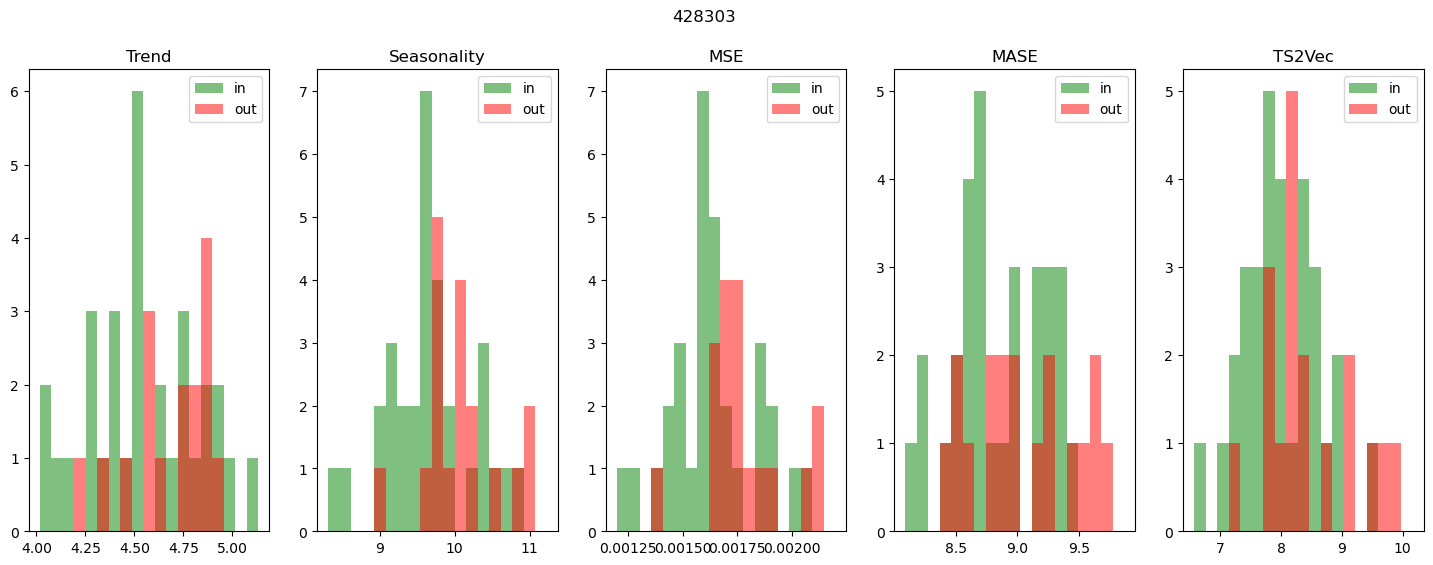

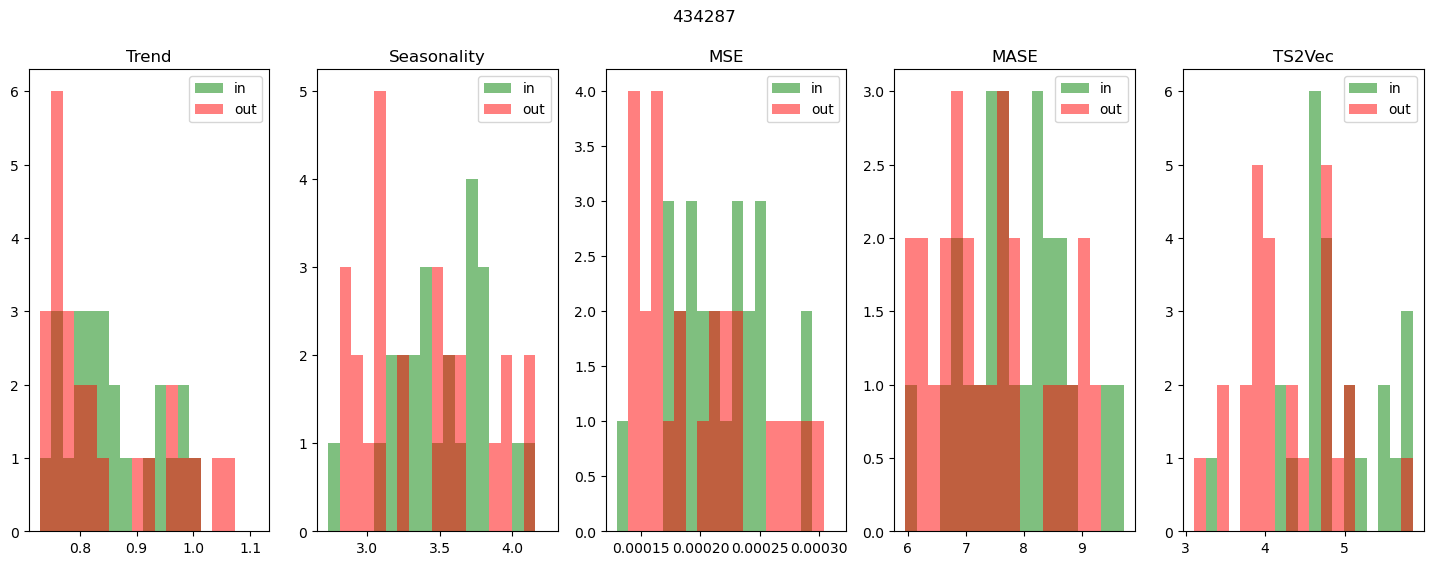

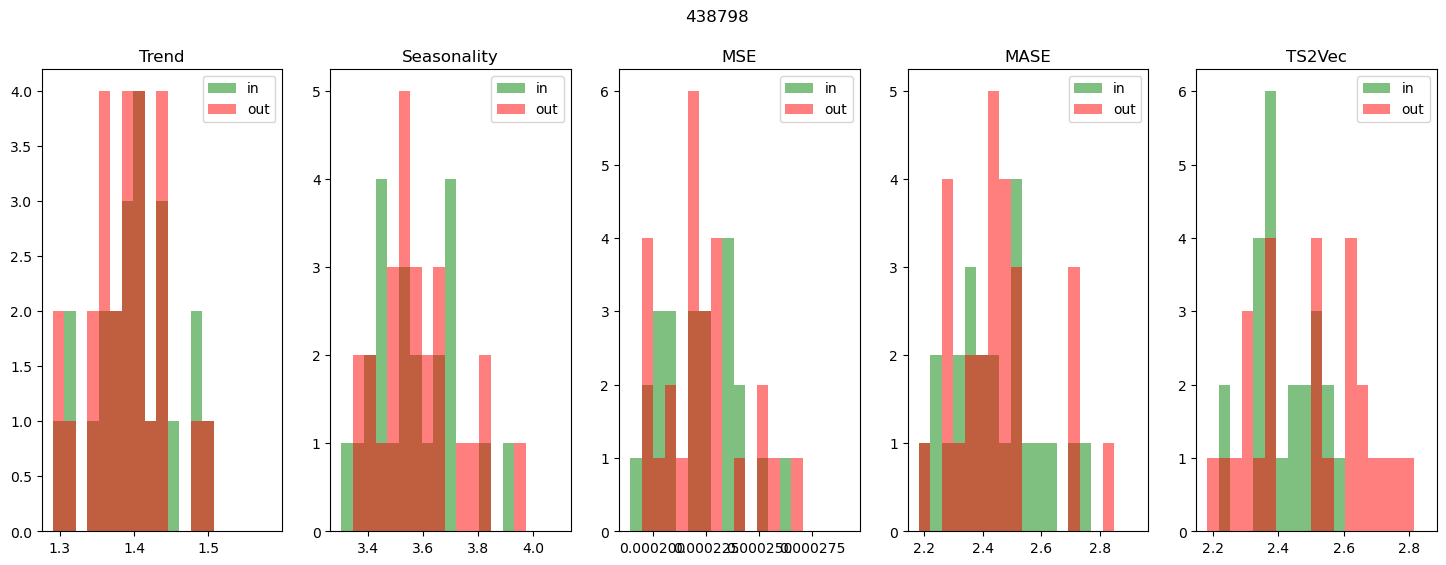

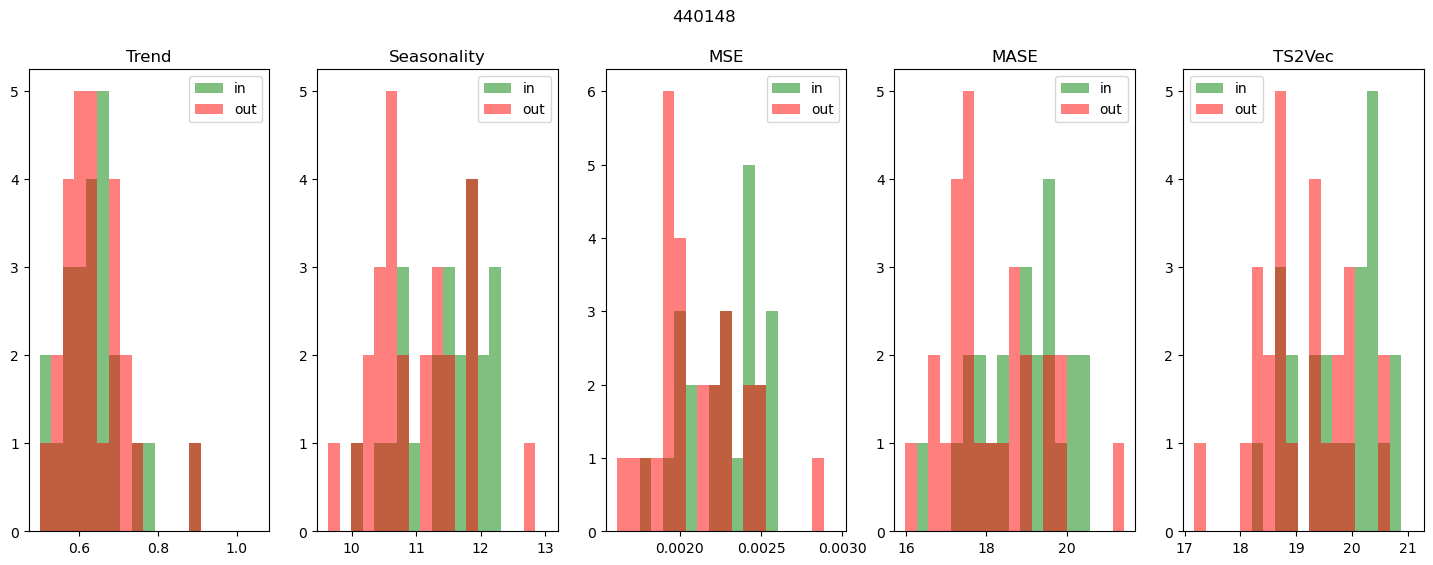

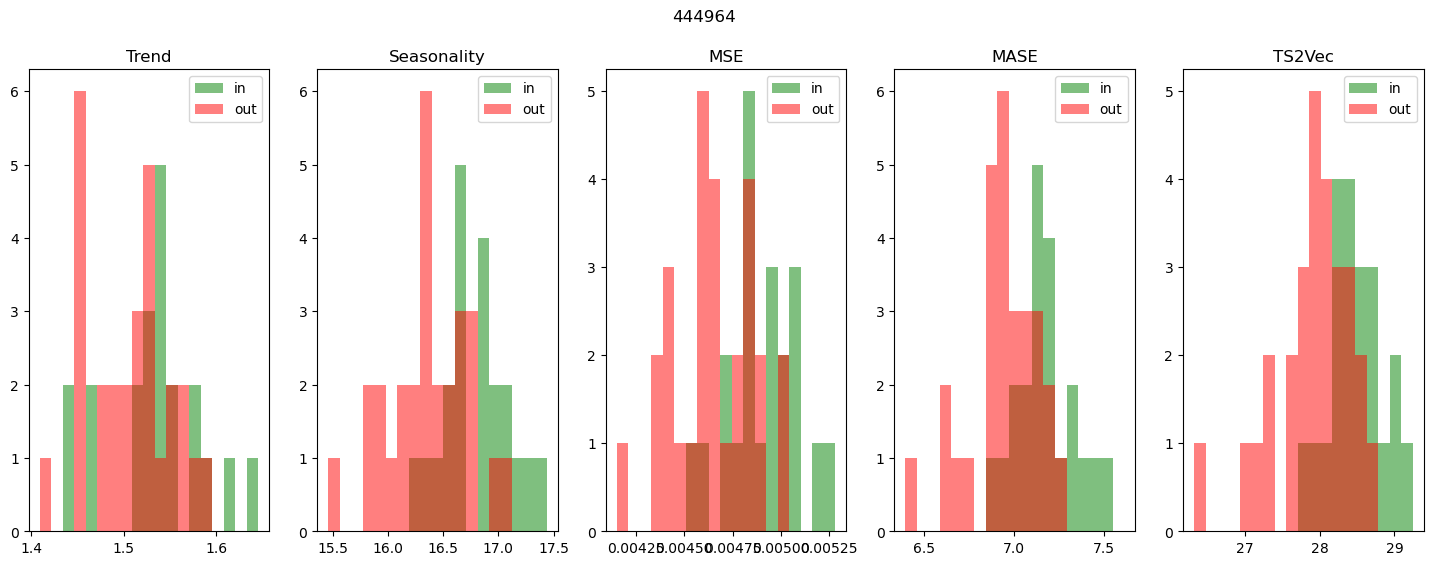

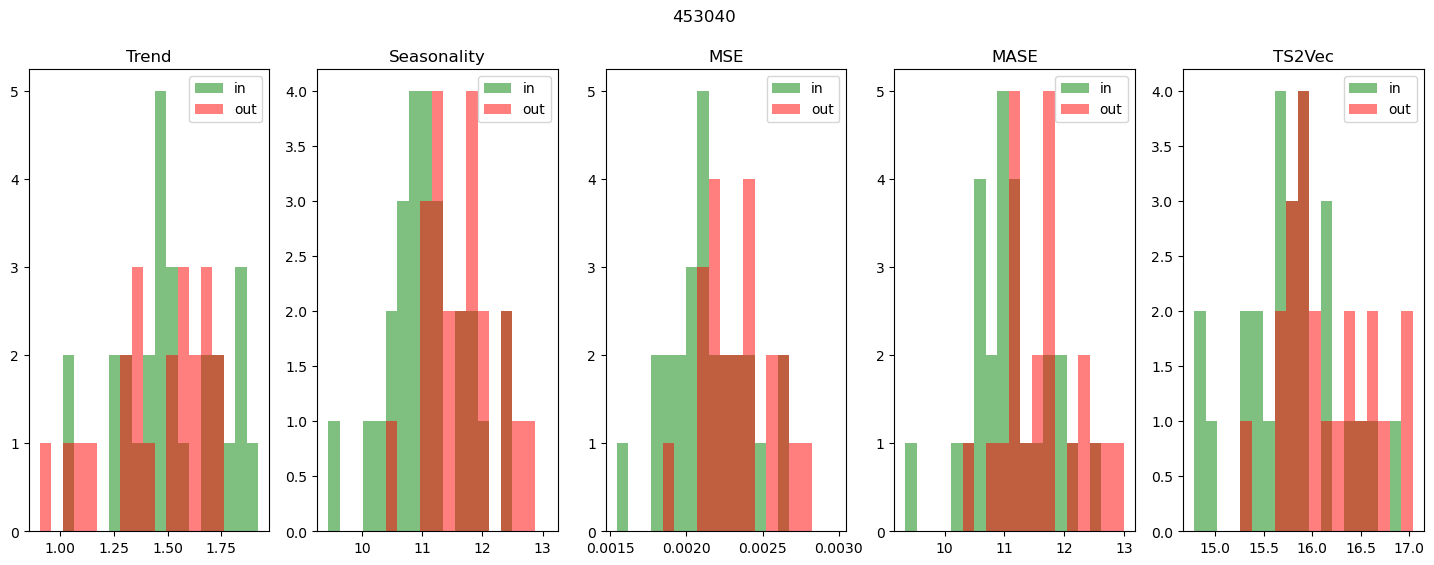

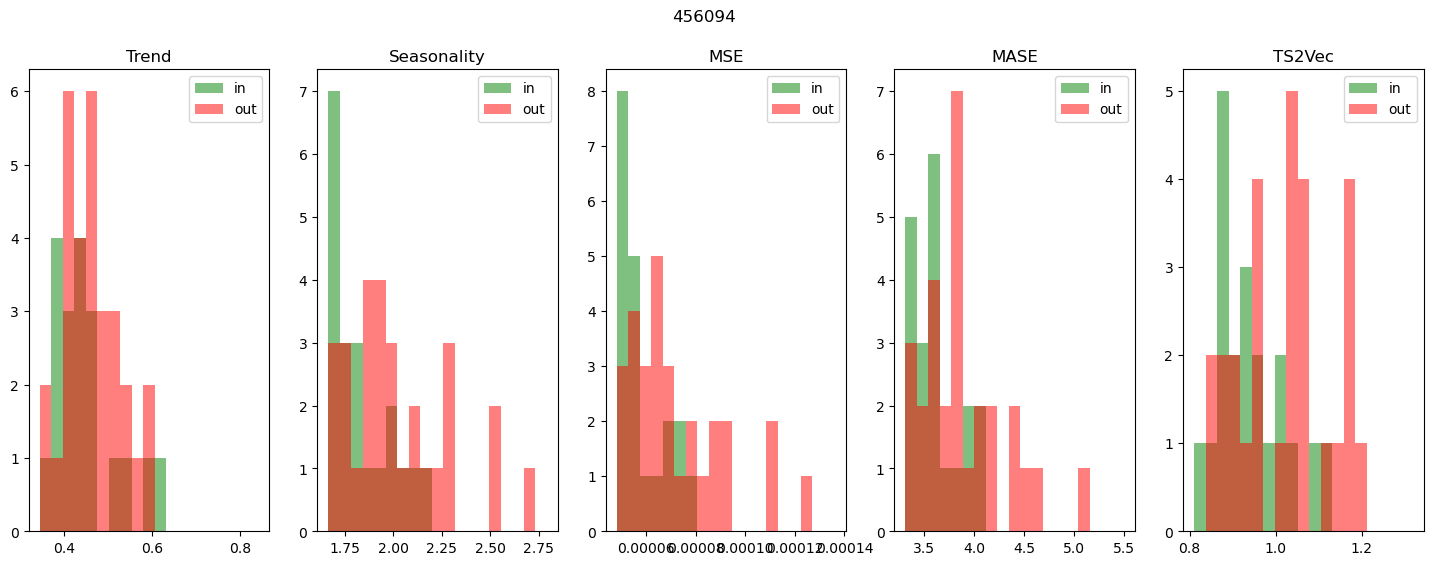

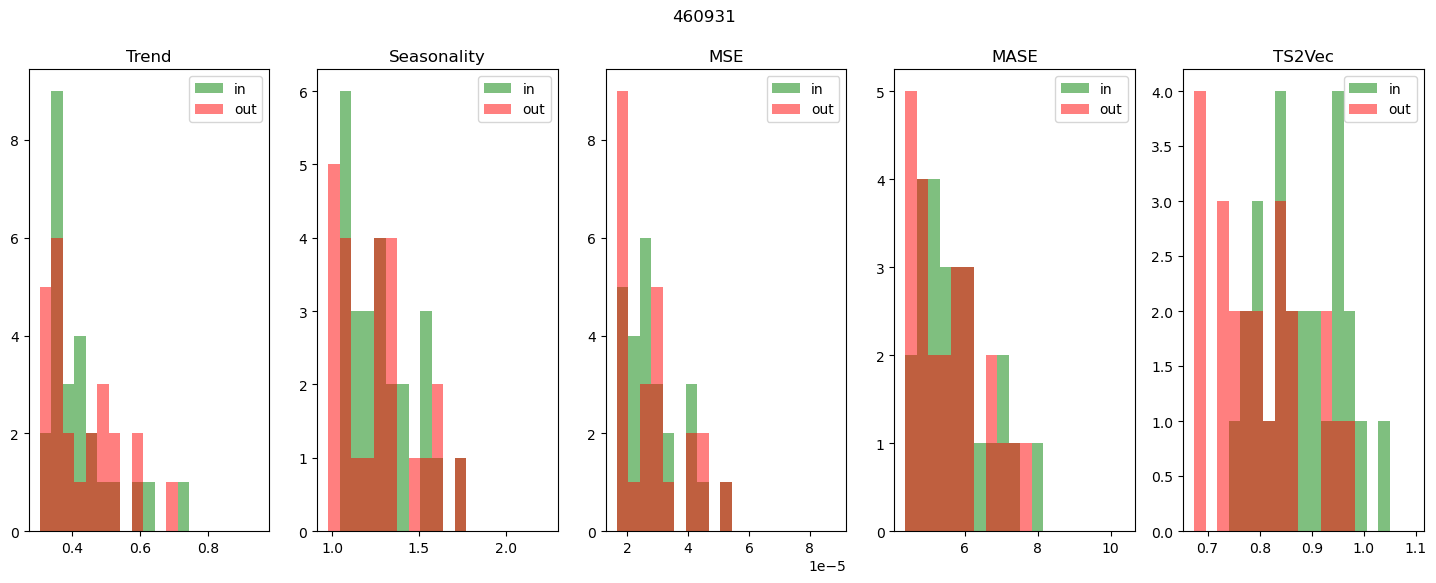

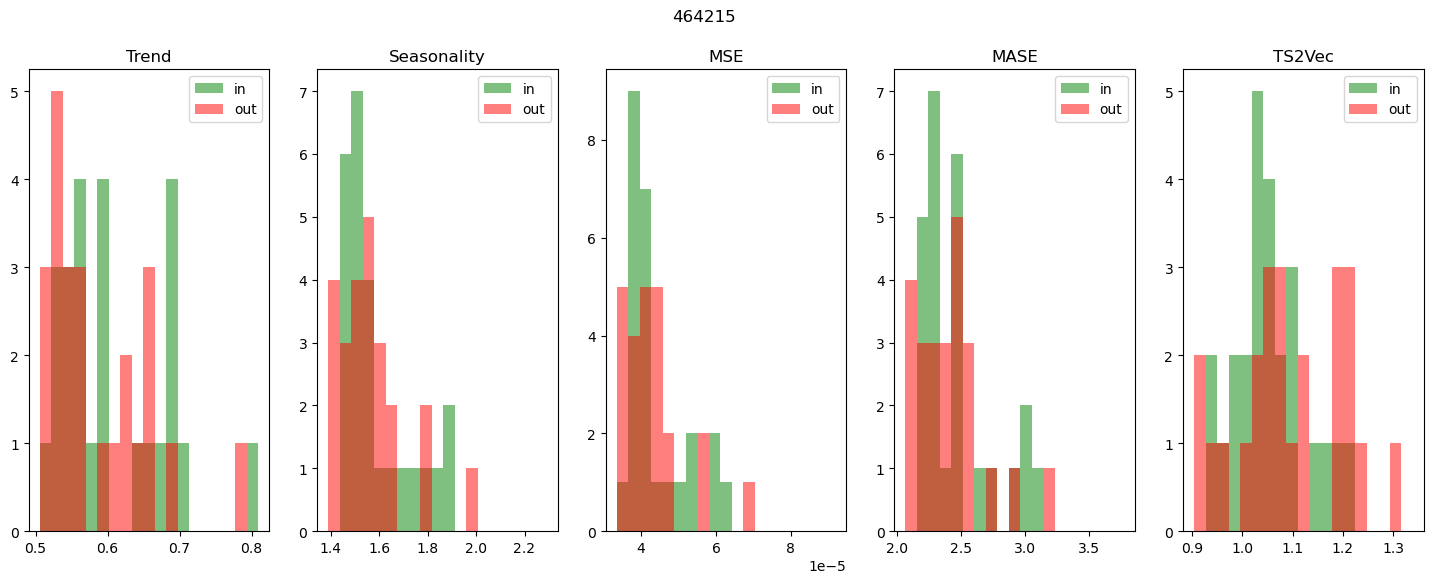

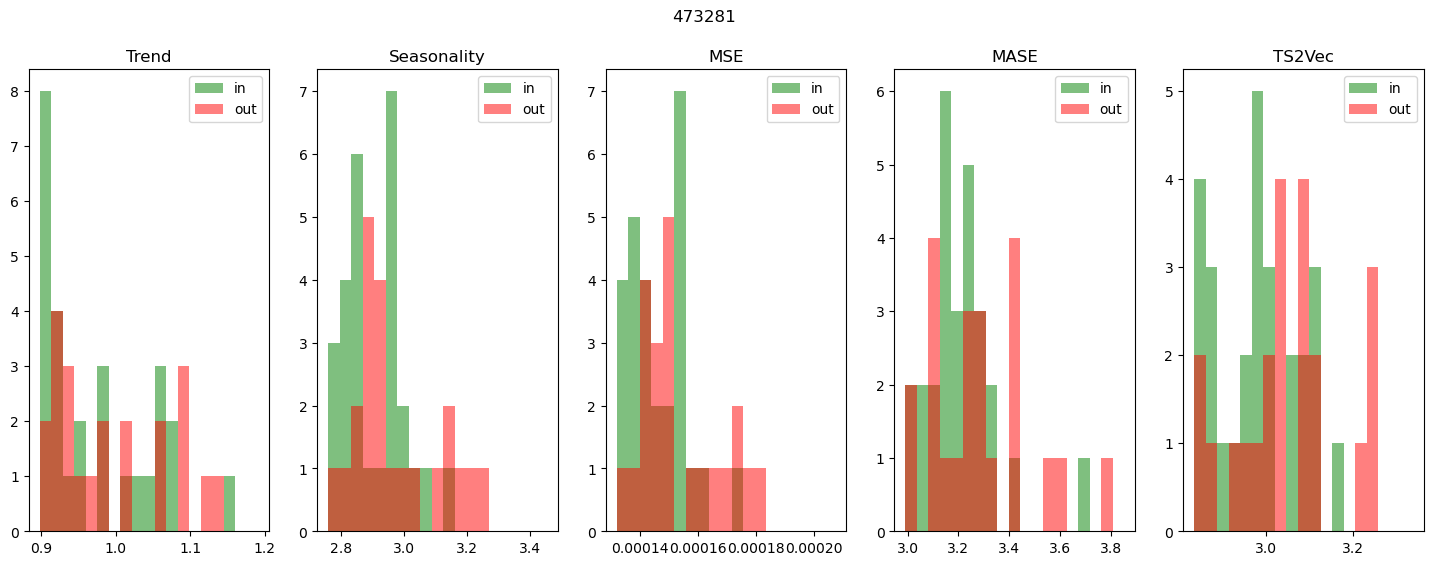

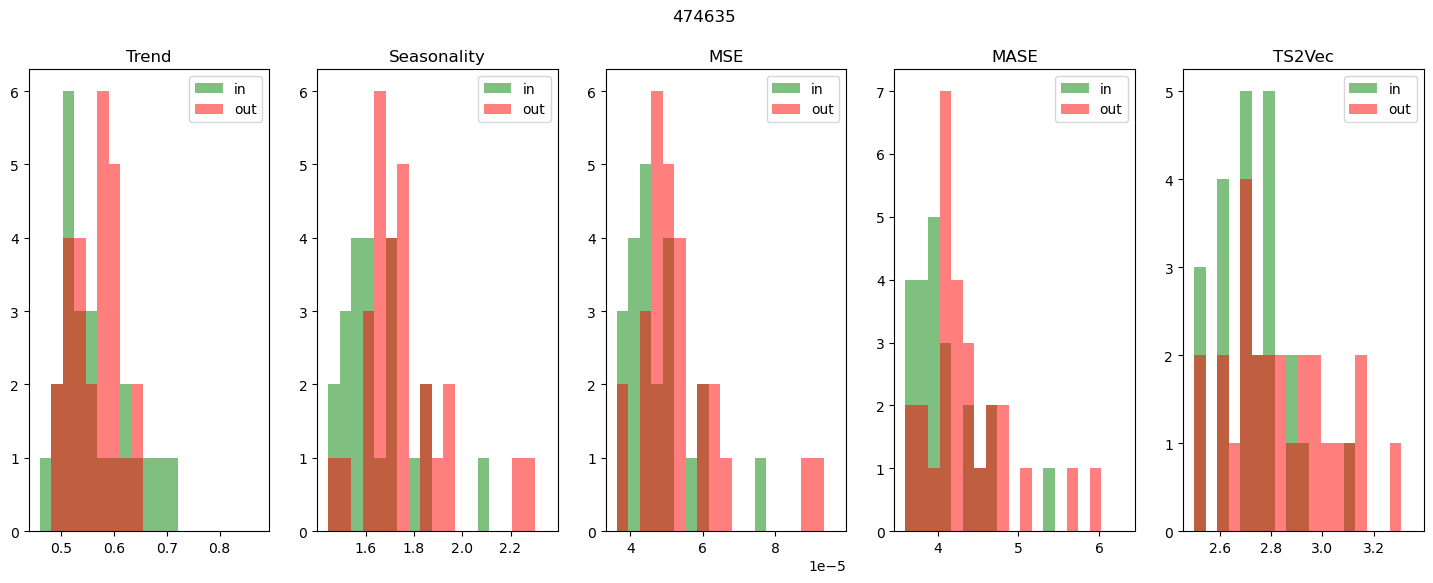

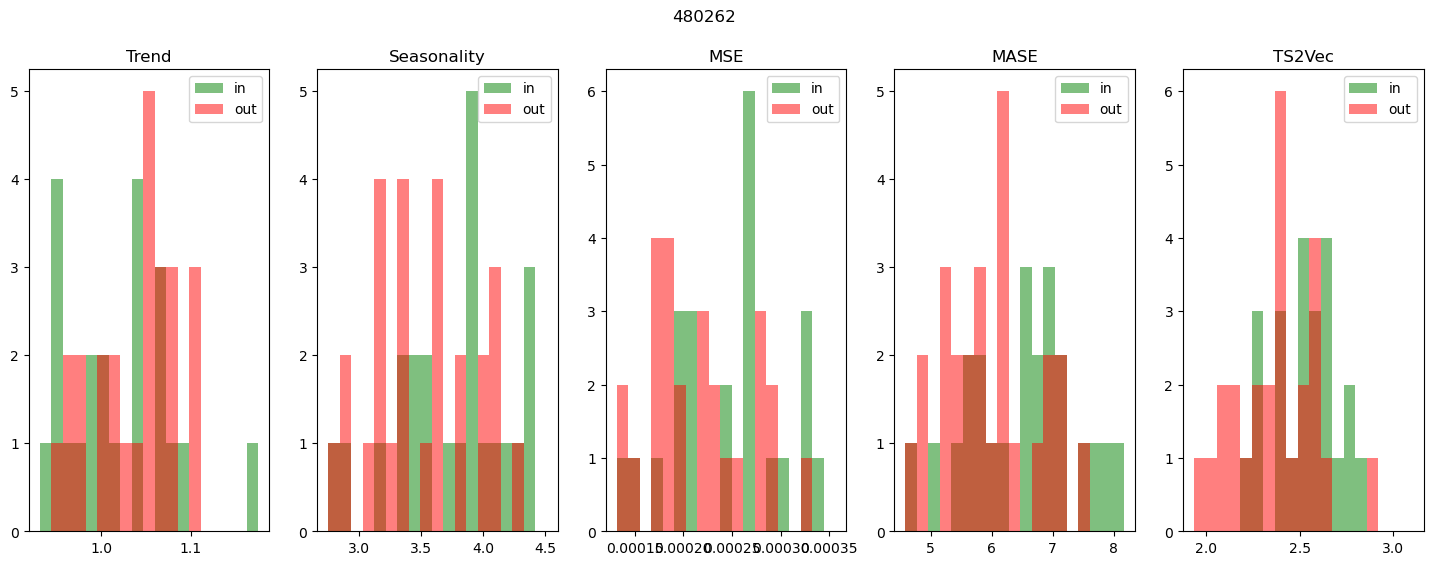

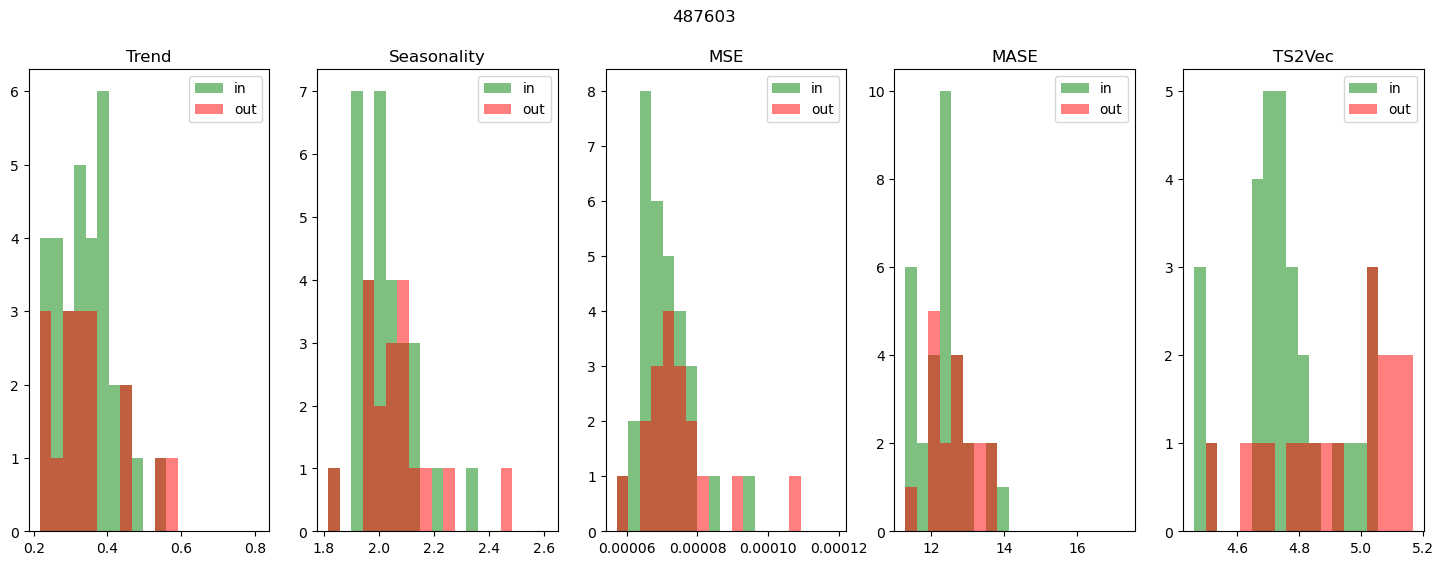

In [5]:
num_plots = 10
for i in best_per_individual:
    fig, axs = plt.subplots(1, num_features)
    fig.set_size_inches(18, 6)
    fig.suptitle(str(i))
    for f in range(num_features):
        ax = axs[f]
        ax.set_title(feature_names[f])
        current_mask = np.array(mask[i, :], dtype=bool)
        current_features = features[i, :, f]
        ins = current_features[current_mask]
        outs = current_features[np.logical_not(current_mask)]
        bins = np.arange(min(current_features), max(current_features), (max(current_features)-min(current_features))/20)
        ax.hist(ins, color="green", alpha=0.5, bins=bins, label="in")
        ax.hist(outs, color="red", alpha=0.5, bins=bins, label="out")
        ax.legend()
        
    plt.show()


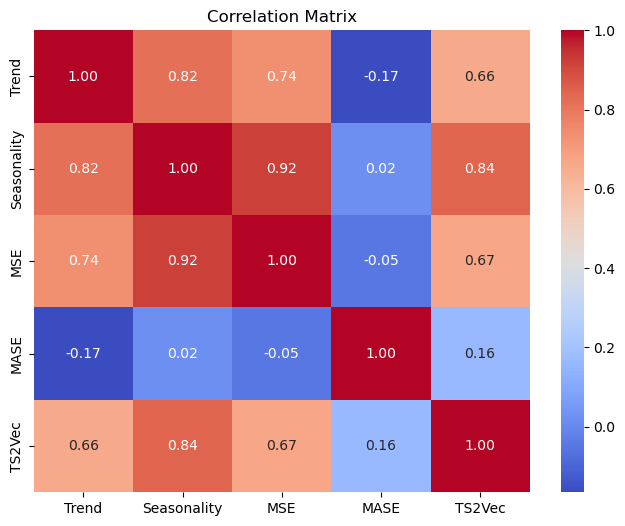

In [6]:
features_2d = features.reshape(-1, 5)

# Compute correlation matrix
corr_matrix = np.corrcoef(features_2d, rowvar=False)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    xticklabels=[feature_names[i] for i in range(num_features)], 
    yticklabels=[feature_names[i] for i in range(num_features)]
)
plt.title("Correlation Matrix")
plt.show()